# Pressure (= water stage) and Temperature in channel

**using DCX22-CTD Keller sensors readouts**

For each station at P1,P2,P3 and P5 (respectively 1,2,3,5) we get presure and temperature from CTD sensors.

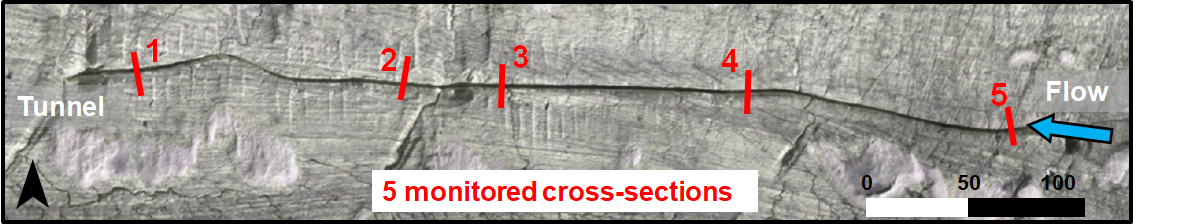

## Protocol


- The function `read_Keller_DCX22_CTD` extracts temperature and pressure time series, and convert pressure in water height (with correction from atmospheric pressure). 

- Temperature time series is corrected from laboratory calibration in `read_Keller_DCX22_CTD`. A second correction is added manually when looking at the data from the field (water temperature bellow 0°C). This correction is applied when the reconstructed time series is stored as a SCV file.

- `temp2` means T (`temp1` is TOB1)

- `plotit` plots the time series for a specified filename
- The times series are smoothed using `smooth_d` : by default the sliding window for pressure is 10, for temperature it is 30. For example is dt is 30s, the sliding window for temperature is 15min
- The function `up_scale_timeseries` scale the time series at a daily or hourly resolution
- Most of the functions are written in [`helper-functions.ipynb`](helper-functions.ipynb)
- `upscale_timeseries`compute the daily and hourly mean of the time series
- At the end, the reconstructed water height and temperature are stored in CSV files for each station and different scaling

In [1]:
using NBInclude
@nbinclude("helper-functions.ipynb");
using PyPlot


In [2]:
#PyPlot font size characteristic

rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
font0 = Dict(
        "font.size" => 10,
        "axes.labelsize" => 10,
        "xtick.labelsize" => 10,
        "ytick.labelsize" => 10,
        "legend.fontsize" => 10,
)
merge!(rcParams, font0);

# @P1 


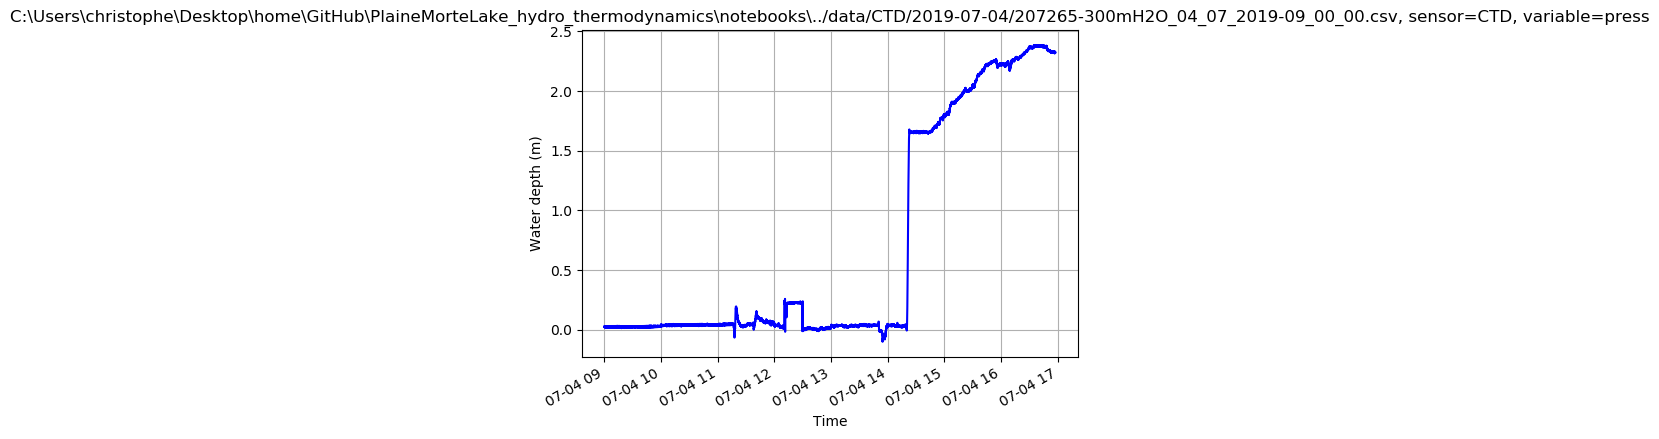

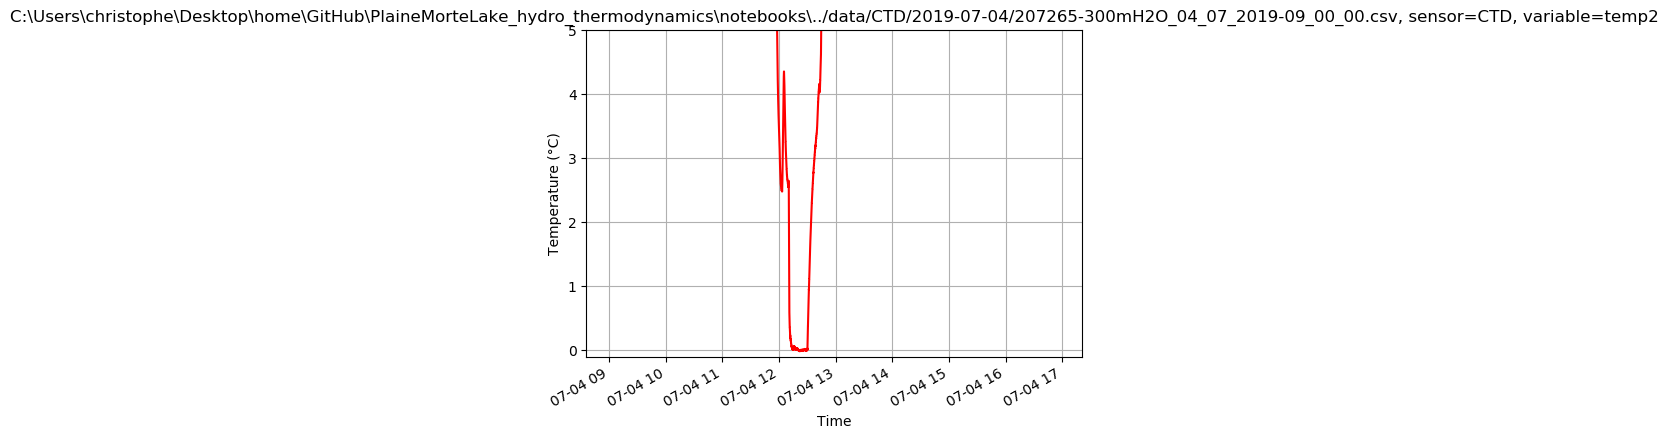

In [3]:
#4th July
pygui(false)
plotit(path_CTD*"2019-07-04/207265-300mH2O_04_07_2019-09_00_00.csv", :CTD, :press)
plotit(path_CTD*"2019-07-04/207265-300mH2O_04_07_2019-09_00_00.csv", :CTD, :temp2)



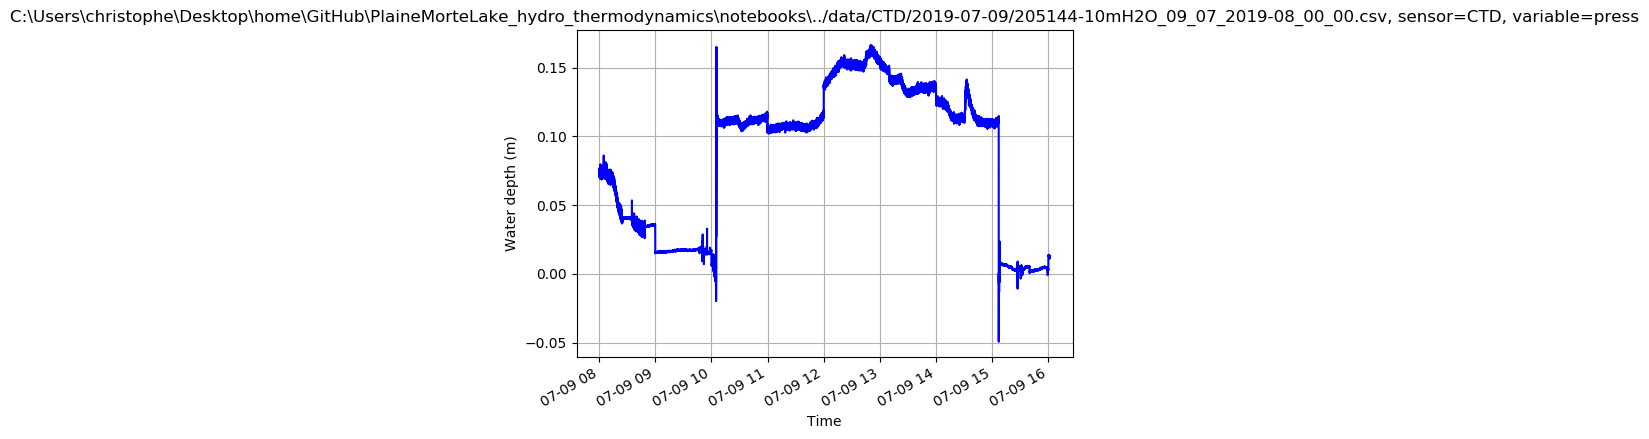

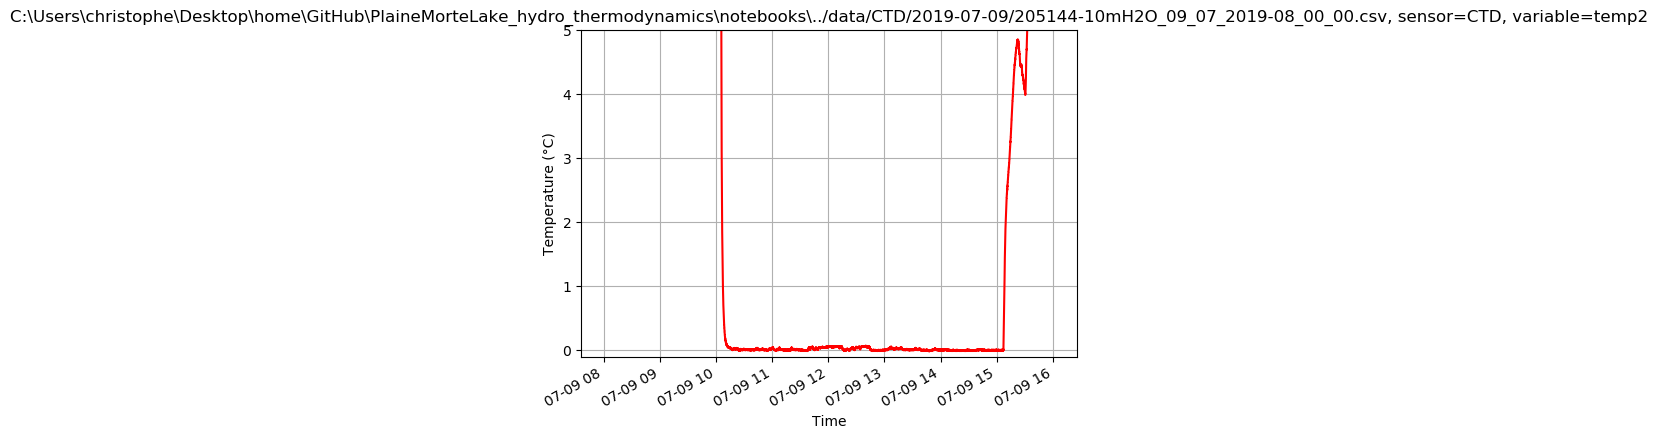

In [4]:
pygui(false)
plotit(path_CTD*"2019-07-09/205144-10mH2O_09_07_2019-08_00_00.csv", :CTD, :press)
plotit(path_CTD*"2019-07-09/205144-10mH2O_09_07_2019-08_00_00.csv", :CTD, :temp2)


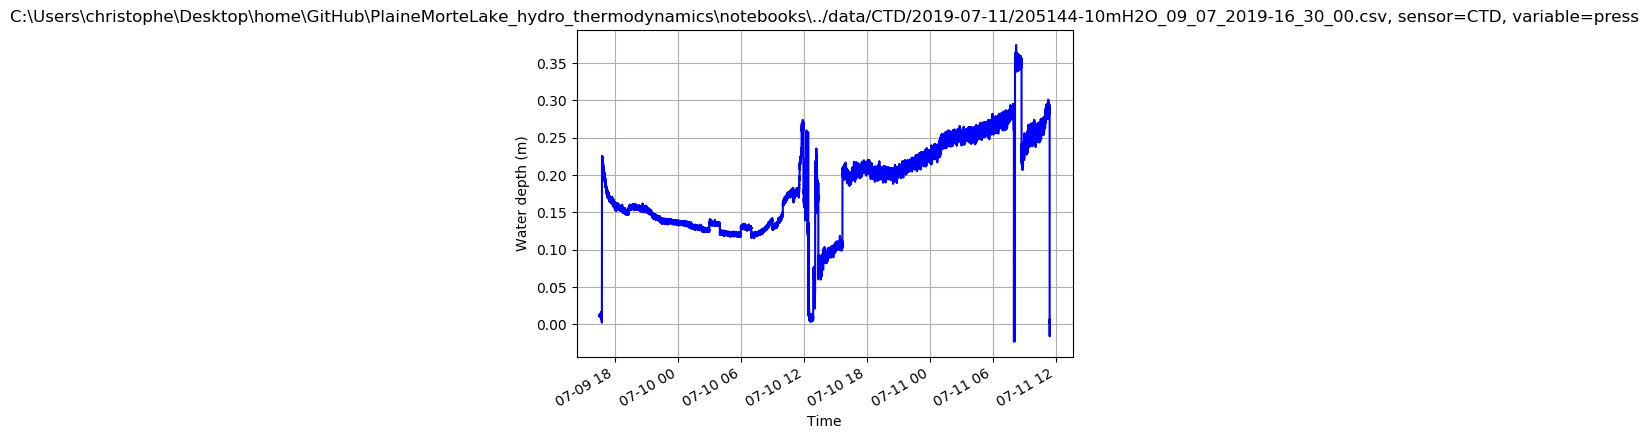

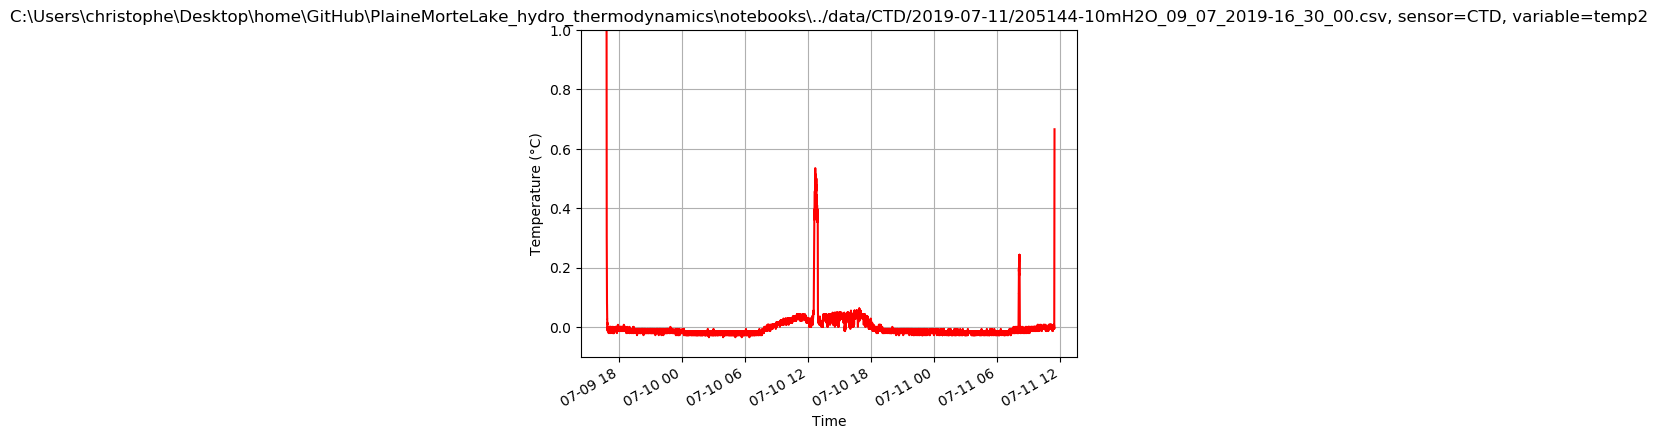

In [5]:
pygui(false)
plotit(path_CTD*"2019-07-11/205144-10mH2O_09_07_2019-16_30_00.csv", :CTD, :press)
plotit(path_CTD*"2019-07-11/205144-10mH2O_09_07_2019-16_30_00.csv", :CTD, :temp2)
ylim(-0.1,1);


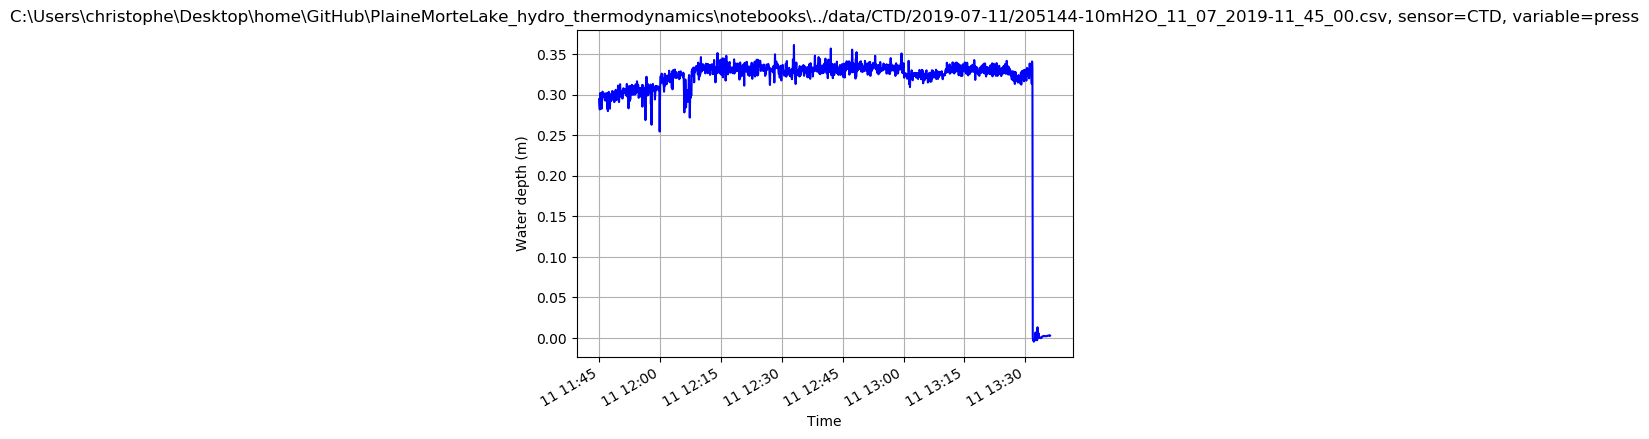

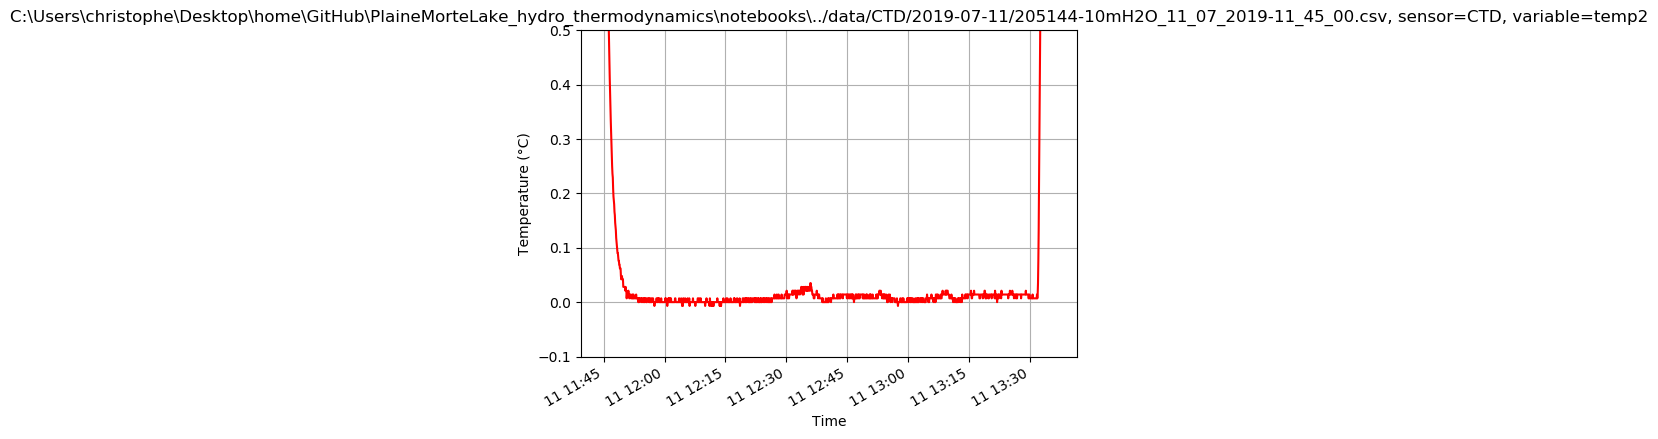

In [6]:
pygui(false)
plotit(path_CTD*"2019-07-11/205144-10mH2O_11_07_2019-11_45_00.csv", :CTD, :press)
plotit(path_CTD*"2019-07-11/205144-10mH2O_11_07_2019-11_45_00.csv", :CTD, :temp2)
ylim(-0.1,0.5);


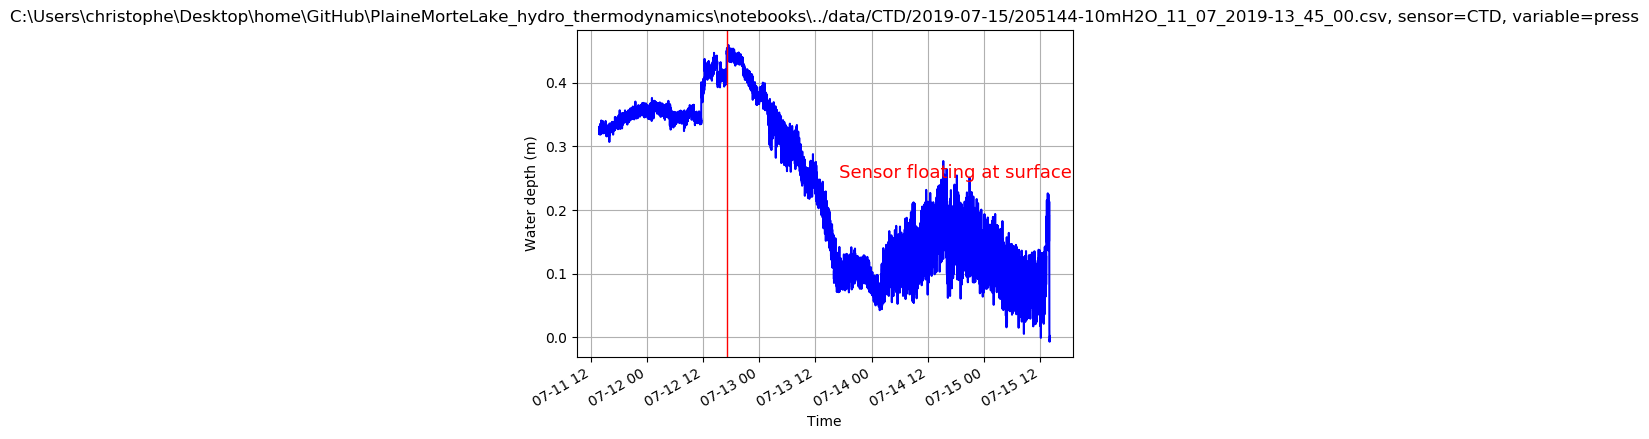

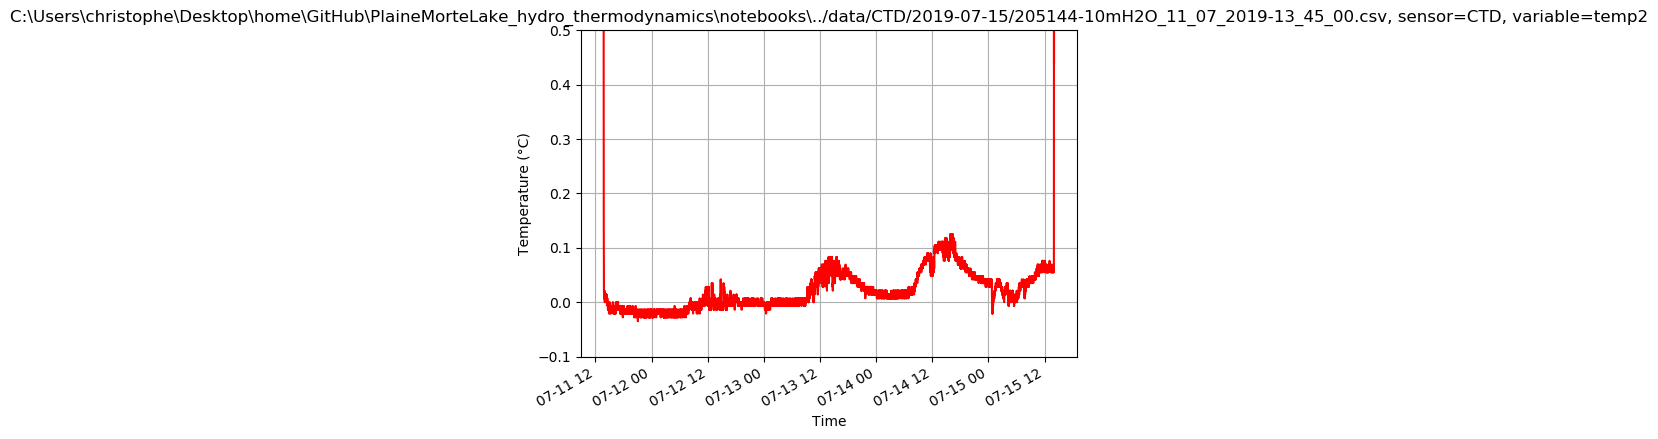

(-0.1, 0.5)

In [7]:
pygui(false)
plotit(path_CTD*"2019-07-15/205144-10mH2O_11_07_2019-13_45_00.csv", :CTD, :press)
axvline(x=DateTime(2019,7,12,17),linewidth=1,color="r")
text(DateTime(2019,7,13,17),0.25,"Sensor floating at surface",color=:red, fontsize=13)
plotit(path_CTD*"2019-07-15/205144-10mH2O_11_07_2019-13_45_00.csv", :CTD, :temp2)
ylim(-0.1,0.5)


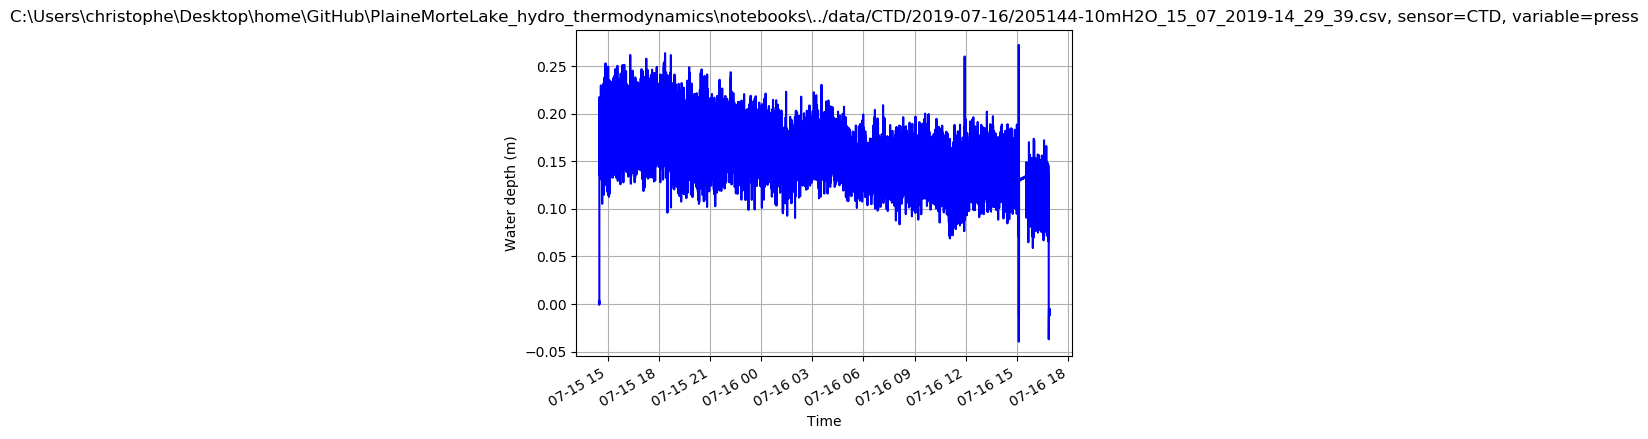

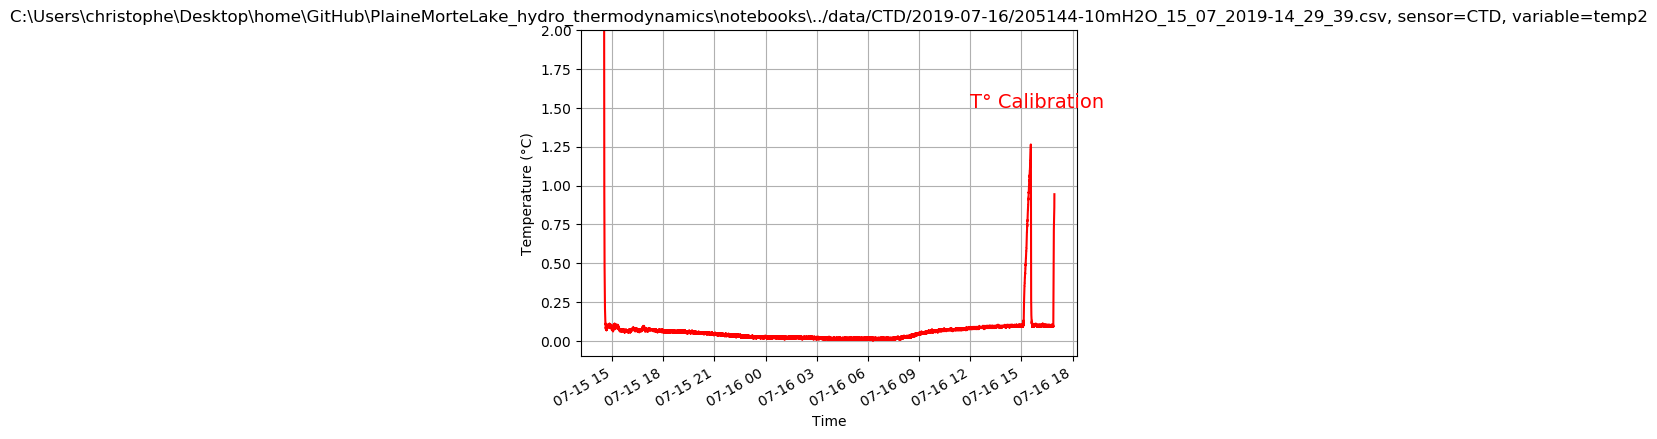

PyObject Text(2019-07-16 12:00:00, 1.5, 'T° Calibration')

In [8]:
pygui(false)
plotit(path_CTD*"2019-07-16/205144-10mH2O_15_07_2019-14_29_39.csv", :CTD, :press)
plotit(path_CTD*"2019-07-16/205144-10mH2O_15_07_2019-14_29_39.csv", :CTD, :temp2)
ylim(-0.1,2)
text(DateTime(2019,7,16,12),1.5,"T° Calibration",color="r",fontsize=14)




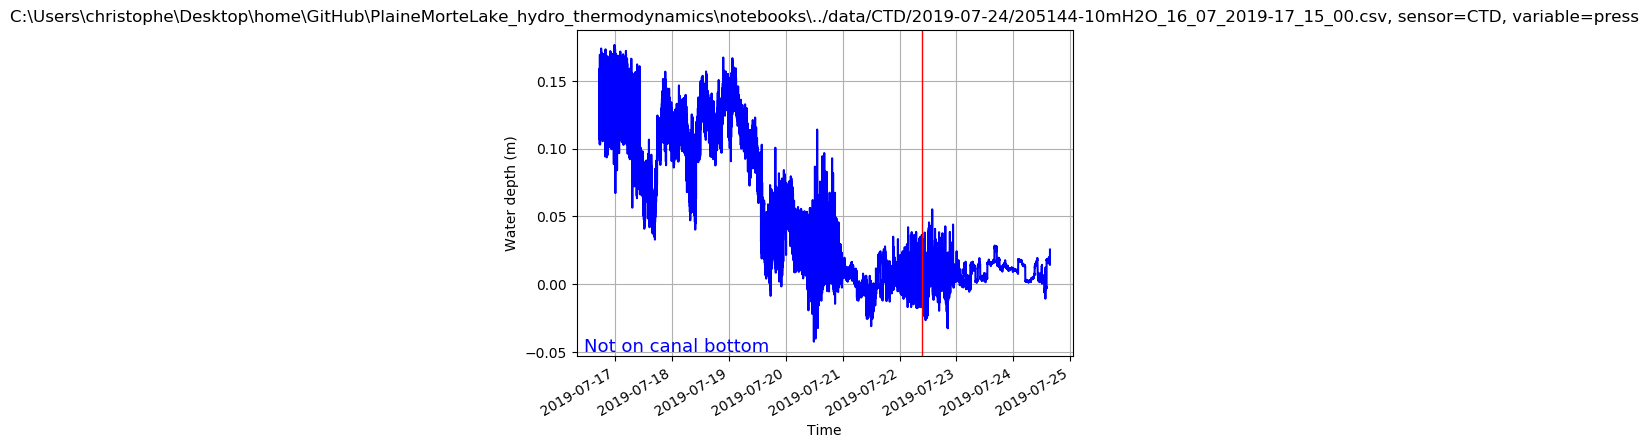

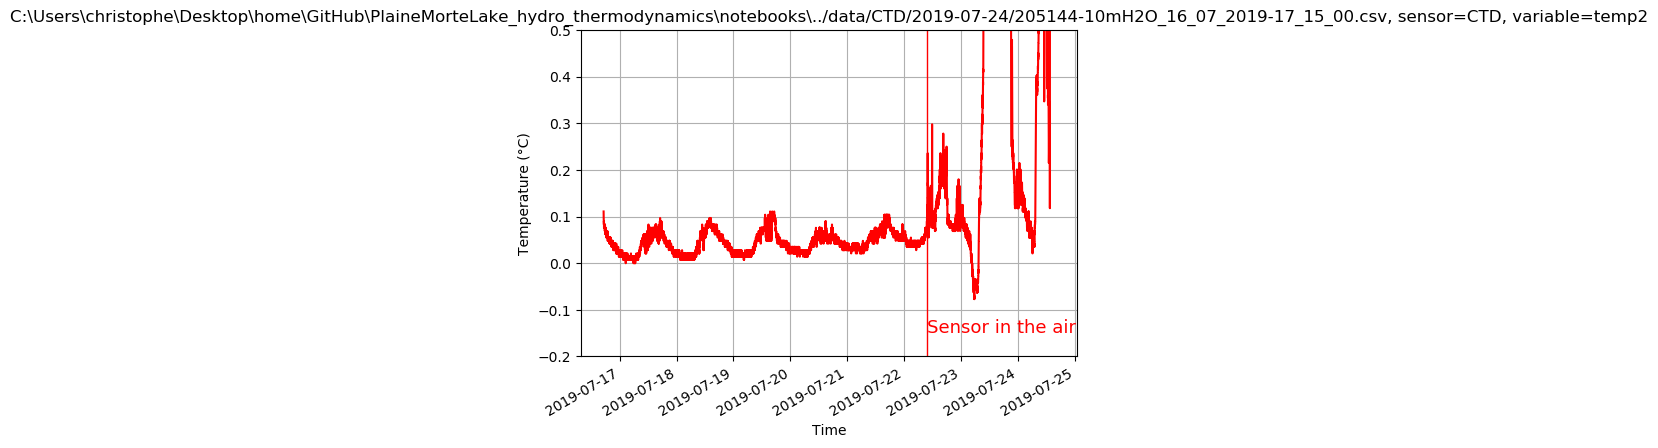

PyObject Text(2019-07-22 09:35:00, -0.15, 'Sensor in the air')

In [9]:
pygui(false)
plotit(path_CTD*"2019-07-24/205144-10mH2O_16_07_2019-17_15_00.csv", :CTD, :press)
axvline(x=DateTime(2019,7,22,9,35),linewidth=1,color="r")
text(DateTime(2019,7,16,11),-0.05,"Not on canal bottom",color=:blue, fontsize=13)
plotit(path_CTD*"2019-07-24/205144-10mH2O_16_07_2019-17_15_00.csv", :CTD, :temp2)
ylim(-0.2,0.5)
axvline(x=DateTime(2019,7,22,9,35),linewidth=1,color="r")
text(DateTime(2019,7,22,9,35),-0.15,"Sensor in the air",color=:red, fontsize=13)


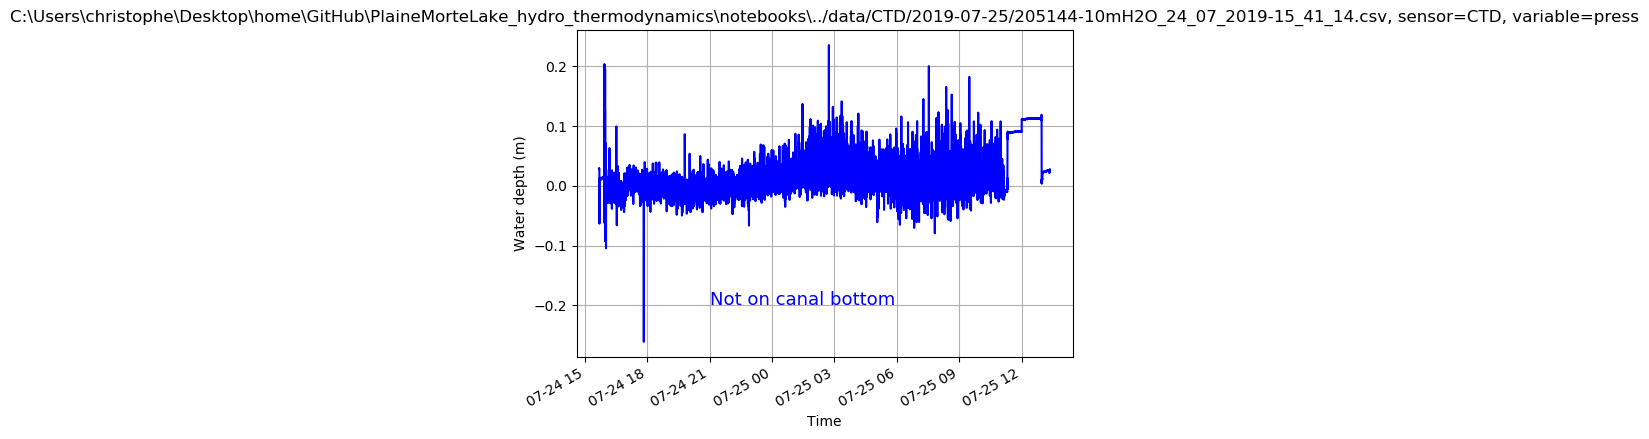

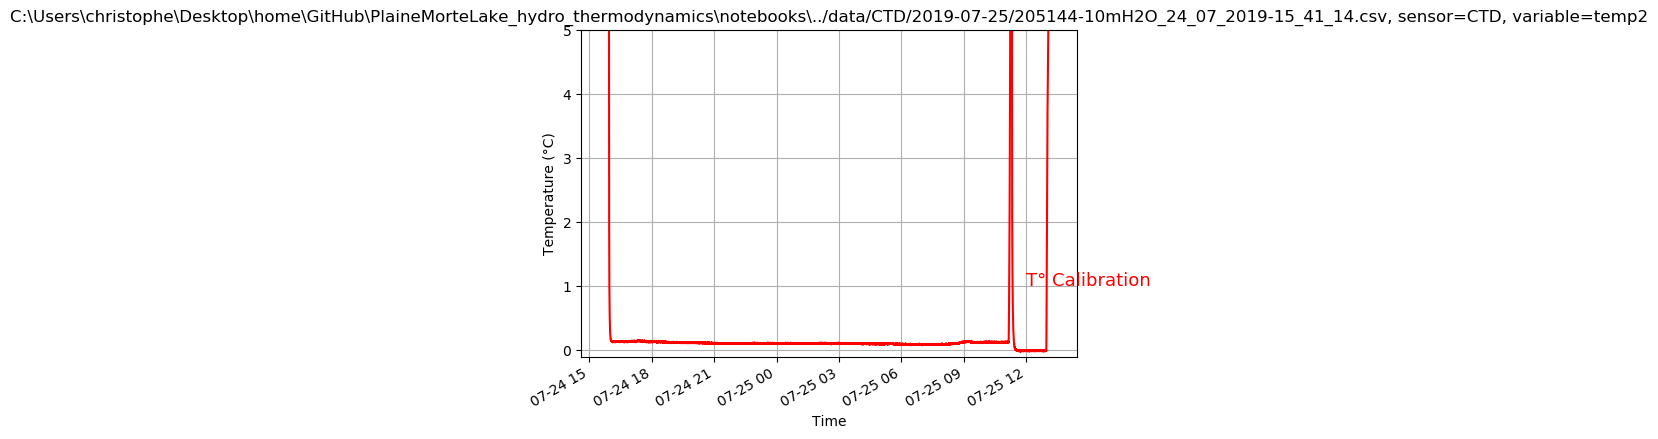

PyObject Text(2019-07-25 12:00:00, 1, 'T° Calibration')

In [10]:
pygui(false)
plotit(path_CTD*"2019-07-25/205144-10mH2O_24_07_2019-15_41_14.csv", :CTD, :press)
text(DateTime(2019,7,24,21),-0.2,"Not on canal bottom",color=:blue, fontsize=13)
plotit(path_CTD*"2019-07-25/205144-10mH2O_24_07_2019-15_41_14.csv", :CTD, :temp2)
text(DateTime(2019,7,25,12),1,"T° Calibration",color=:red, fontsize=13)


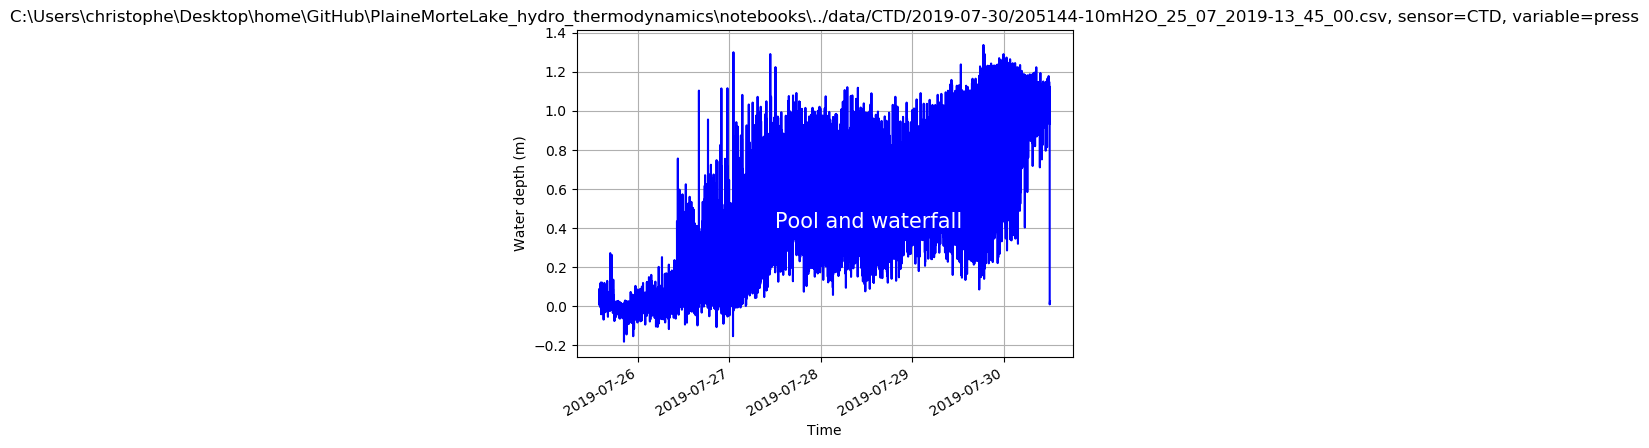

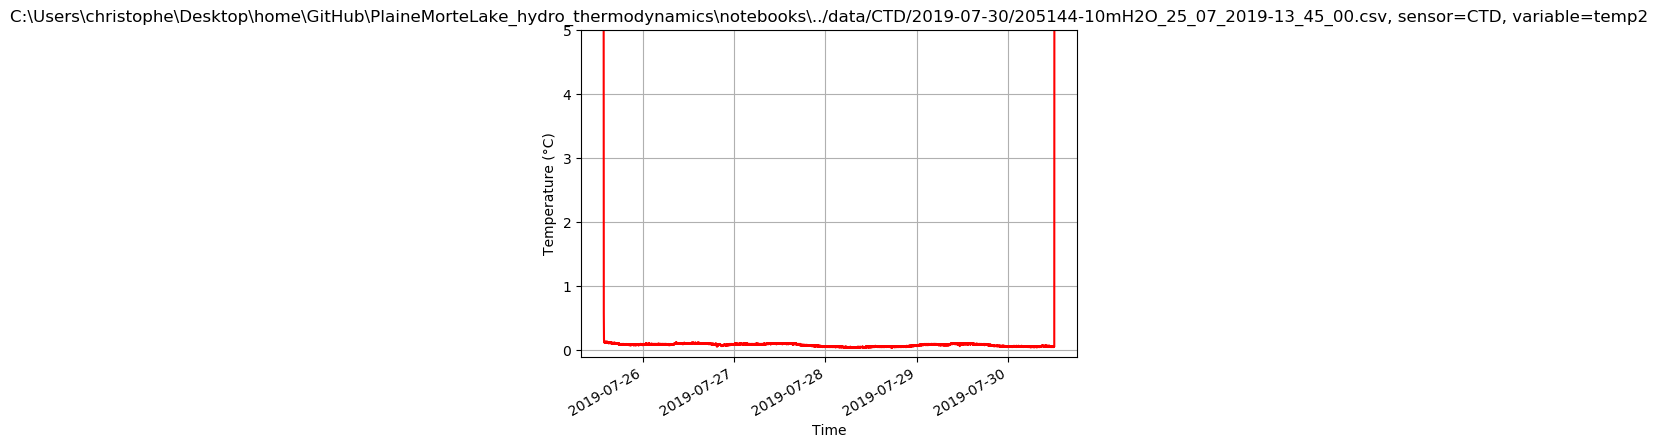

In [11]:
pygui(false)
plotit(path_CTD*"2019-07-30/205144-10mH2O_25_07_2019-13_45_00.csv", :CTD, :press)
text(DateTime(2019,7,27,12),0.4,"Pool and waterfall",color=:white, fontsize=15)
plotit(path_CTD*"2019-07-30/205144-10mH2O_25_07_2019-13_45_00.csv", :CTD, :temp2)


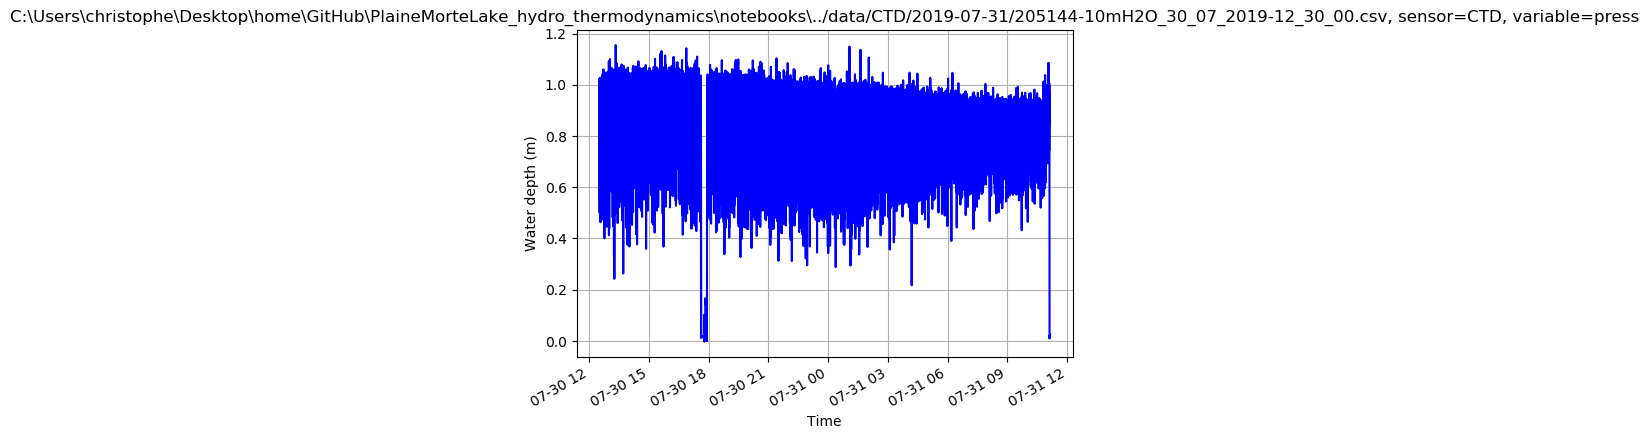

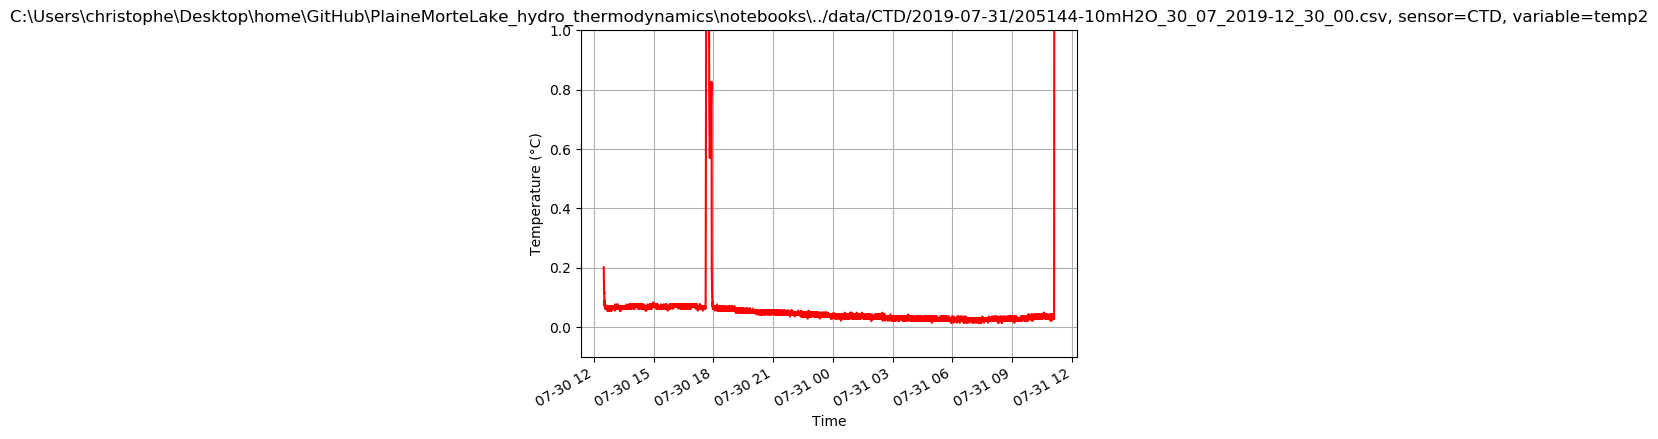

In [12]:
pygui(false)
plotit(path_CTD*"2019-07-31/205144-10mH2O_30_07_2019-12_30_00.csv", :CTD, :press)
plotit(path_CTD*"2019-07-31/205144-10mH2O_30_07_2019-12_30_00.csv", :CTD, :temp2)
ylim(-0.1,1);


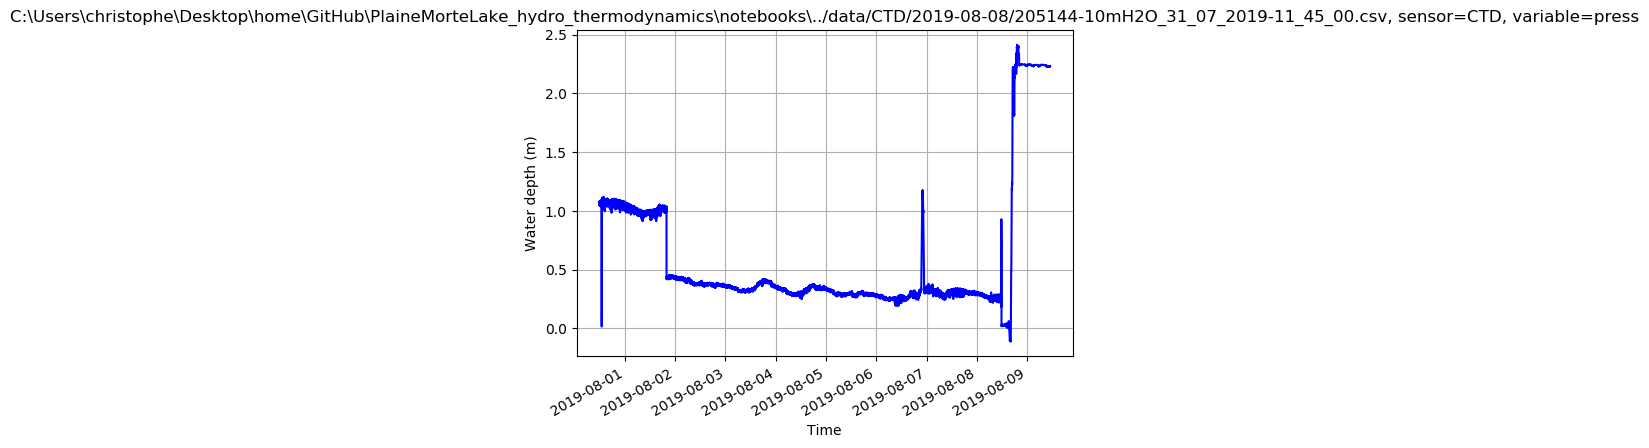

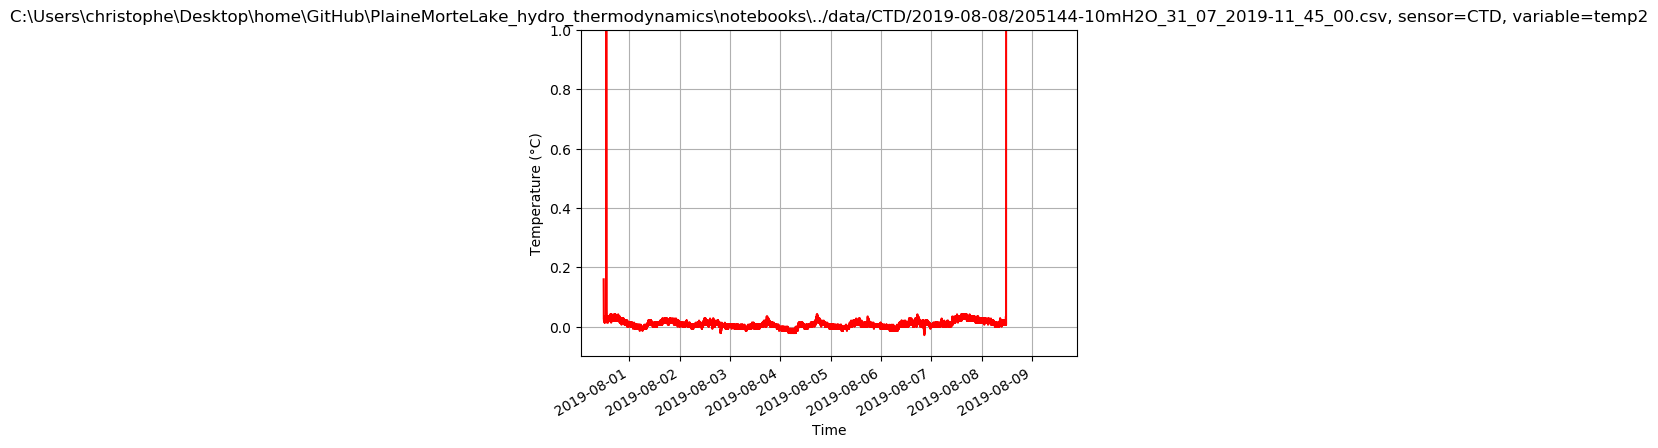

In [13]:
pygui(false)
plotit(path_CTD*"2019-08-08/205144-10mH2O_31_07_2019-11_45_00.csv", :CTD, :press)
plotit(path_CTD*"2019-08-08/205144-10mH2O_31_07_2019-11_45_00.csv", :CTD, :temp2)
ylim(-0.1,1);


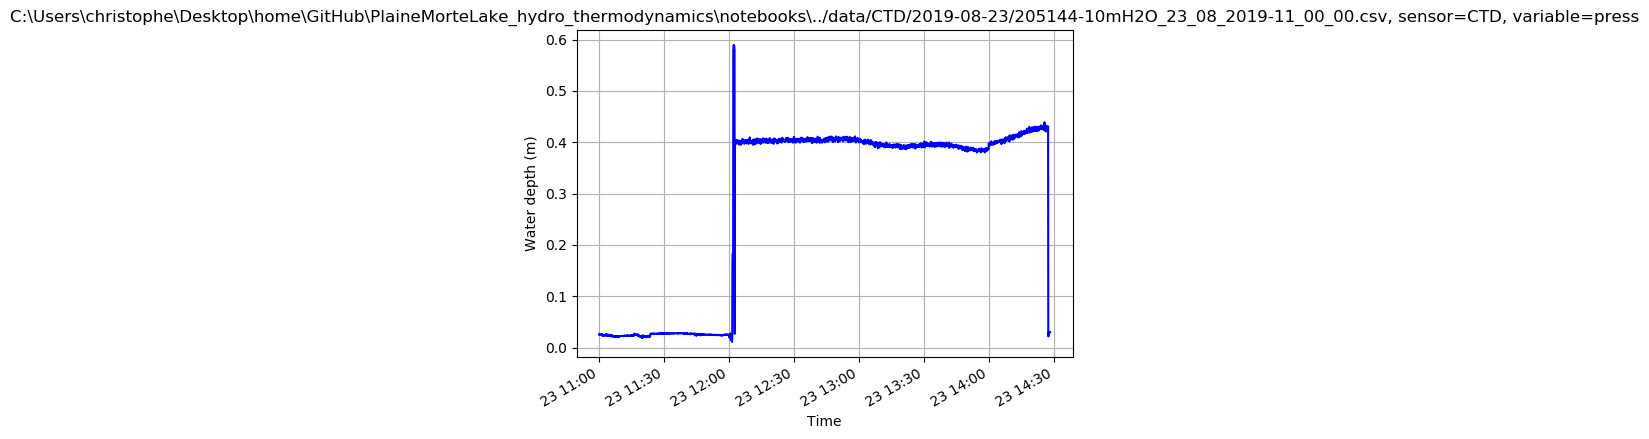

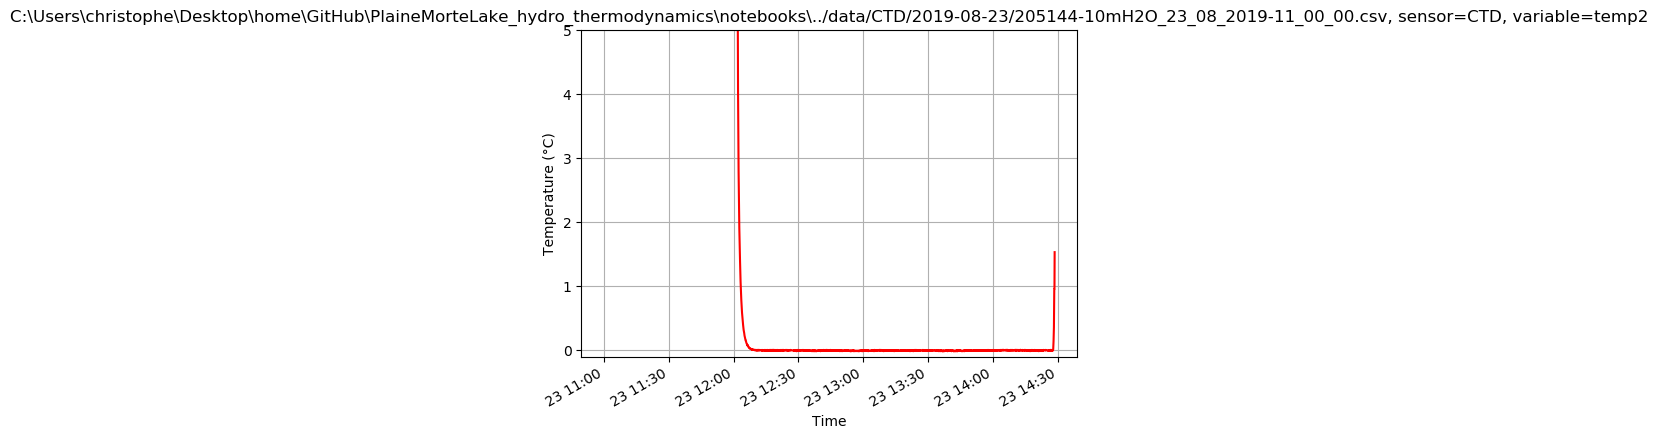

In [14]:
pygui(false)
plotit(path_CTD*"2019-08-23/205144-10mH2O_23_08_2019-11_00_00.csv", :CTD, :press)
plotit(path_CTD*"2019-08-23/205144-10mH2O_23_08_2019-11_00_00.csv", :CTD, :temp2)


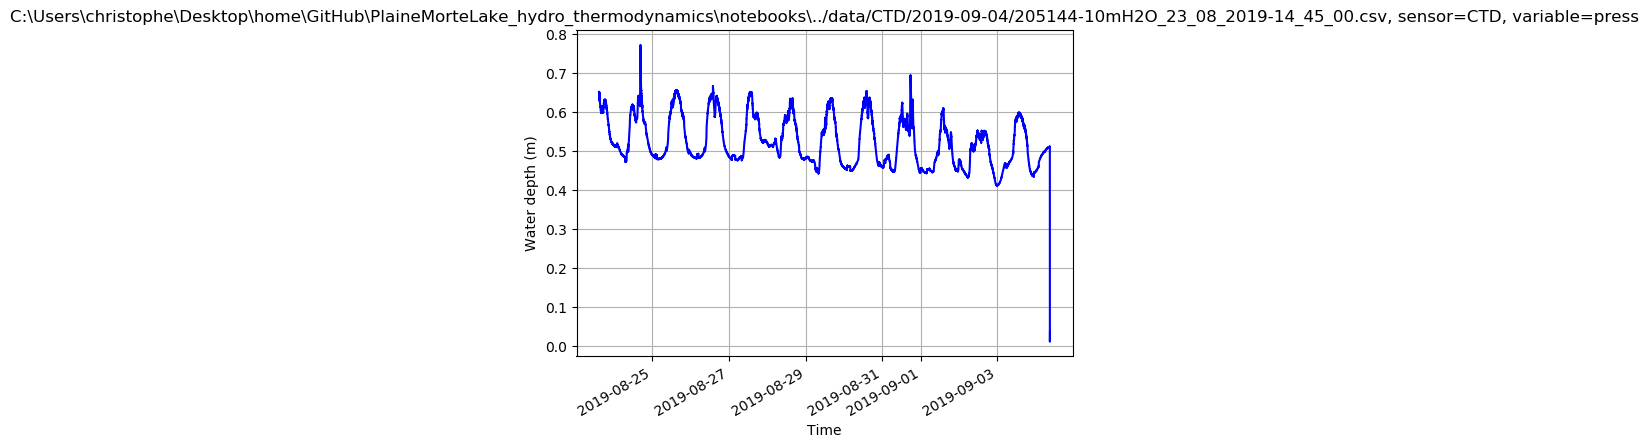

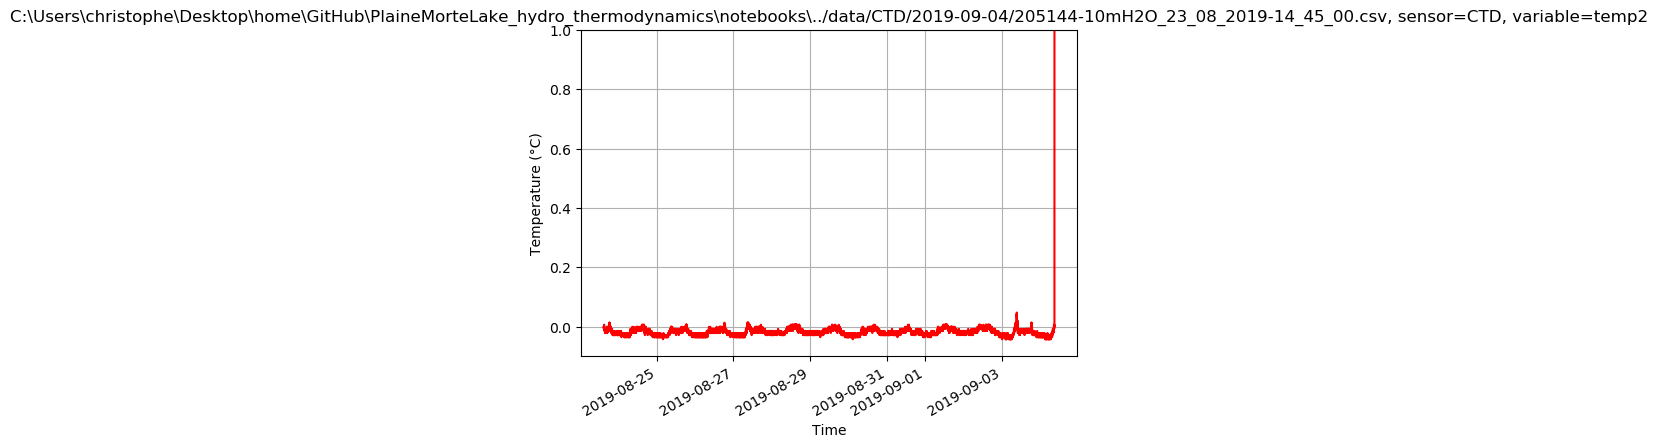

In [15]:
pygui(false)
plotit(path_CTD*"2019-09-04/205144-10mH2O_23_08_2019-14_45_00.csv", :CTD, :press)
plotit(path_CTD*"2019-09-04/205144-10mH2O_23_08_2019-14_45_00.csv", :CTD, :temp2)
ylim(-0.1,1);


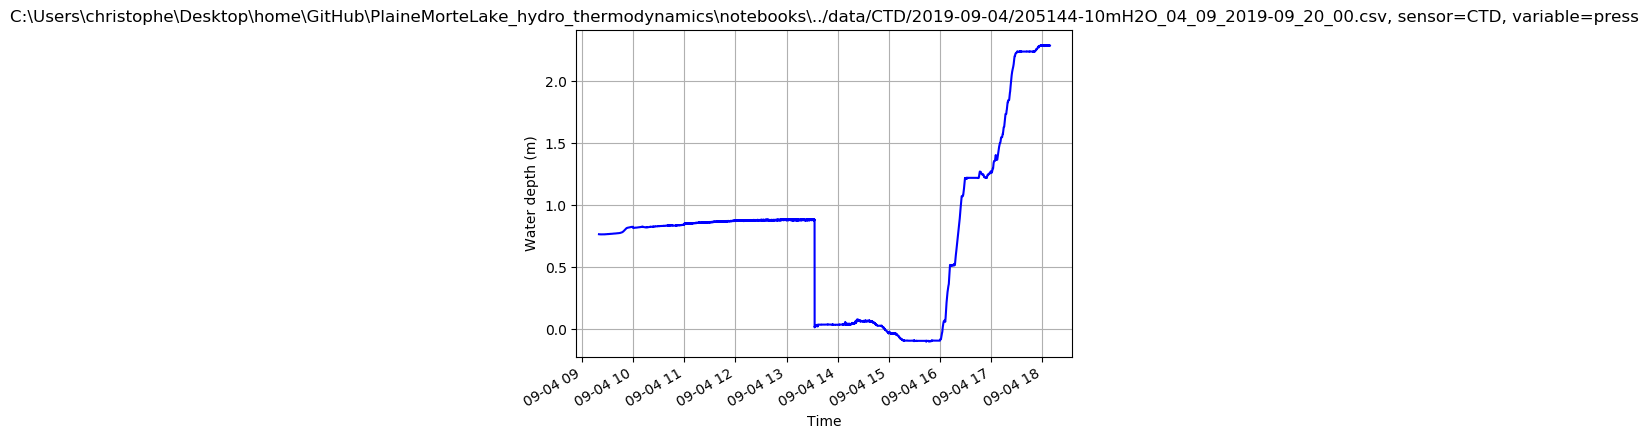

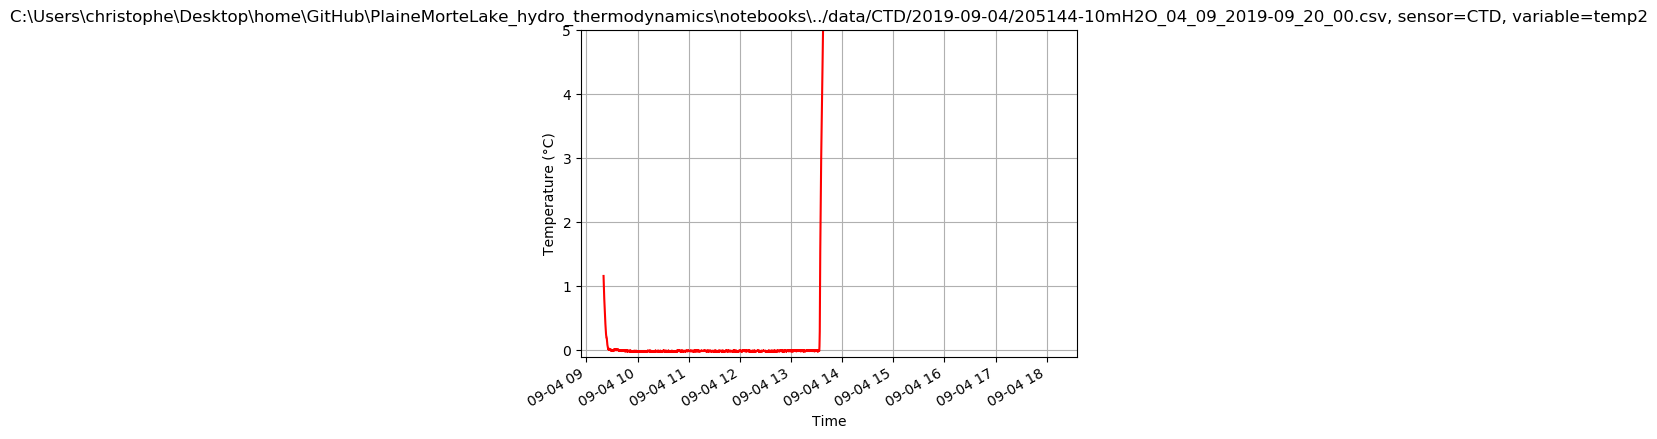

In [16]:
pygui(false)
plotit(path_CTD*"2019-09-04/205144-10mH2O_04_09_2019-09_20_00.csv", :CTD, :press)
plotit(path_CTD*"2019-09-04/205144-10mH2O_04_09_2019-09_20_00.csv", :CTD, :temp2)


### To gather and plot Temperature and Pressure time series at P1

In [17]:
filename_P1=Dict();
filename_P1[1]="2019-07-04/207265-300mH2O_04_07_2019-09_00_00.csv"
filename_P1[2]="2019-07-09/205144-10mH2O_09_07_2019-08_00_00.csv"
filename_P1[3]="2019-07-11/205144-10mH2O_09_07_2019-16_30_00.csv"
filename_P1[4]="2019-07-11/205144-10mH2O_11_07_2019-11_45_00.csv"
filename_P1[5]="2019-07-15/205144-10mH2O_11_07_2019-13_45_00.csv"
filename_P1[6]="2019-07-16/205144-10mH2O_15_07_2019-14_29_39.csv"
filename_P1[7]="2019-07-24/205144-10mH2O_16_07_2019-17_15_00.csv"
filename_P1[8]="2019-07-25/205144-10mH2O_24_07_2019-15_41_14.csv"
filename_P1[9]="2019-07-30/205144-10mH2O_25_07_2019-13_45_00.csv"
filename_P1[10]="2019-07-31/205144-10mH2O_30_07_2019-12_30_00.csv"
filename_P1[11]="2019-08-08/205144-10mH2O_31_07_2019-11_45_00.csv"
filename_P1[12]="2019-08-23/205144-10mH2O_23_08_2019-11_00_00.csv"
filename_P1[13]="2019-09-04/205144-10mH2O_23_08_2019-14_45_00.csv"
filename_P1[14]="2019-09-04/205144-10mH2O_04_09_2019-09_20_00.csv"

press1=[]
temp1=[]
t1=[]
                                  
for i in 2:length(filename_P1)  ##4th july not interesting
    local d = read_Keller_DCX22_CTD(path_CTD*filename_P1[i]);
    local ds = smooth_d(d)   #smooth function, 10 for press, 30 for temp by default
    append!(press1,ds[:press]);
    append!(t1,d[:t]);
    append!(temp1,ds[:temp2]);
end

### Water stage measurements on field for validation

In [18]:
#Validation Points from field measurements
x1=[DateTime(2019,7,10,15,39),DateTime(2019,7,11,8,10),DateTime(2019,7,11,12,12),
    DateTime(2019,7,16,11,57),DateTime(2019,7,30,12,7), DateTime(2019,8,14,9),DateTime(2019,8,23,11,48),DateTime(2019,9,4,9,1)]
y1=[0.22,0.31,0.37,0.4,0.5,0.7,0.65,0.1];
yerr1=[0.05,0.05,0.05,0.1,0.2,0.05,0.05,0.05];

### Automatically and manually deletion values when sensors was out of water (Temperature  >-0.05°C and < 0.35°C)

In [19]:
#Delete values when sensors was out of water
purge=[]
for i in 101:length(t1)-100
    
    if temp1[i] > 0.35 || temp1[i] < -0.05  #treschold for air temperature detection
        append!(purge,collect(i-100:i+100))  #to take time margin
    end
    
end
purge=sort(unique(purge))
[press1[i] = NaN for i = purge]
[temp1[i] = NaN for i = purge];

#Delete manually
indice = vcat(7500:8200,57330:57500,108000:114000,128850:129817,179100:179400,188976:189012)
#indices to remove pressure only, temperature are OK for those indices
indice_press = vcat(98500:108000,187250:189000,206000:209000,43500:44000,45550:45615,110000:164600)

[press1[i] = NaN for i = vcat(indice,indice_press)]
[temp1[i] = NaN for i = indice];


### Plot P1 time series

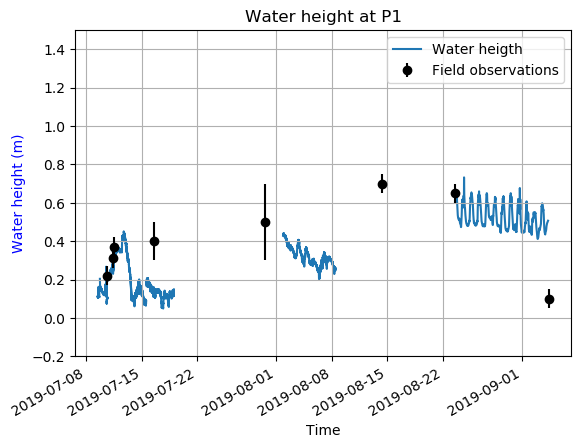

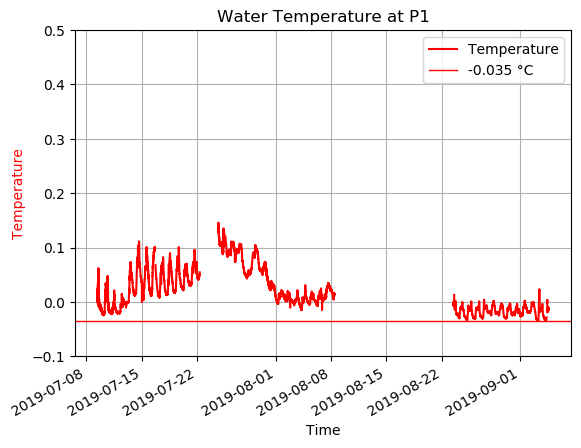

sys:1: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


PyObject <matplotlib.legend.Legend object at 0x000000005D553978>

In [20]:
pygui(false)
#Pressure
fig=figure()
plot(t1,press1,linestyle = "-",label = "Water heigth",zorder = -1)
#axvline(x = DateTime(2019,7,10,12),linewidth=1,color="r")
fig[:autofmt_xdate](bottom = 0.2,rotation = 30,ha="right")
ylim(-0.2,1.5)
title("Water height at P1")
xlabel("Time")
ylabel("Water height (m)",color="blue")
errorbar(x1,y1,yerr1,linestyle="",marker="o",color="black",label="Field observations")
legend()
grid(true)

#temperature
fig=figure()
plot(t1,temp1,color="red",linestyle="-",label="Temperature") 
fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right")
ylim(-0.1,0.5)
title("Water Temperature at P1")
xlabel("Time")
ylabel("Temperature",color="red")

grid(true)

#Temperature correction (manual) (water temperature cannot be negative)
temp_corr_P1 = 0.035
axhline(y = -temp_corr_P1,linewidth=1,color="r", label="-$temp_corr_P1 °C")
legend()

### Up-scale time series, daily and hourly

In [21]:
(t1_hour,temp1_hour) = (upscale_timeseries(temp1, t1,"hour")[1],upscale_timeseries(temp1, t1,"hour")[2]);
(t1_daily,temp1_daily) = (upscale_timeseries(temp1, t1,"day")[1],upscale_timeseries(temp1, t1,"day")[2]);
(t1_hour,stage1_hour) = (upscale_timeseries(press1, t1,"hour")[1],upscale_timeseries(press1, t1,"hour")[2]);
(t1_daily,stage1_daily) = (upscale_timeseries(press1, t1,"day")[1],upscale_timeseries(press1, t1,"day")[2]);

### To store (corrected) time series in CSV files in `path_products`

In [22]:
using DataFrames
using CSV

#Temperature in °C (raw, daily + corr, hourly + corr)

df=DataFrame(Date_Time = t1, Temperature = round.(temp1, digits=3) )
CSV.write(path_products*"temp1_corr_raw.csv",df ; dateformat = "yyyy-mm-ddTH:M:S")

df=DataFrame(Date_Time = t1_daily, Temperature_daily = round.(temp1_daily, digits=3) .+ temp_corr_P1)
CSV.write(path_products*"temp1_daily.csv",df ; dateformat = "yyyy-mm-ddTH:M:S")

df=DataFrame(Date_Time = t1_hour, Temperature_hourly = round.(temp1_hour, digits=3) .+ temp_corr_P1)
CSV.write(path_products*"temp1_hour.csv",df ; dateformat = "yyyy-mm-ddTH:M:S");

#Water height (stage) in m

df=DataFrame(Date_Time = t1, Water_height = round.(press1,digits=3))
CSV.write(path_products*"stage1_corr_raw.csv",df ; dateformat = "yyyy-mm-ddTH:M:S")

df1=DataFrame(Date_Time = t1_daily, Water_height = round.(stage1_daily, digits = 3) )
CSV.write(path_products*"stage1_daily.csv",df1 ; dateformat = "yyyy-mm-ddTH:M:S")

df2=DataFrame(Date_Time = t1_hour, Temperature_hourly = round.(stage1_hour, digits=3) )
CSV.write(path_products*"stage1_hour.csv",df2 ; dateformat = "yyyy-mm-ddTH:M:S");

# @ P2 

In [23]:
filename_P2=Dict();
filename_P2[1]="2019-07-04/205309-100mH2O_04_07_2019-08_00_00.csv";
filename_P2[2]="2019-07-09/205145-10mH2O_09_07_2019-08_00_00.csv";
filename_P2[3]="2019-07-11/205145-10mH2O_09_07_2019-16_15_00.csv";
filename_P2[4]="2019-07-11/205145-10mH2O_11_07_2019-11_30_00.csv";
filename_P2[5]="2019-07-15/205145-10mH2O_11_07_2019-13_30_00.csv";
filename_P2[6]="2019-07-16/205145-10mH2O_15_07_2019-15_00_00.csv";
filename_P2[7]="2019-07-24/205145-10mH2O_16_07_2019-17_00_00.csv";
filename_P2[8]="2019-07-25/205145-10mH2O_24_07_2019-16_15_00.csv";
filename_P2[9]="2019-07-30/205145-10mH2O_25_07_2019-13_30_00-0.csv";
filename_P2[10]="2019-07-31/205145-10mH2O_30_07_2019-13_30_00.csv";
filename_P2[11]="2019-08-08/205145-10mH2O_31_07_2019-12_00_00.csv";


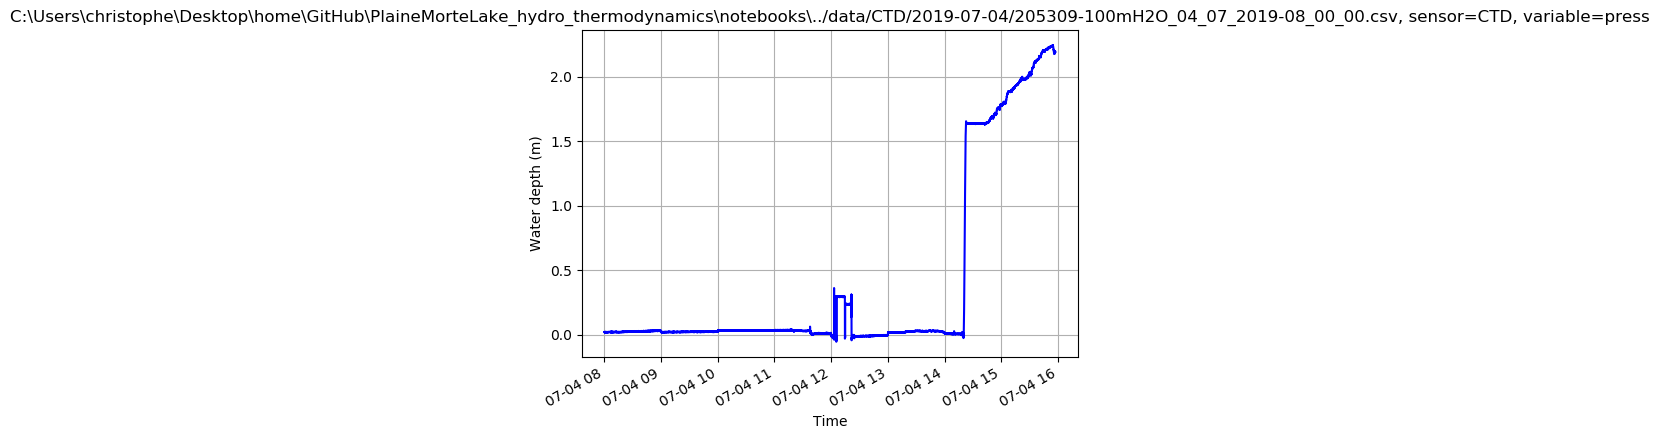

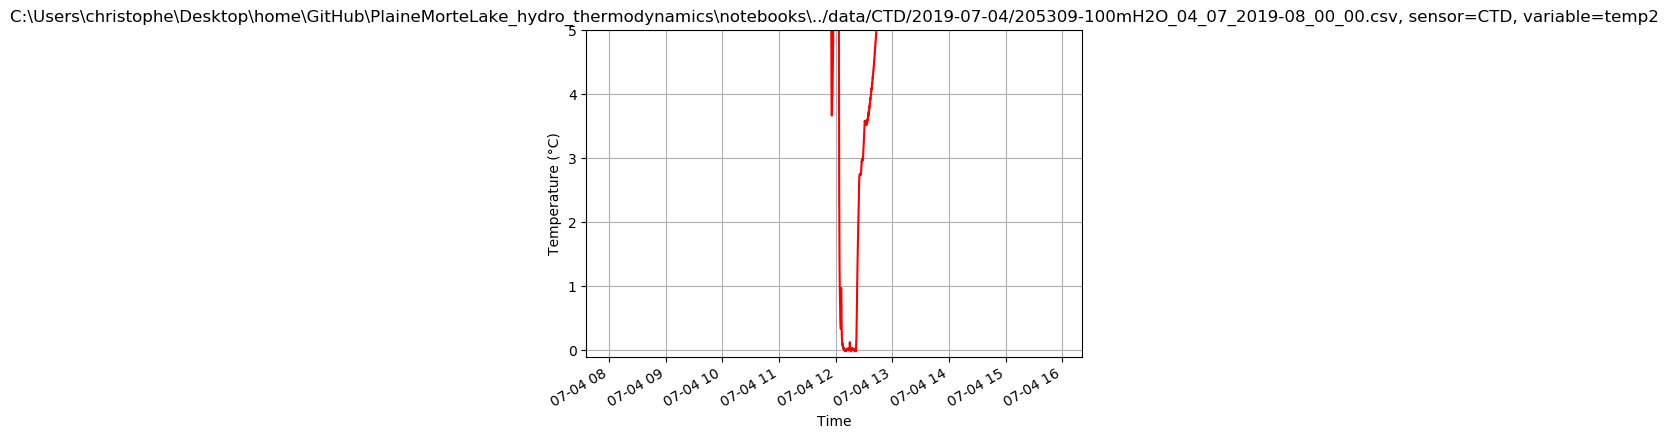

In [24]:
i=1
    plotit(path_CTD*filename_P2[i], :CTD, :press)
    plotit(path_CTD*filename_P2[i], :CTD, :temp2)

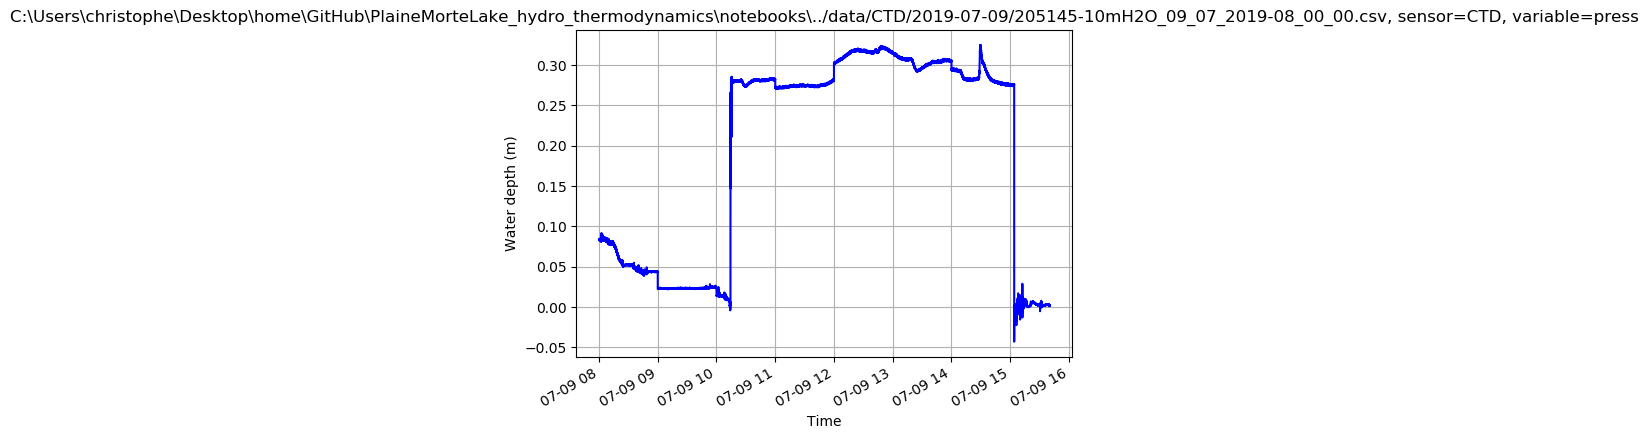

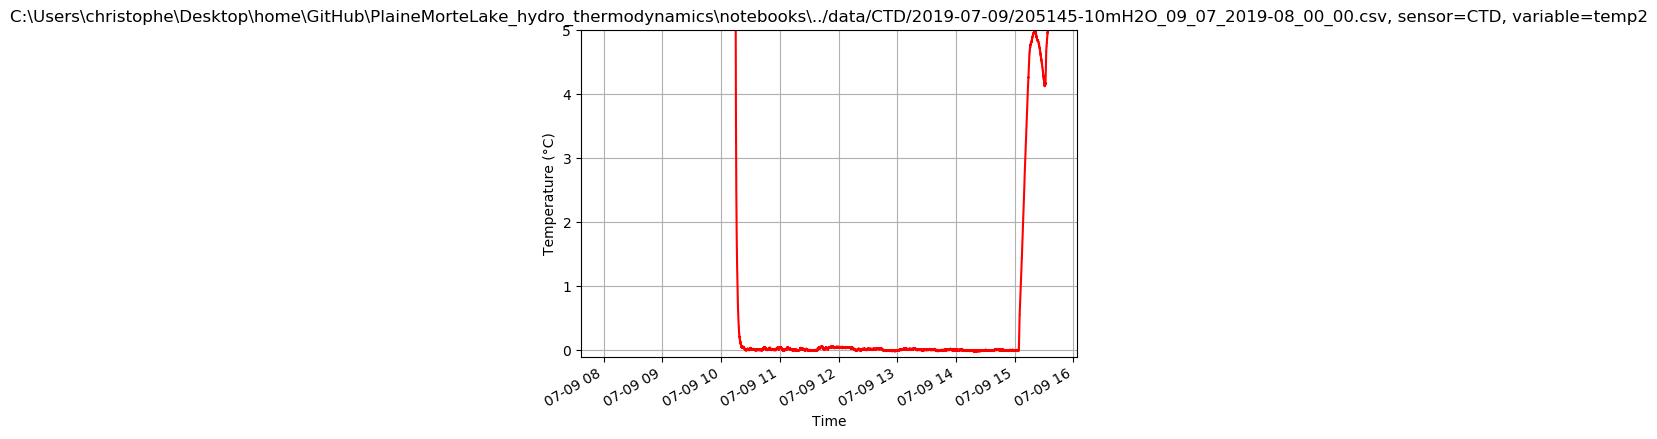

In [25]:
i=2
    plotit(path_CTD*filename_P2[i], :CTD, :press)
    plotit(path_CTD*filename_P2[i], :CTD, :temp2)


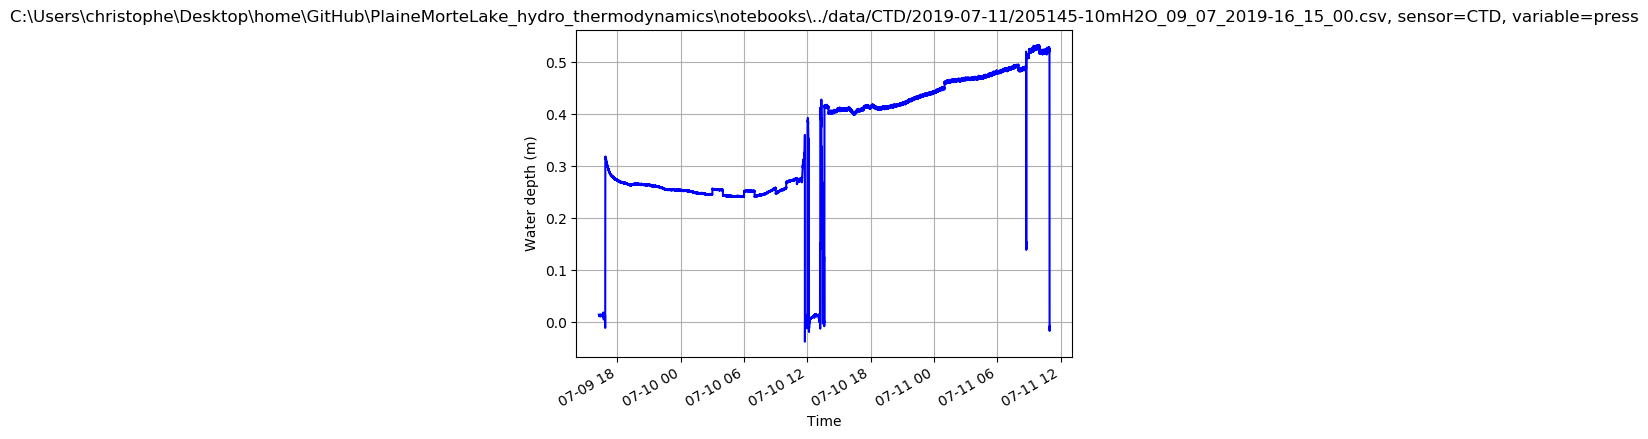

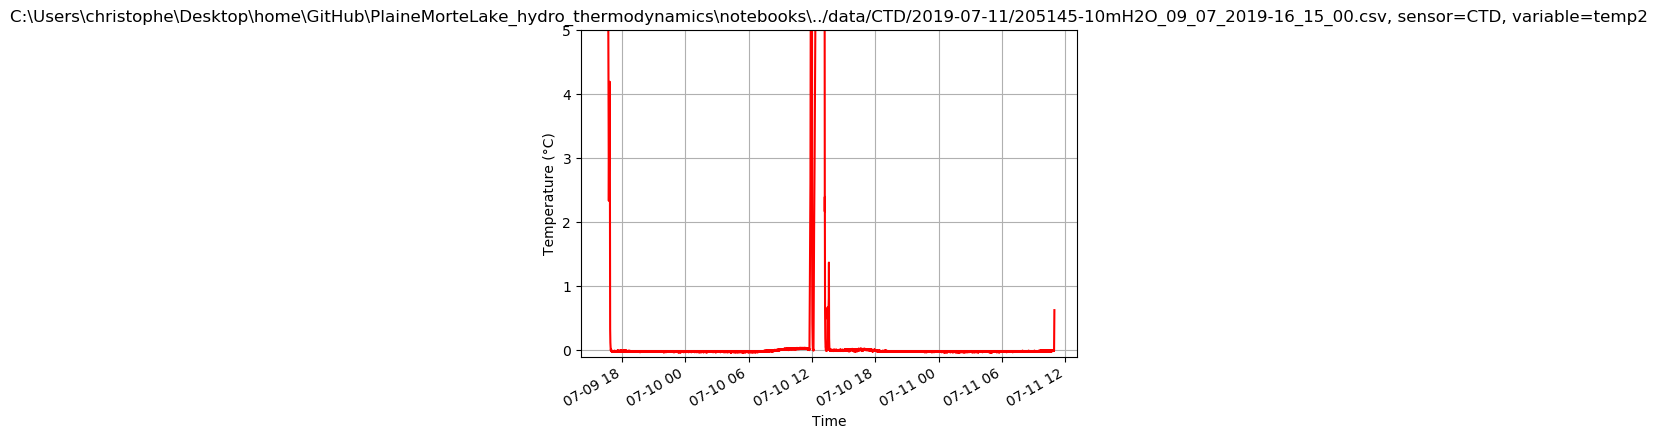

In [26]:
i=3

    plotit(path_CTD*filename_P2[i], :CTD, :press)
plotit(path_CTD*filename_P2[i], :CTD, :temp2)
 

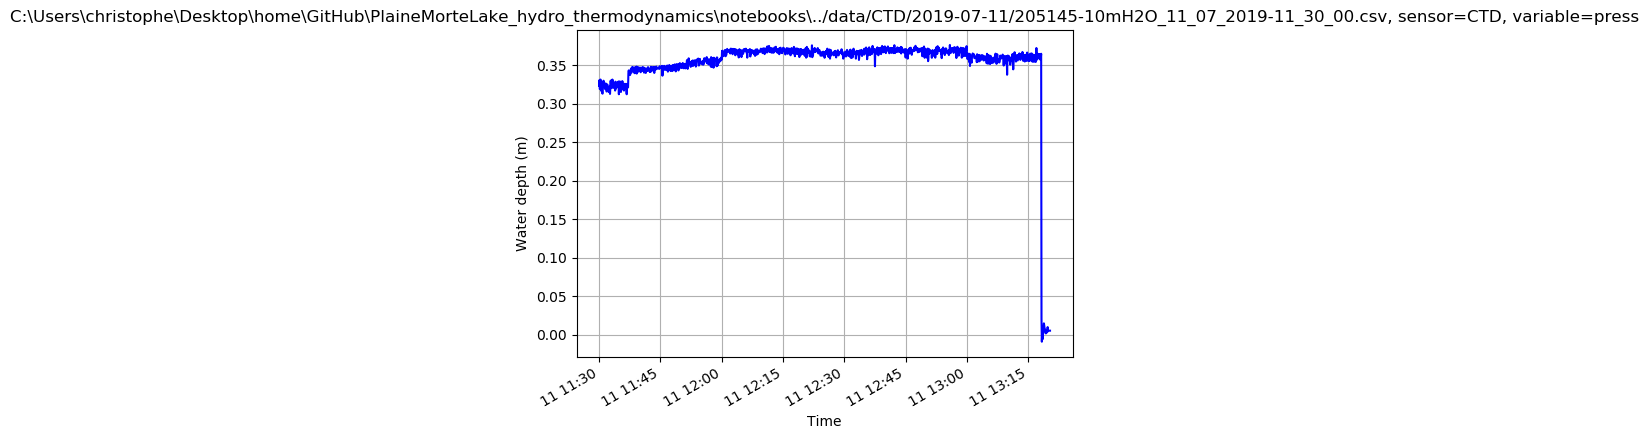

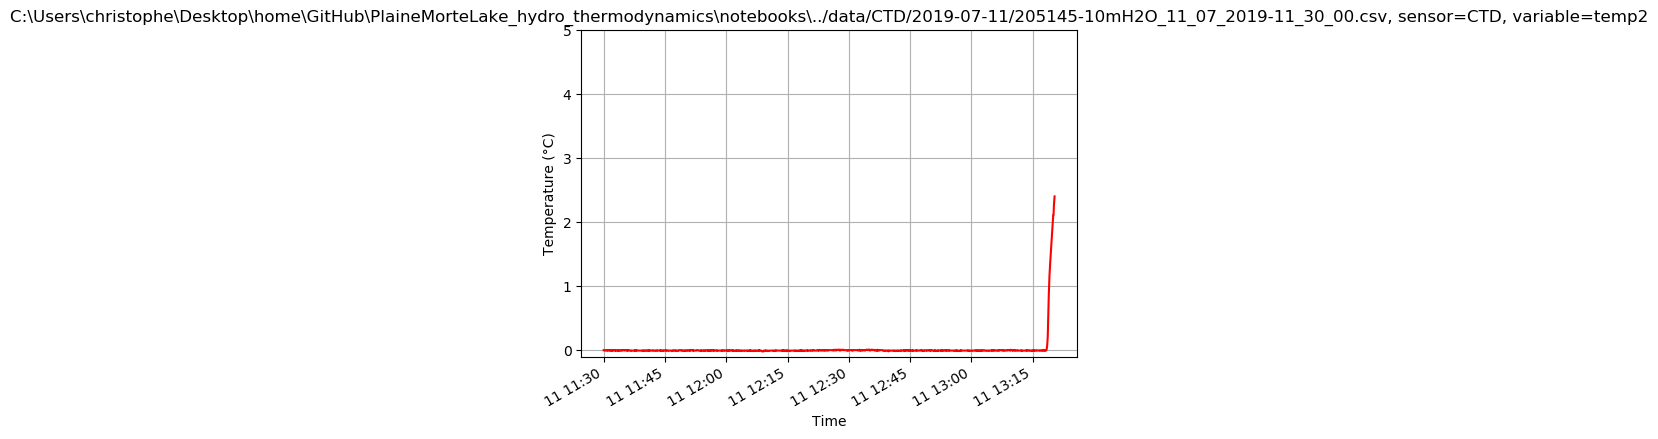

In [27]:
i=4
    plotit(path_CTD*filename_P2[i], :CTD, :press)
plotit(path_CTD*filename_P2[i], :CTD, :temp2)
 

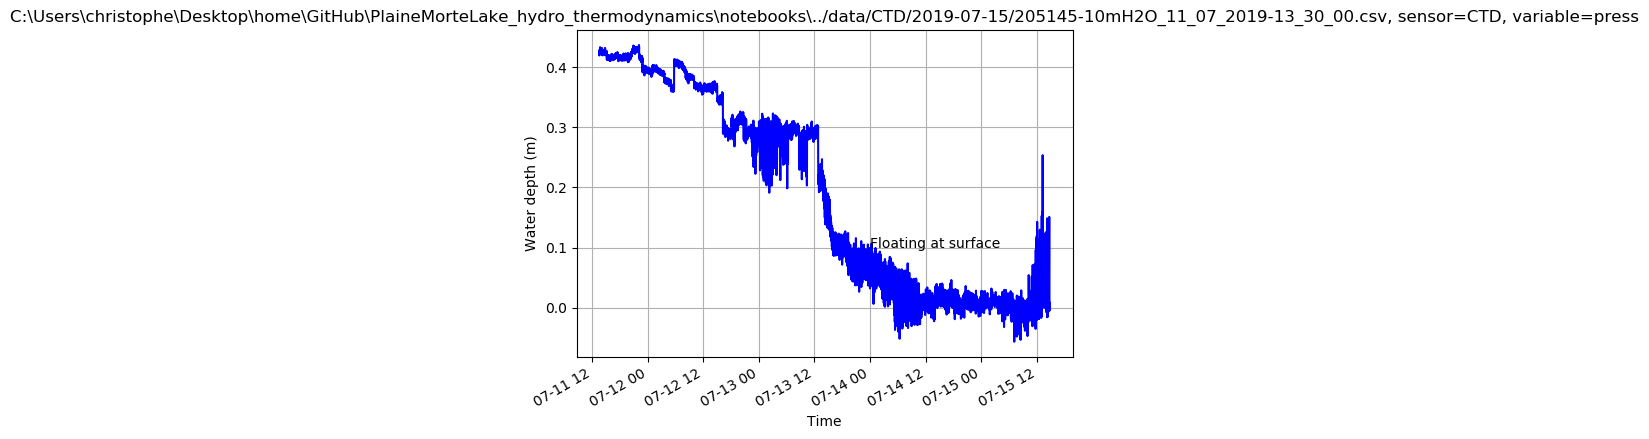

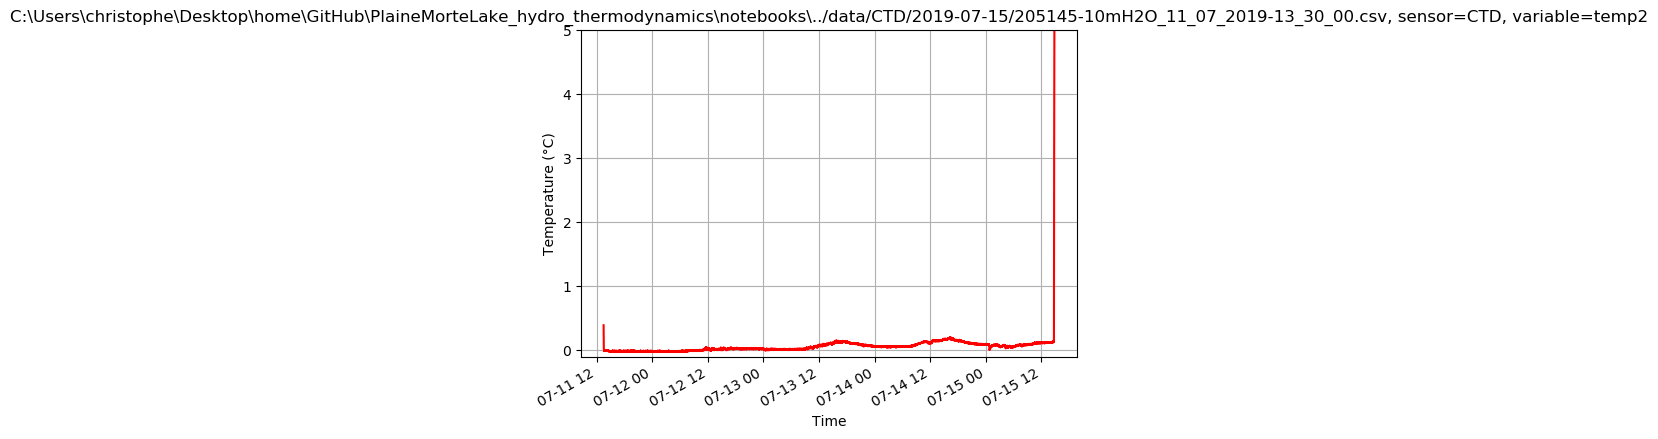

In [28]:
i=5
    plotit(path_CTD*filename_P2[i], :CTD, :press)
text(Date(2019,7,14),0.1,"Floating at surface")
    plotit(path_CTD*filename_P2[i], :CTD, :temp2)
 

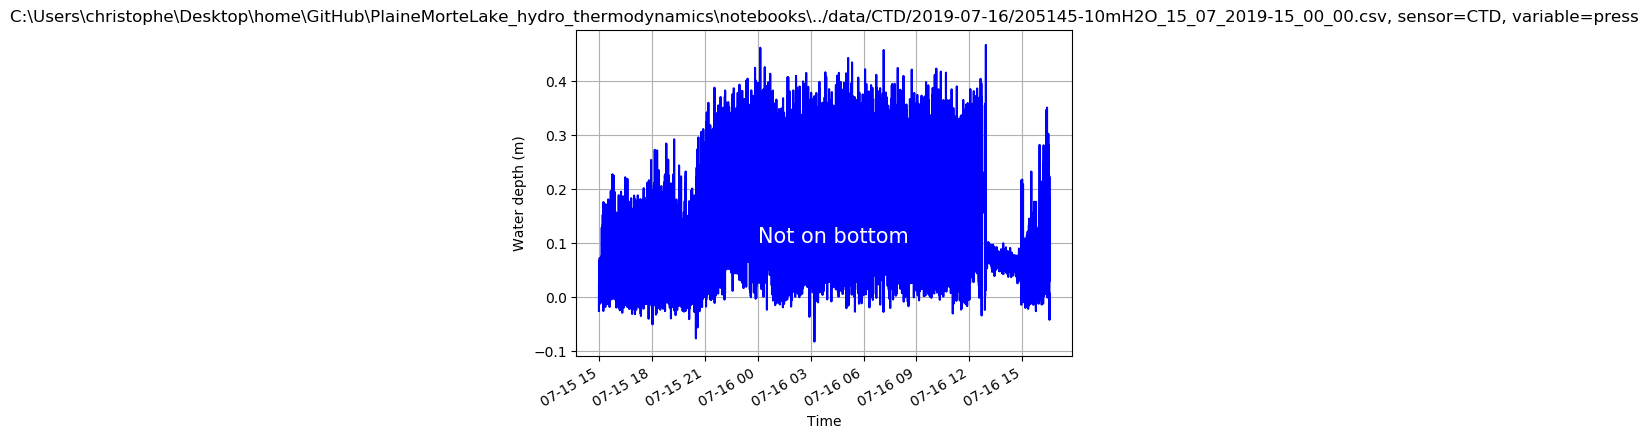

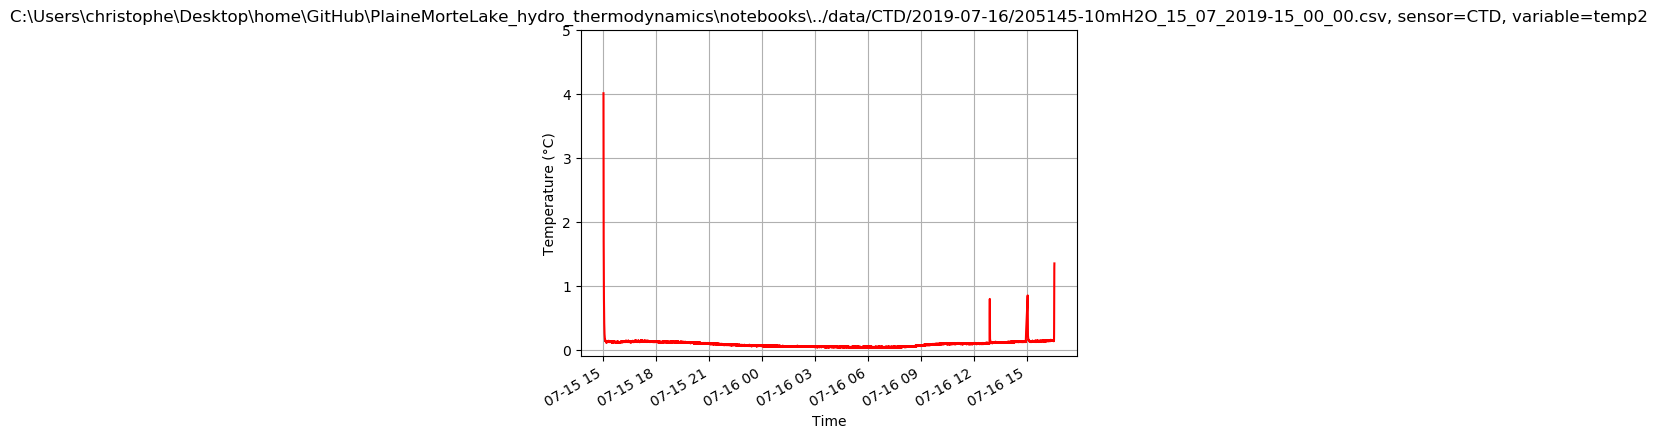

In [29]:
i=6
    plotit(path_CTD*filename_P2[i], :CTD, :press)
text(Date(2019,7,16),0.1,"Not on bottom",color="white",fontsize=15)
plotit(path_CTD*filename_P2[i], :CTD, :temp2)
 

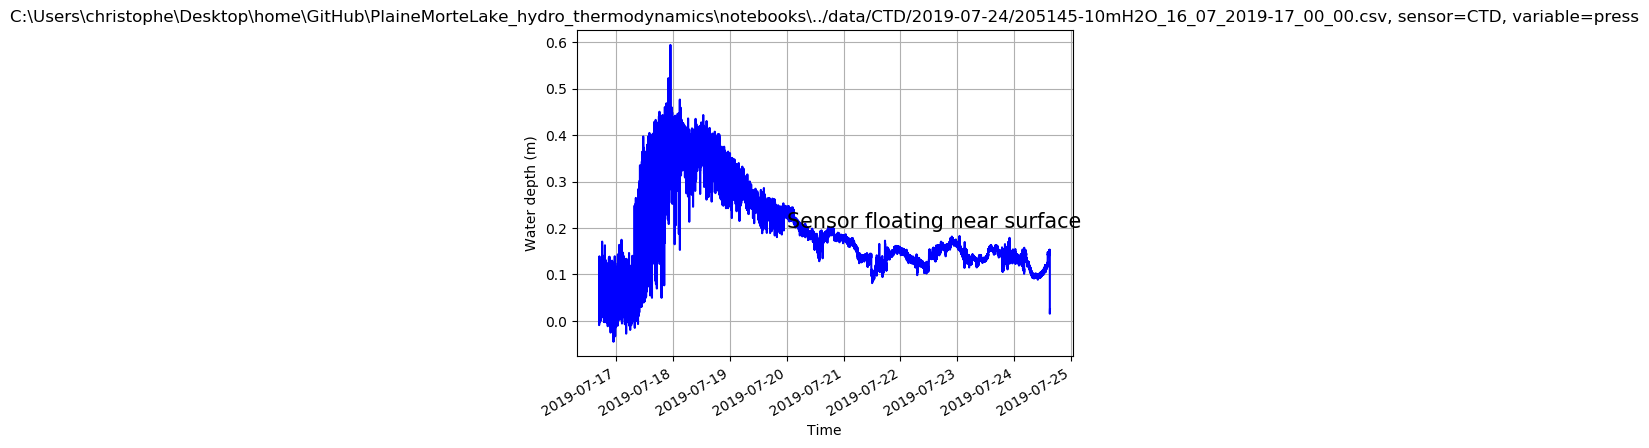

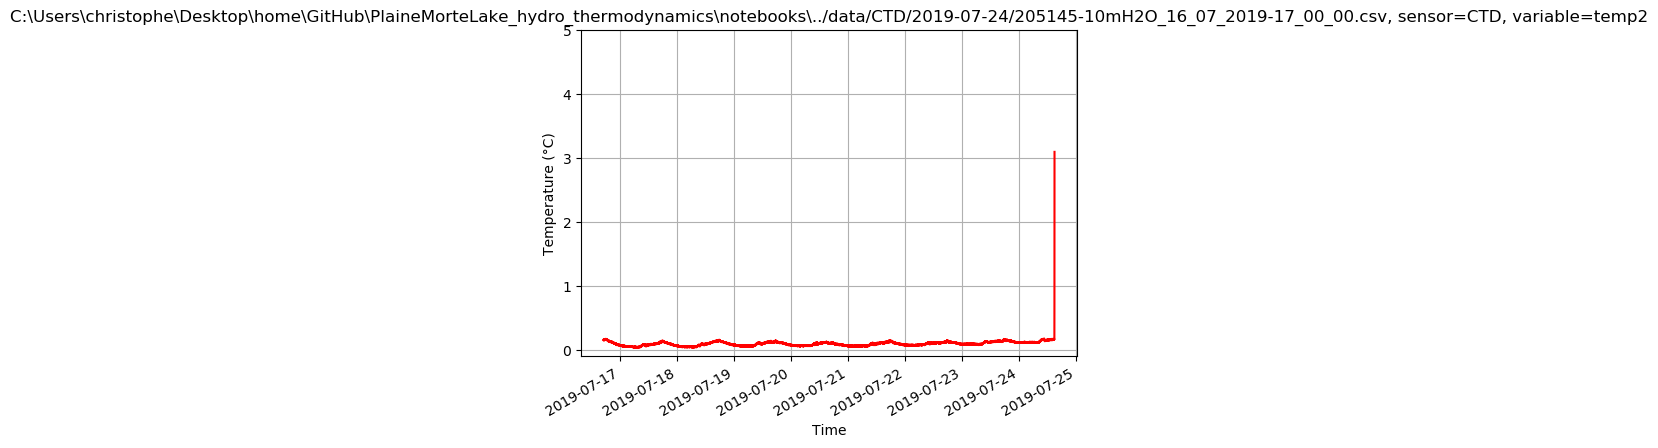

In [30]:
i=7
    plotit(path_CTD*filename_P2[i], :CTD, :press)
text(Date(2019,7,20),0.2,"Sensor floating near surface",fontsize=15)
plotit(path_CTD*filename_P2[i], :CTD, :temp2)


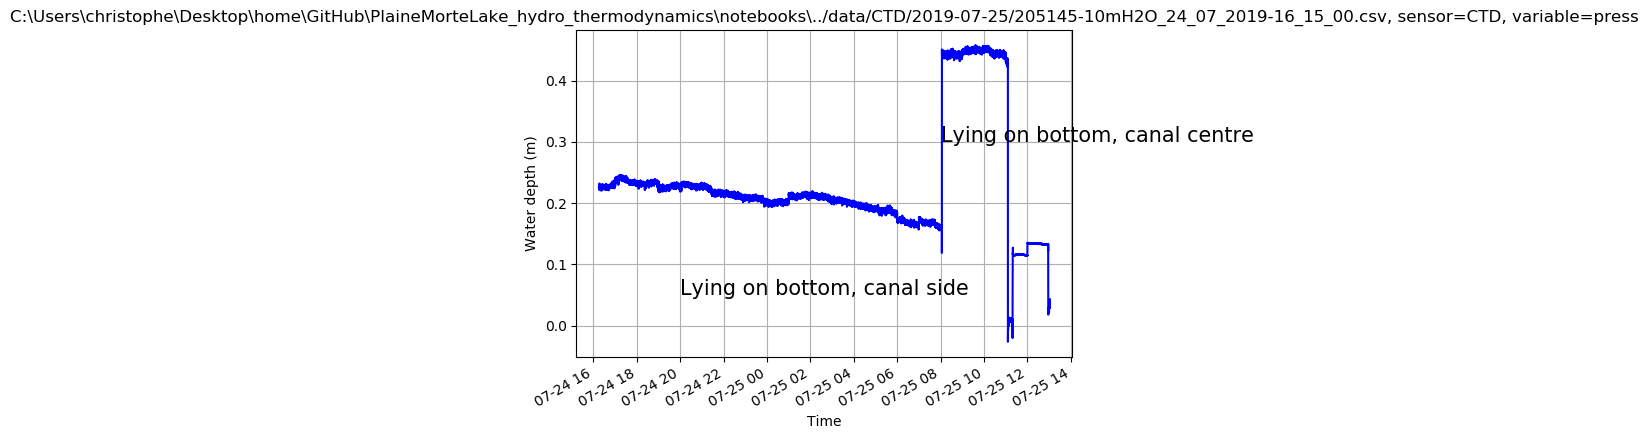

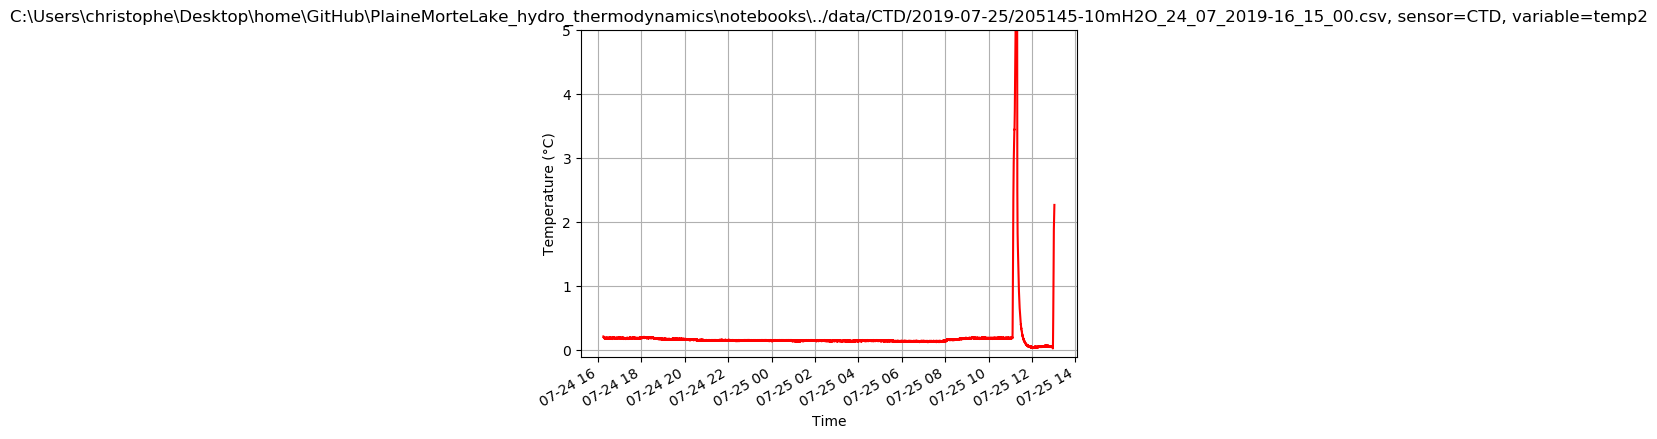

In [31]:
i=8
    plotit(path_CTD*filename_P2[i], :CTD, :press)
text(DateTime(2019,7,25,8),0.3,"Lying on bottom, canal centre",fontsize=15)
text(DateTime(2019,7,24,20),0.05,"Lying on bottom, canal side",fontsize=15)
plotit(path_CTD*filename_P2[i], :CTD, :temp2)


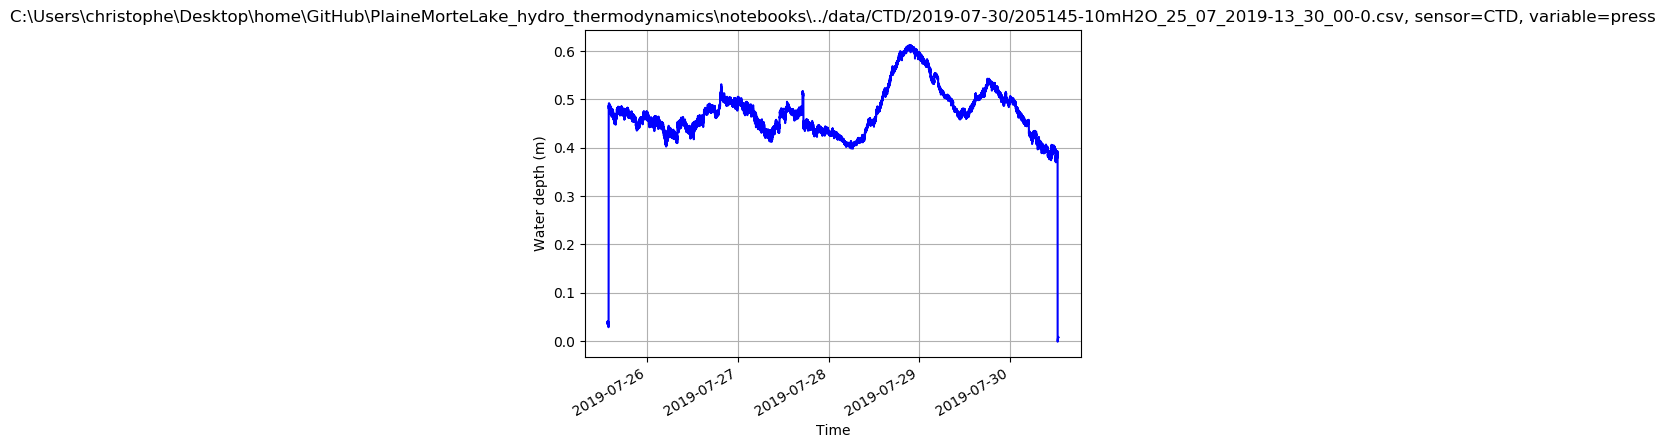

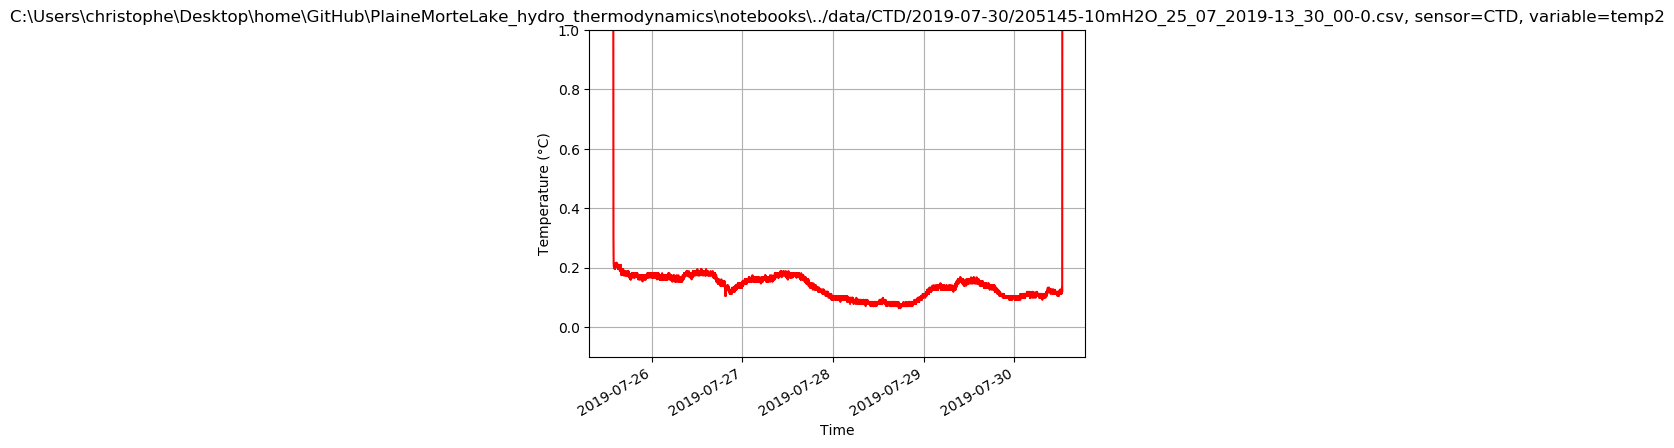

(-0.1, 1)

In [32]:
i=9
    plotit(path_CTD*filename_P2[i], :CTD, :press)
plotit(path_CTD*filename_P2[i], :CTD, :temp2)
ylim(-0.1,1)
  


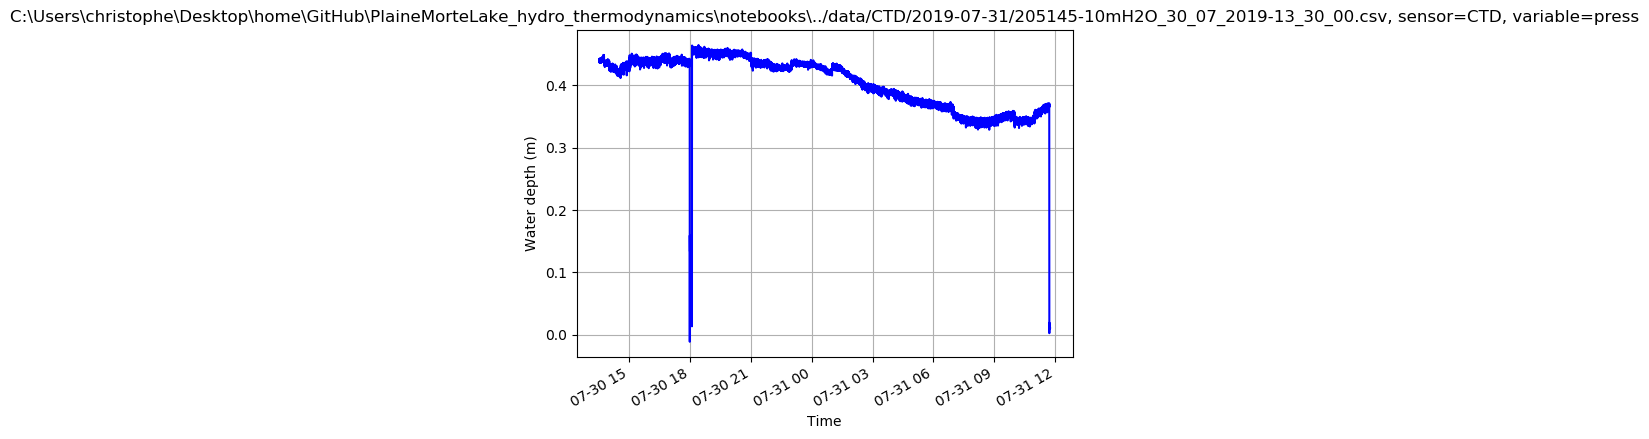

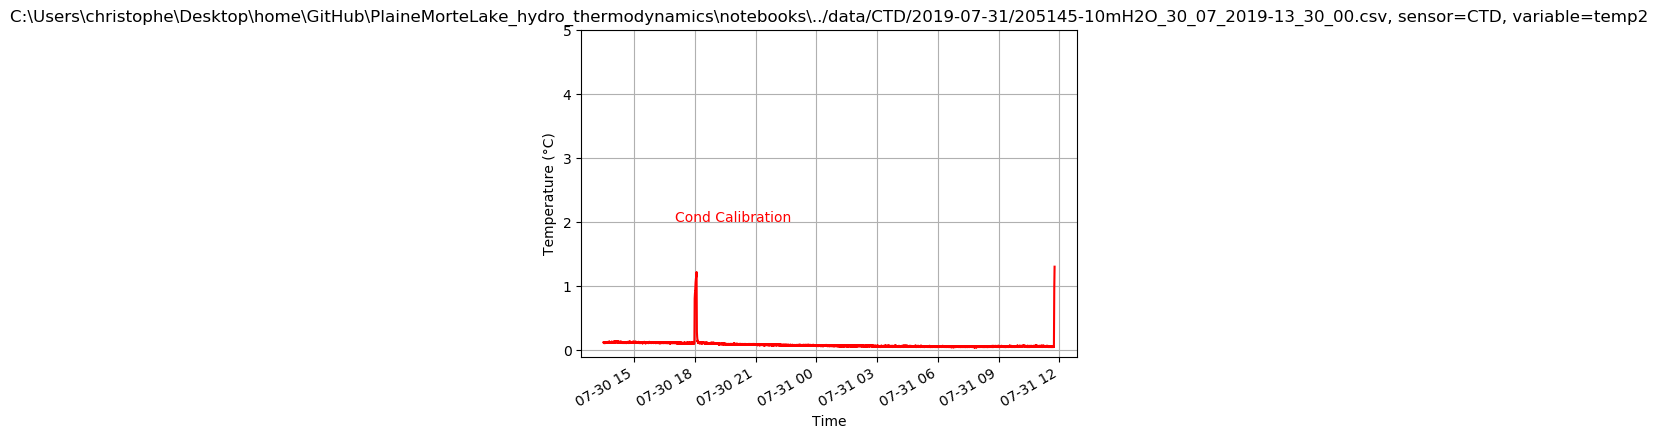

PyObject Text(2019-07-30 17:00:00, 2, 'Cond Calibration')

In [33]:
i=10
    plotit(path_CTD*filename_P2[i], :CTD, :press)
plotit(path_CTD*filename_P2[i], :CTD, :temp2)
text(DateTime(2019,7,30,17),2,"Cond Calibration",color="red")
   


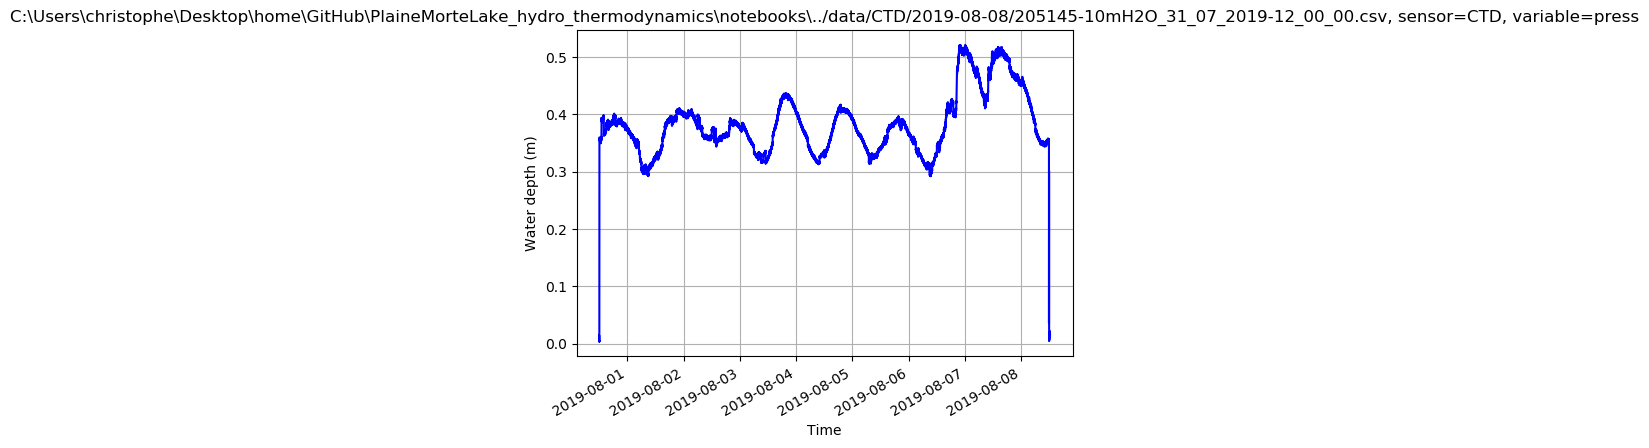

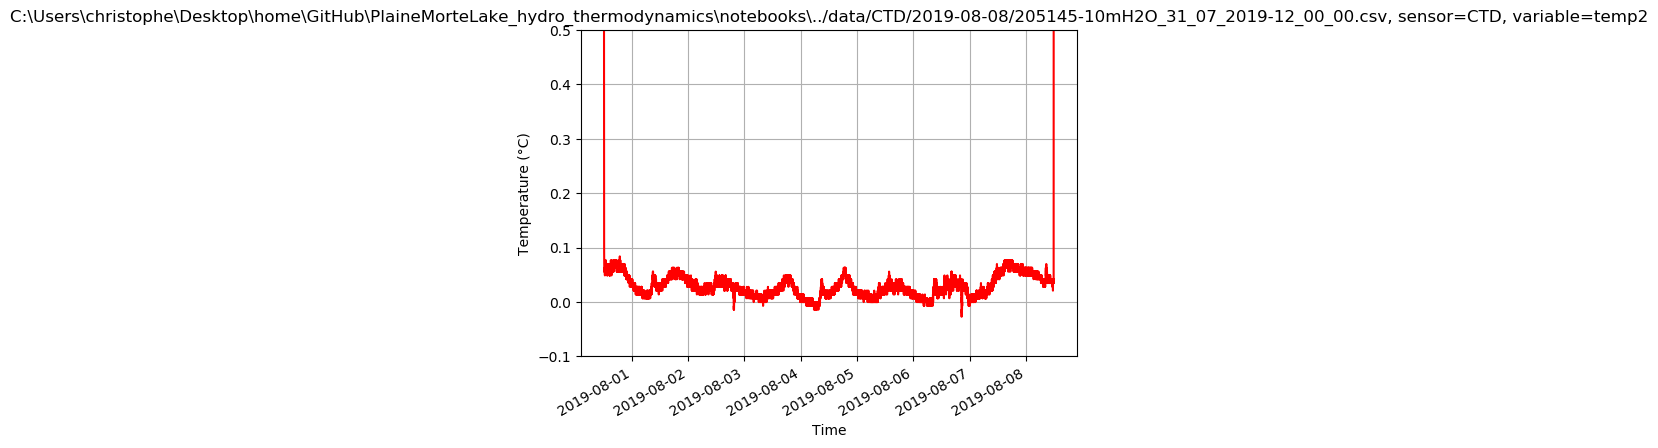

In [34]:
i=11
    plotit(path_CTD*filename_P2[i], :CTD, :press)
plotit(path_CTD*filename_P2[i], :CTD, :temp2)
ylim(-0.1,0.5);



### Water stage observation from field

In [35]:
#Validation Points from field measurements
x2=[DateTime(2019,7,10,10,20),DateTime(2019,7,11,8,38),DateTime(2019,7,11,12,20),
    DateTime(2019,7,16,12,40),DateTime(2019,7,24,16,7),DateTime(2019,7,25,8,6), DateTime(2019,7,30,12,43),DateTime(2019,8,8,11,42),
    DateTime(2019,8,14,9,19),DateTime(2019,8,23,12,22),DateTime(2019,9,4,9,36)]
y2=[0.38,0.52,0.51,0.5,0.25,0.55,0.5,0.32,0.2,0.2,0.1];
yerr2 = [0.05,0.05,0.05,0.10,0.1,0.05,0.05,0.05,0.05,0.05,0.05];

### Reconstructed temperature and  water stage time series at P2

In [36]:
press2=[]
temp2=[]
t2=[]
for i in 2:length(filename_P2)  #4th july not usefull
    local d = read_Keller_DCX22_CTD(path_CTD*filename_P2[i]);
    local ds = smooth_d(d)
    append!(press2,ds[:press]);
    append!(t2,d[:t]);
    append!(temp2,ds[:temp2]);
end

### Automatically and manually deletion values when sensors was out of water (Temperature  >-0.05°C and < 0.35°C)

In [37]:
#Delete values when sensors was out of water
purge=[]

for i in 51:length(t2)-50
    
    if temp2[i] > 0.25 || temp2[i] < -0.05  #treschold for air temperature detection
        append!(purge,collect(i-50:i+50))
    end
    
end

purge=sort(unique(purge))
[press2[i] = NaN for i = purge]
[temp2[i] = NaN for i = purge];

#Delete manually

indice = vcat(1:8497,87118:87262,126000:127500);
indice_press = vcat(56780:56810,123969:124010,58400:59650,42800:42900,56730:58500,59650:76140,93580:112550
, 110000:125000,76000:87200,88731:94000,87000:89000)
[press2[i] = NaN for i = vcat(indice,indice_press)]
[temp2[i] = NaN for i = indice];

### Plot reconstructed and corrected time series at P2

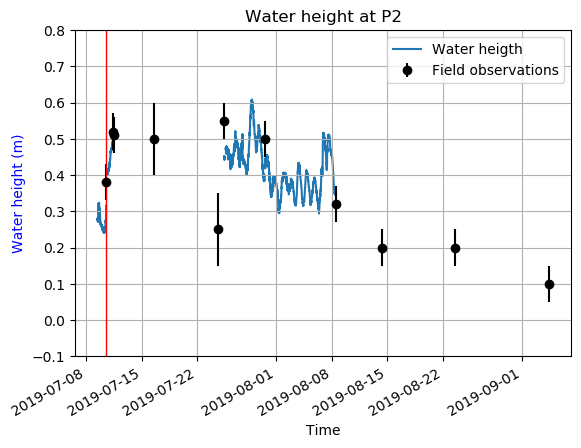

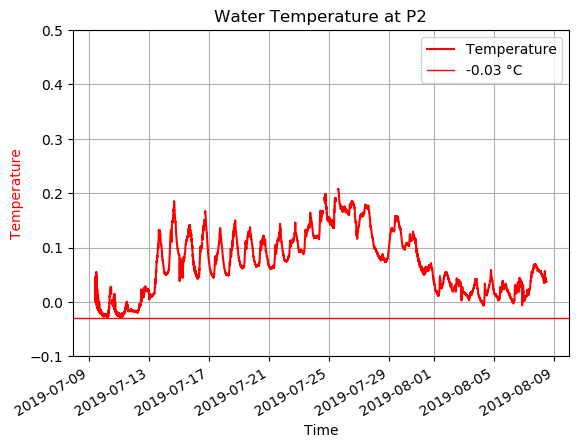

PyObject <matplotlib.legend.Legend object at 0x0000000001F8F2B0>

In [38]:
pygui(false)
#Pressure
fig=figure()
plot(t2,press2,linestyle="-",label="Water heigth",zorder=-1)
fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right")
ylim(-0.1,0.8)
title("Water height at P2")
xlabel("Time")
ylabel("Water height (m)",color="blue")
errorbar(x2,y2,yerr2,color="black",linestyle="",marker="o",label="Field observations")
axvline(x=DateTime(2019,7,10,12),linewidth=1,color="r")
legend()
grid(true)

#temperature
fig=figure()
plot(t2,temp2,color="red",linestyle="-",label="Temperature") 
fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right")
ylim(-0.1,0.5)
title("Water Temperature at P2")
xlabel("Time")
ylabel("Temperature",color="red")

grid(true)

#Temperature correction (manual) (water temperature cannot be negative)
temp_corr_P2 = 0.03
axhline(y = -temp_corr_P2,linewidth=1,color="r", label="-$temp_corr_P2 °C")
legend()

### Up-scale time series

In [39]:
(t2_hour,temp2_hour) = (upscale_timeseries(temp2, t2,"hour")[1],upscale_timeseries(temp2, t2,"hour")[2]);
(t2_daily,temp2_daily) = (upscale_timeseries(temp2, t2,"day")[1],upscale_timeseries(temp2, t2,"day")[2]);
(t2_hour,stage2_hour) = (upscale_timeseries(press2, t2,"hour")[1],upscale_timeseries(press2, t2,"hour")[2]);
(t2_daily,stage2_daily) = (upscale_timeseries(press2, t2,"day")[1],upscale_timeseries(press2, t2,"day")[2]);

## To store (corrected) P2 time series in `path_products` 

In [40]:
using DataFrames
using CSV

#Temperature in °C (raw, daily + corr, hourly + corr)

df=DataFrame(Date_Time = t2, Temperature = round.(temp2, digits=3) )
CSV.write(path_products*"temp2_corr_raw.csv",df ; dateformat = "yyyy-mm-ddTH:M:S")

df=DataFrame(Date_Time = t2_daily, Temperature_daily = round.(temp2_daily, digits=3) .+ temp_corr_P2)
CSV.write(path_products*"temp2_daily.csv",df ; dateformat = "yyyy-mm-ddTH:M:S")

df=DataFrame(Date_Time = t2_hour, Temperature_hourly = round.(temp2_hour, digits=3) .+ temp_corr_P2)
CSV.write(path_products*"temp2_hour.csv",df ; dateformat = "yyyy-mm-ddTH:M:S");

#Water height (stage) in m

df=DataFrame(Date_Time = t2, Water_height = round.(press2,digits=3))
CSV.write(path_products*"stage2_corr_raw.csv",df ; dateformat = "yyyy-mm-ddTH:M:S")

df=DataFrame(Date_Time = t2_daily, Water_height = round.(stage2_daily, digits = 3) )
CSV.write(path_products*"stage2_daily.csv",df ; dateformat = "yyyy-mm-ddTH:M:S")

df=DataFrame(Date_Time = t2_hour, Temperature_hourly = round.(stage2_hour, digits=3) )
CSV.write(path_products*"stage2_hour.csv",df ; dateformat = "yyyy-mm-ddTH:M:S");

# @P3

In [41]:
filename_P3=Dict();
filename_P3[1]="2019-07-08/205145-10mH2O_08_07_2019-10_00_00.csv";
filename_P3[2]="2019-07-11/207265-300mH2O_09_07_2019-08_00_00.csv";
filename_P3[3]="2019-07-11/207265-300mH2O_11_07_2019-11_00_00.csv";
filename_P3[4]="2019-07-15/207265-300mH2O_11_07_2019-13_15_00.csv";
filename_P3[5]="2019-07-16/207265-300mH2O_15_07_2019-15_30_00.csv";
filename_P3[6]="2019-07-24/207265-300mH2O_16_07_2019-16_30_00.csv";
filename_P3[7]="2019-07-25/207265-300mH2O_24_07_2019-13_45_00.csv";
filename_P3[8]="2019-07-30/207265-300mH2O_25_07_2019-14_15_00.csv";
filename_P3[9]="2019-07-31/207265-300mH2O_30_07_2019-13_45_00.csv";
filename_P3[10]="2019-08-08/207265-300mH2O_31_07_2019-12_30_00.csv";
#filename_P3[11]="2019-08-08/207265-300mH2O_31_07_2019-08_01_40.csv";
filename_P3[11]="2019-08-23/205145-10mH2O_08_08_2019-12_45_00.csv";
filename_P3[12]="2019-08-23/207265-300mH2O_23_08_2019-11_00_00.csv";
filename_P3[13]="2019-09-04/207265-300mH2O_23_08_2019-14_30_00.csv";

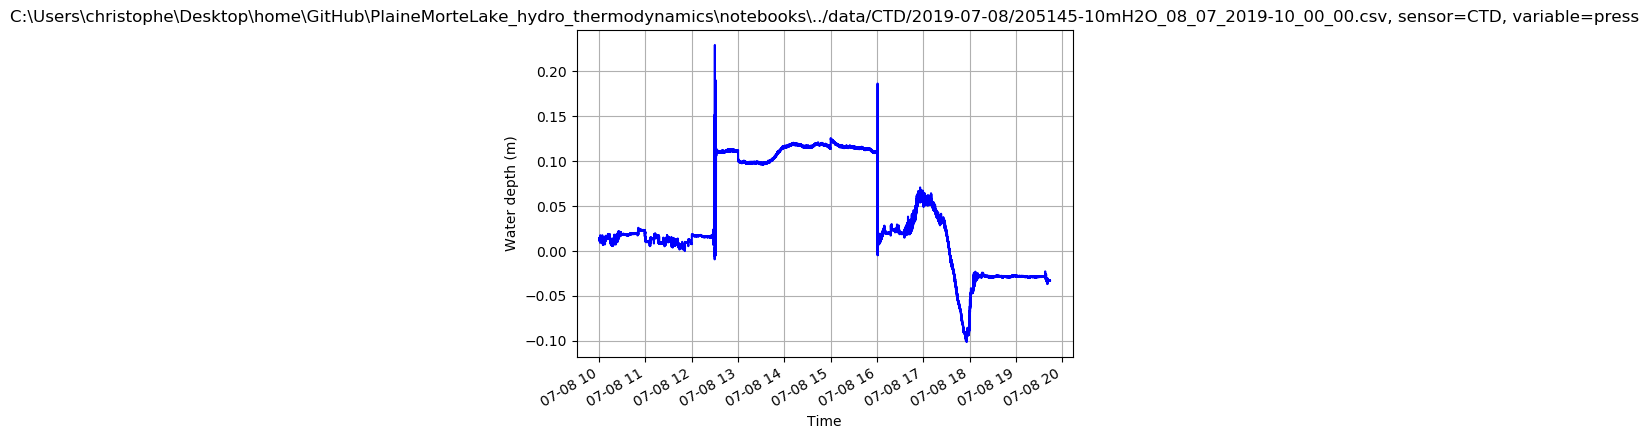

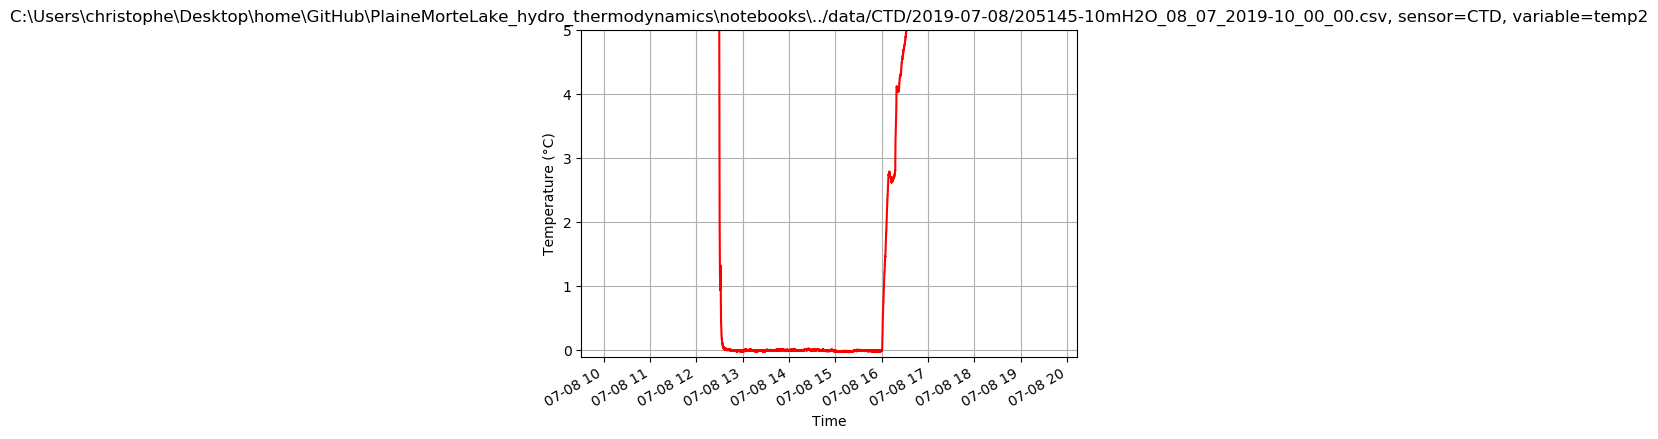

In [42]:
i=1
pygui(false)
plotit(path_CTD*filename_P3[i], :CTD, :press)
plotit(path_CTD*filename_P3[i], :CTD, :temp2)


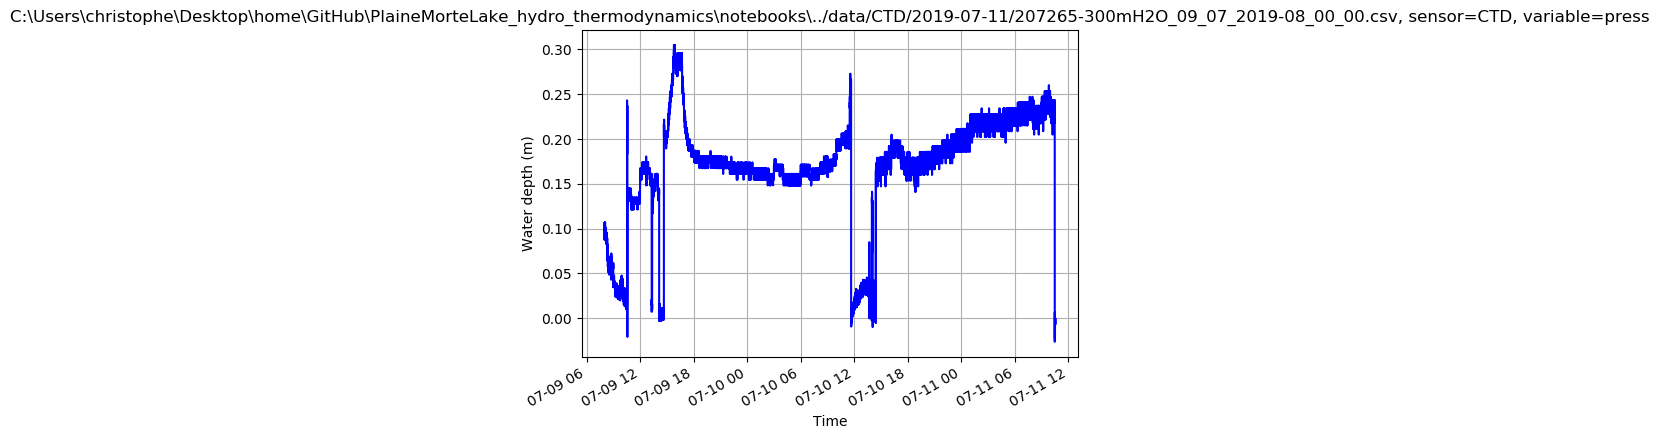

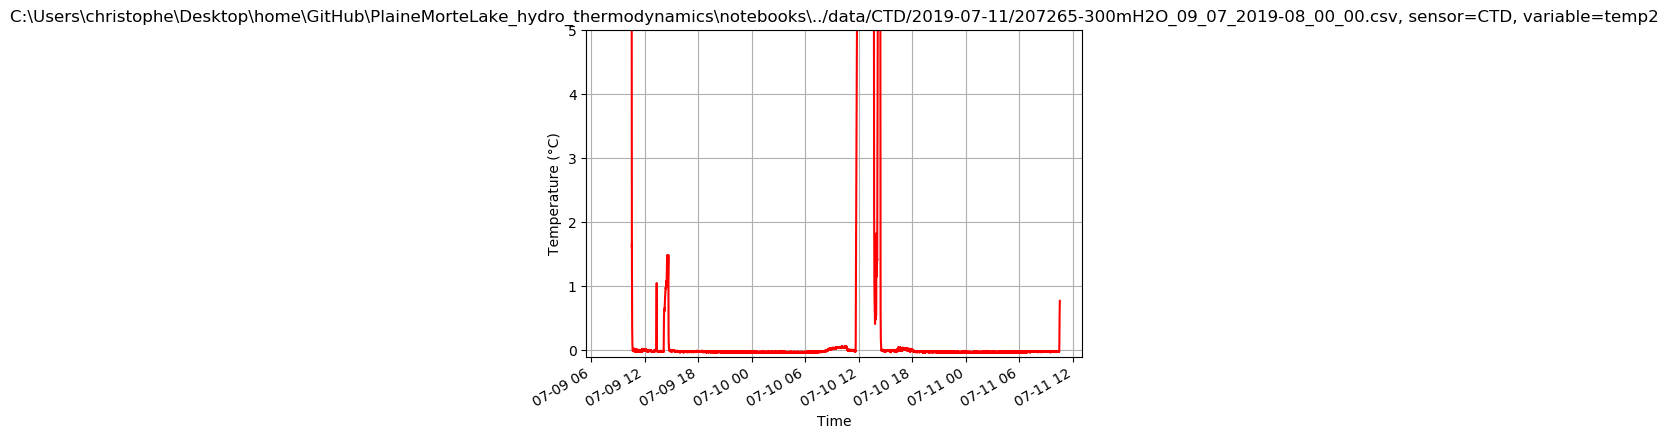

In [43]:
i=2
    plotit(path_CTD*filename_P3[i], :CTD, :press)
plotit(path_CTD*filename_P3[i], :CTD, :temp2)


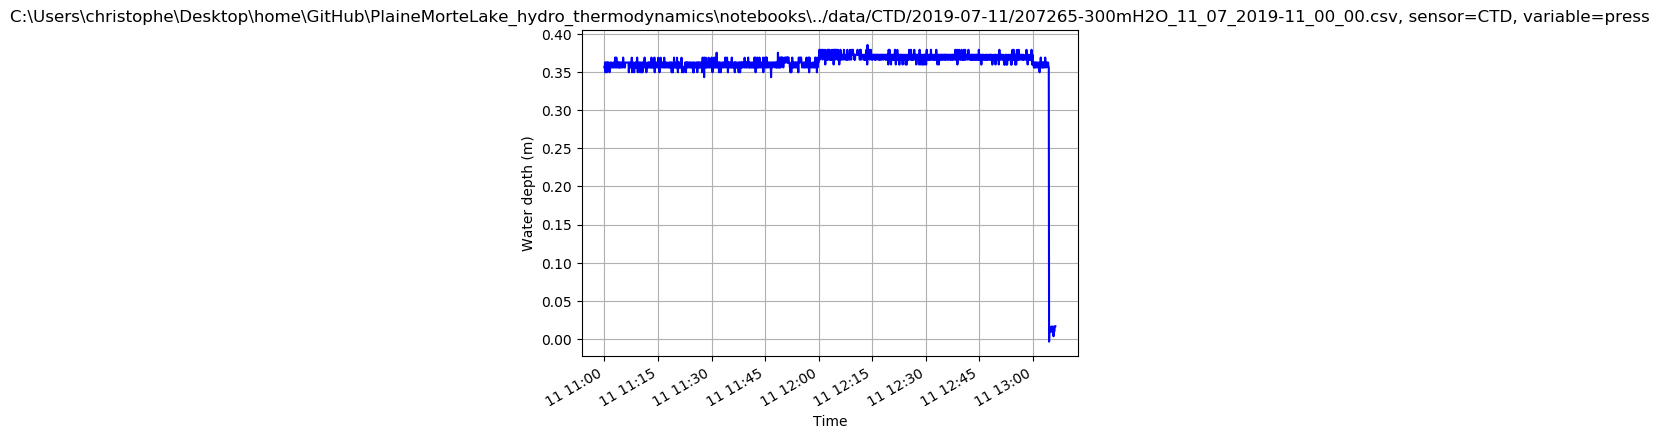

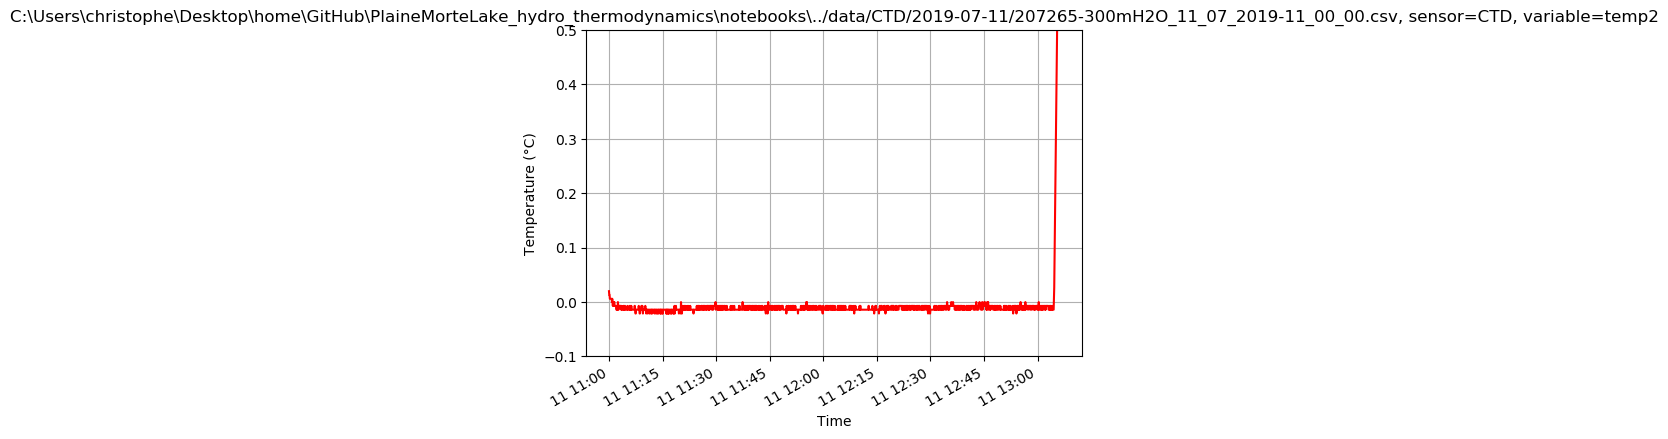

(-0.1, 0.5)

In [44]:
i=3
    plotit(path_CTD*filename_P3[i], :CTD, :press)
plotit(path_CTD*filename_P3[i], :CTD, :temp2)
ylim(-0.1,0.5)


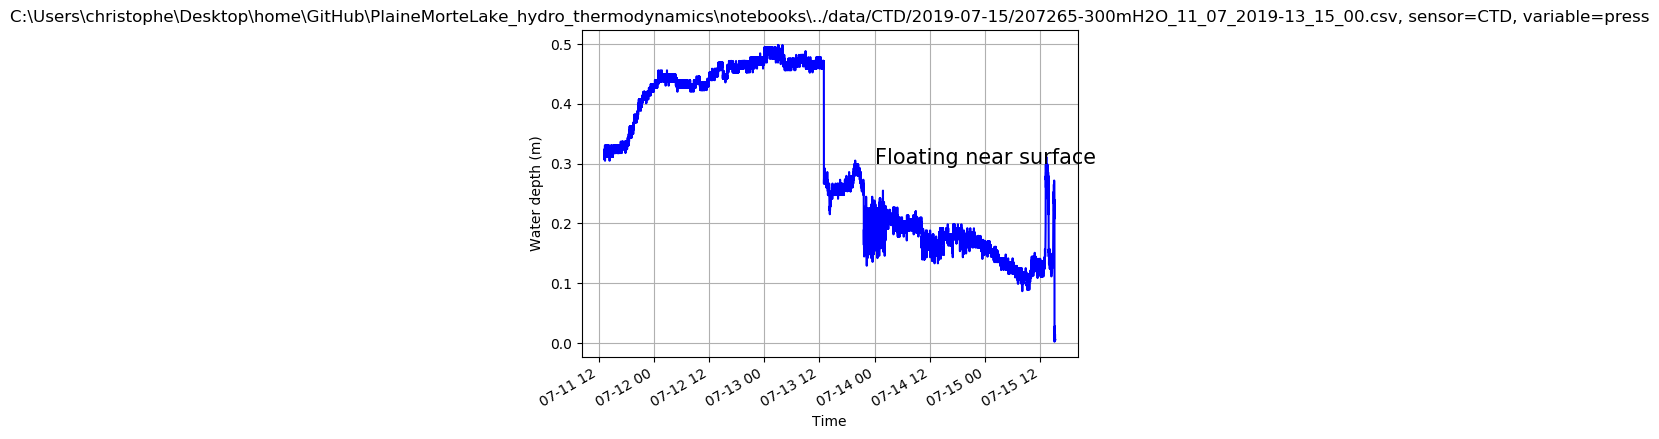

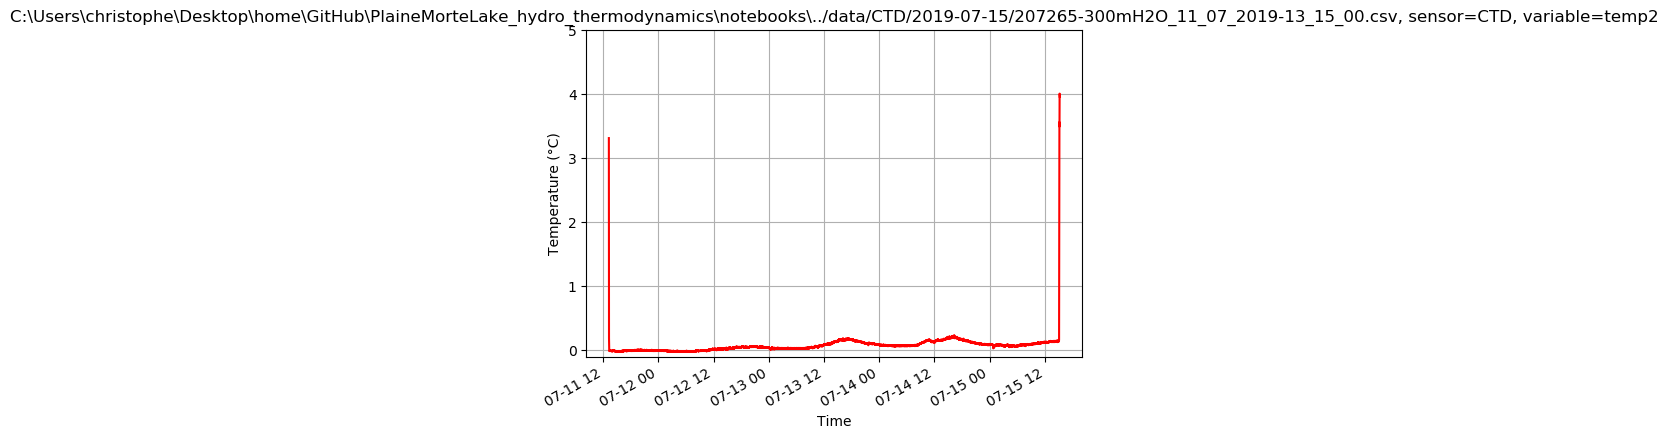

In [45]:
i=4
    plotit(path_CTD*filename_P3[i], :CTD, :press)
text(Date(2019,7,14),0.3,"Floating near surface", fontsize=15)
plotit(path_CTD*filename_P3[i], :CTD, :temp2)


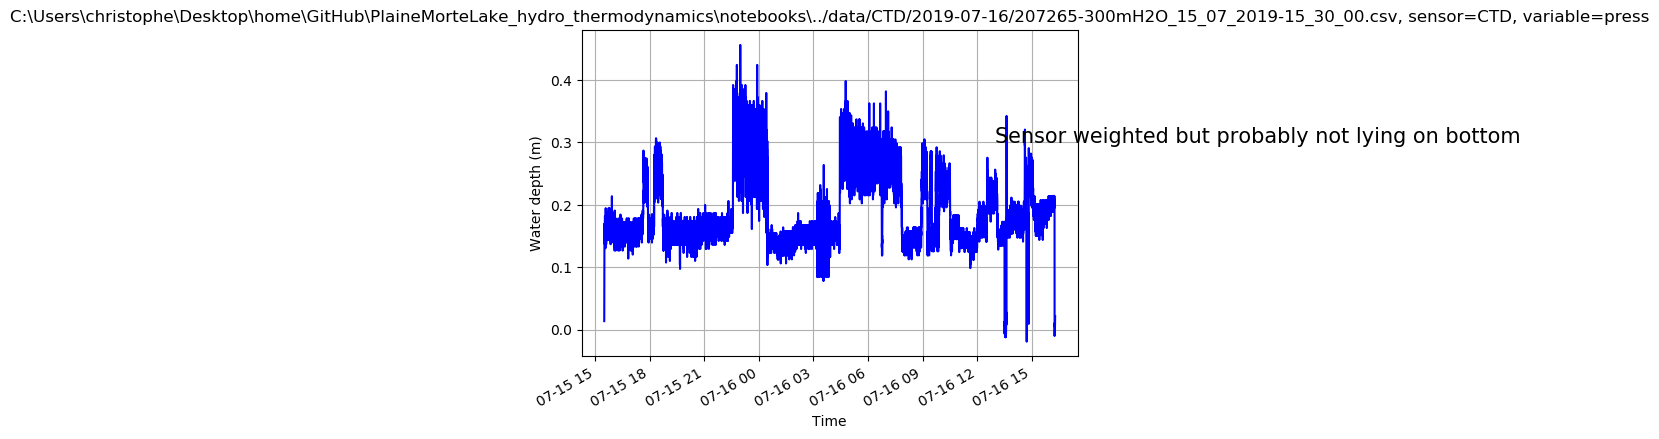

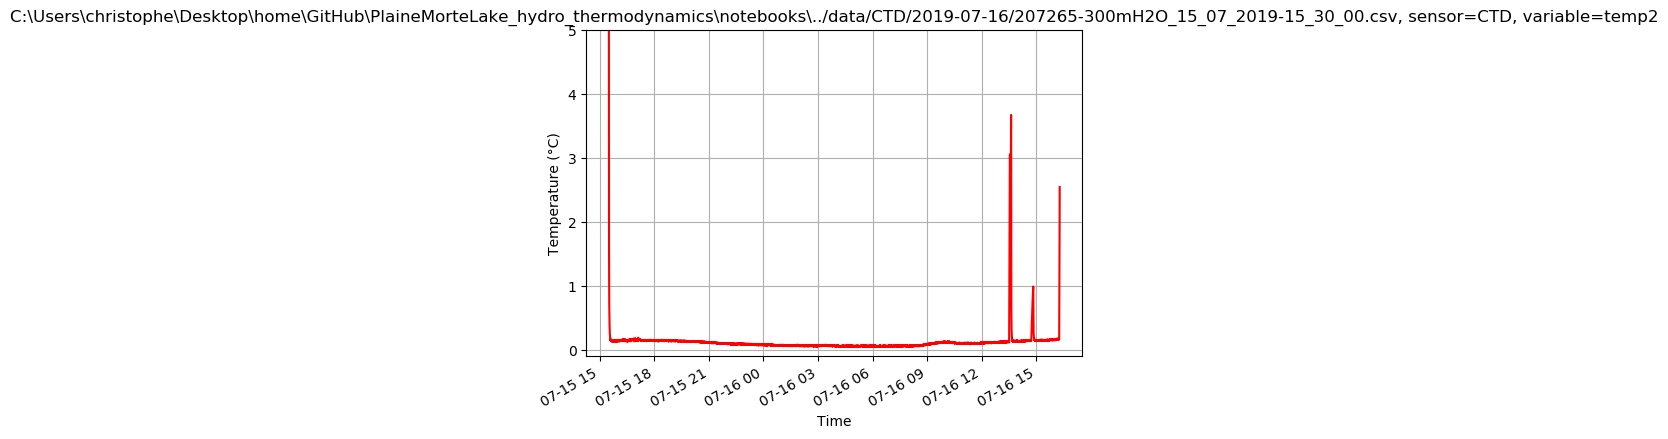

In [46]:
i=5
    plotit(path_CTD*filename_P3[i], :CTD, :press)
text(DateTime(2019,7,16,13),0.3,"Sensor weighted but probably not lying on bottom", fontsize=15)
plotit(path_CTD*filename_P3[i], :CTD, :temp2)

 

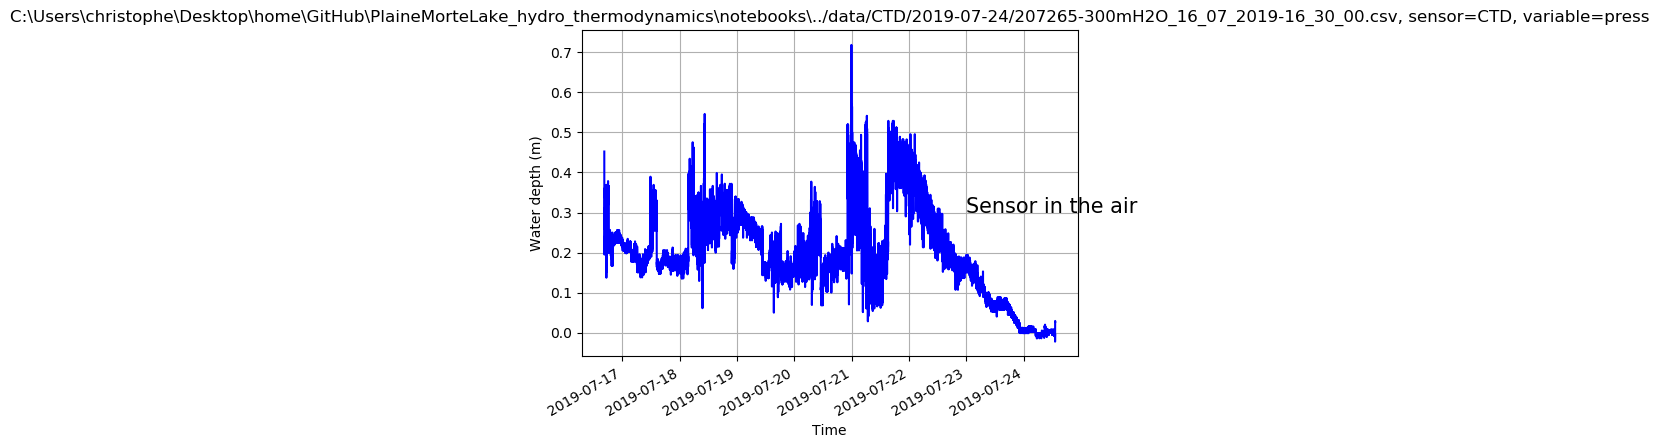

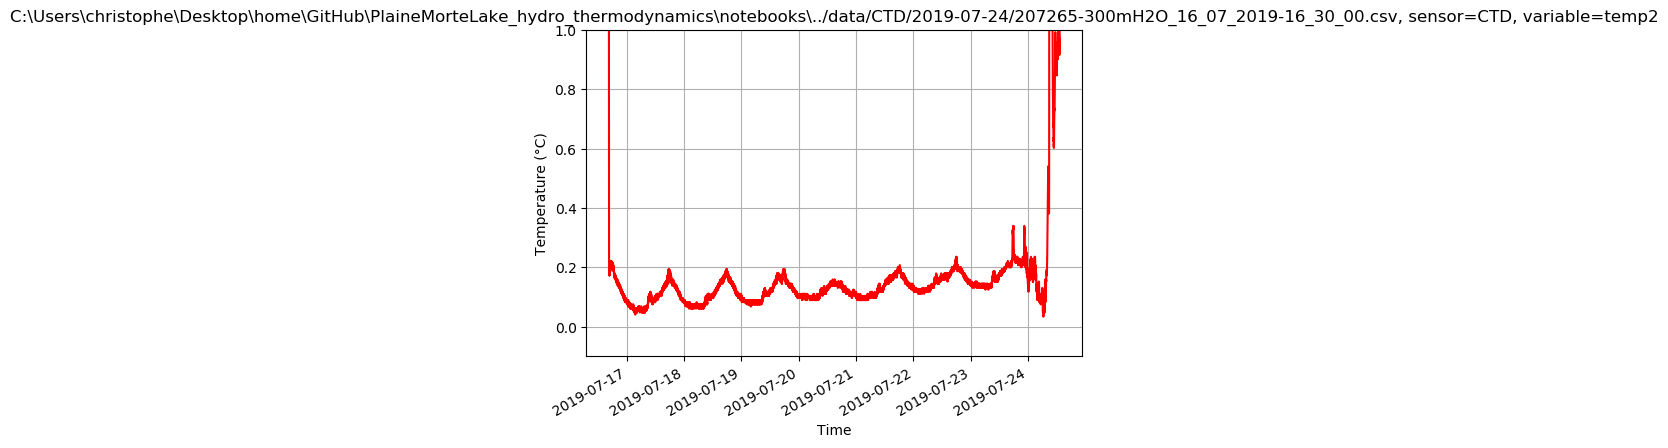

(-0.1, 1)

In [47]:
i=6
    plotit(path_CTD*filename_P3[i], :CTD, :press)
text(DateTime(2019,7,23),0.3,"Sensor in the air", fontsize=15)
plotit(path_CTD*filename_P3[i], :CTD, :temp2)
ylim(-0.1,1)
 

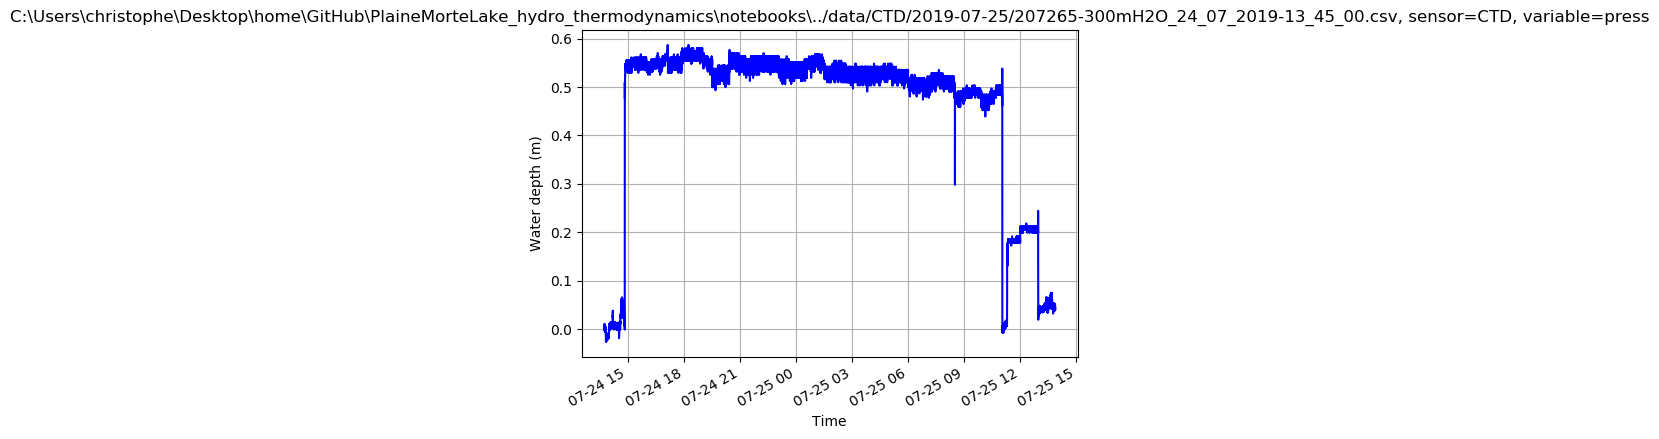

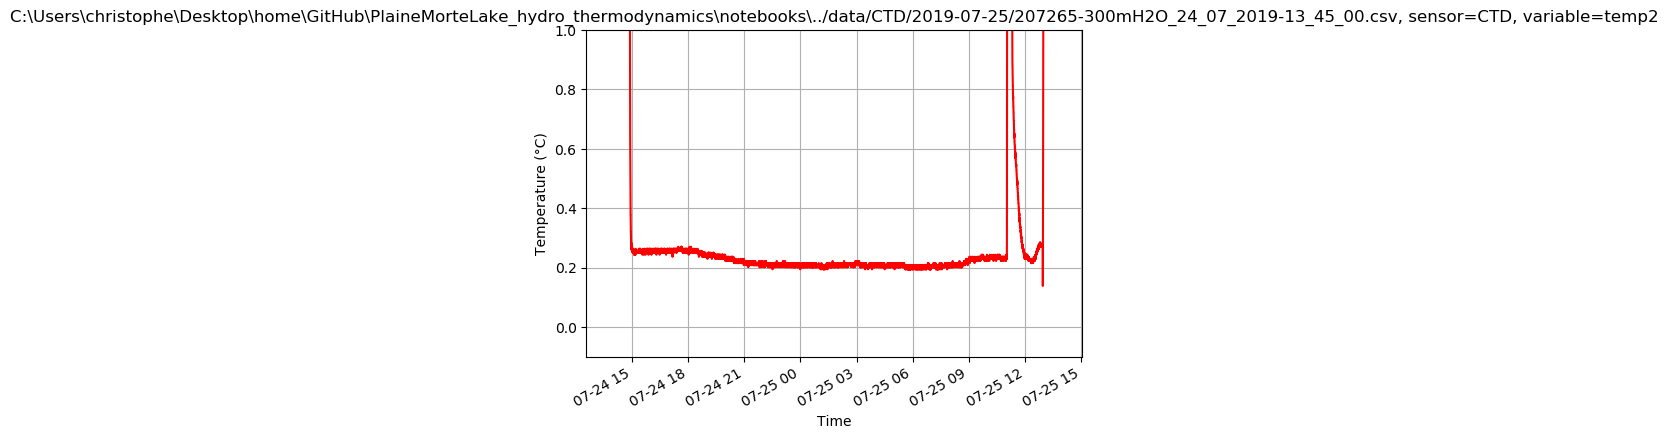

(-0.1, 1)

In [48]:
i=7
    plotit(path_CTD*filename_P3[i], :CTD, :press)
plotit(path_CTD*filename_P3[i], :CTD, :temp2)
ylim(-0.1,1)
 

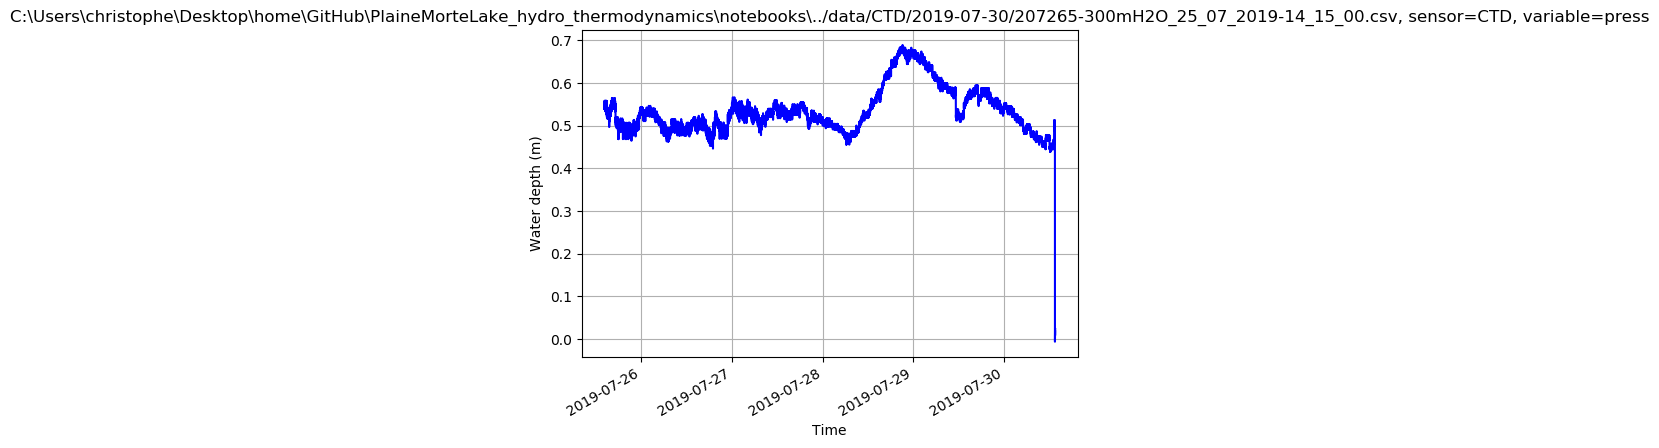

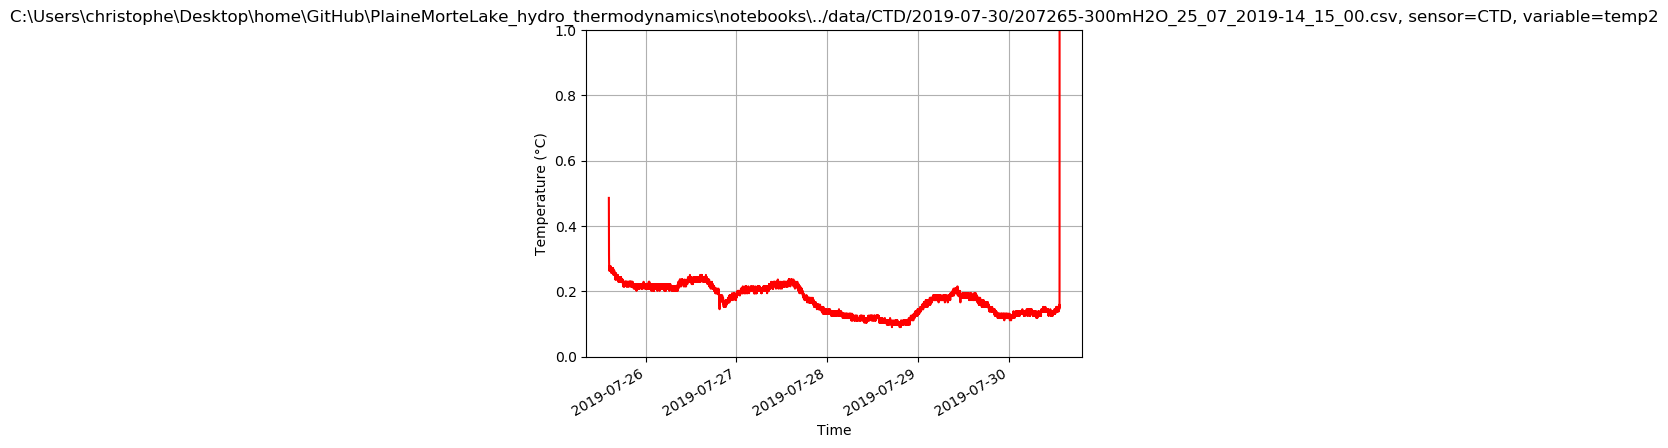

(0, 1)

In [49]:
i=8
    plotit(path_CTD*filename_P3[i], :CTD, :press)
plotit(path_CTD*filename_P3[i], :CTD, :temp2)
ylim(0,1)


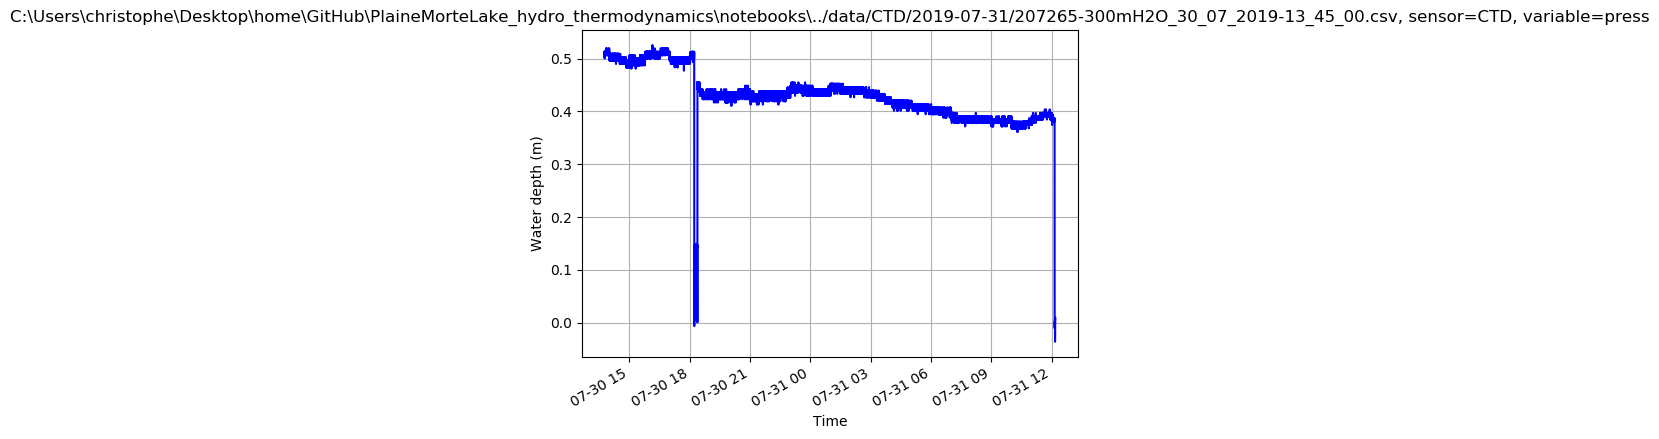

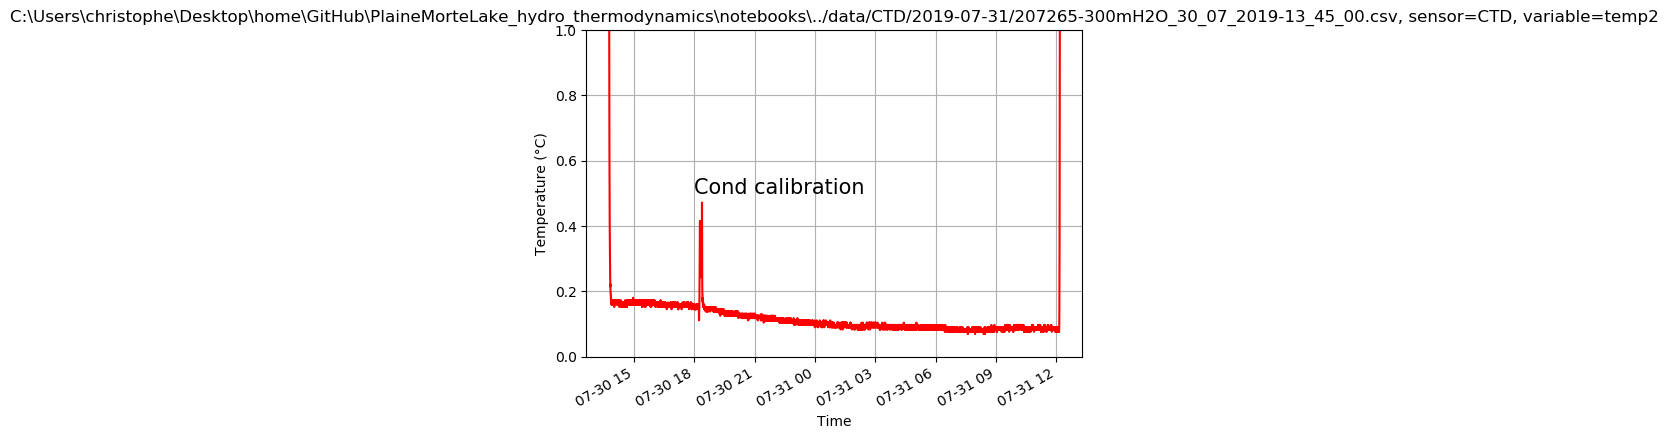

PyObject Text(2019-07-30 18:00:00, 0.5, 'Cond calibration')

In [50]:
i=9
    plotit(path_CTD*filename_P3[i], :CTD, :press)
plotit(path_CTD*filename_P3[i], :CTD, :temp2)
ylim(0,1)
text(DateTime(2019,7,30,18),0.5,"Cond calibration", fontsize=15)
 

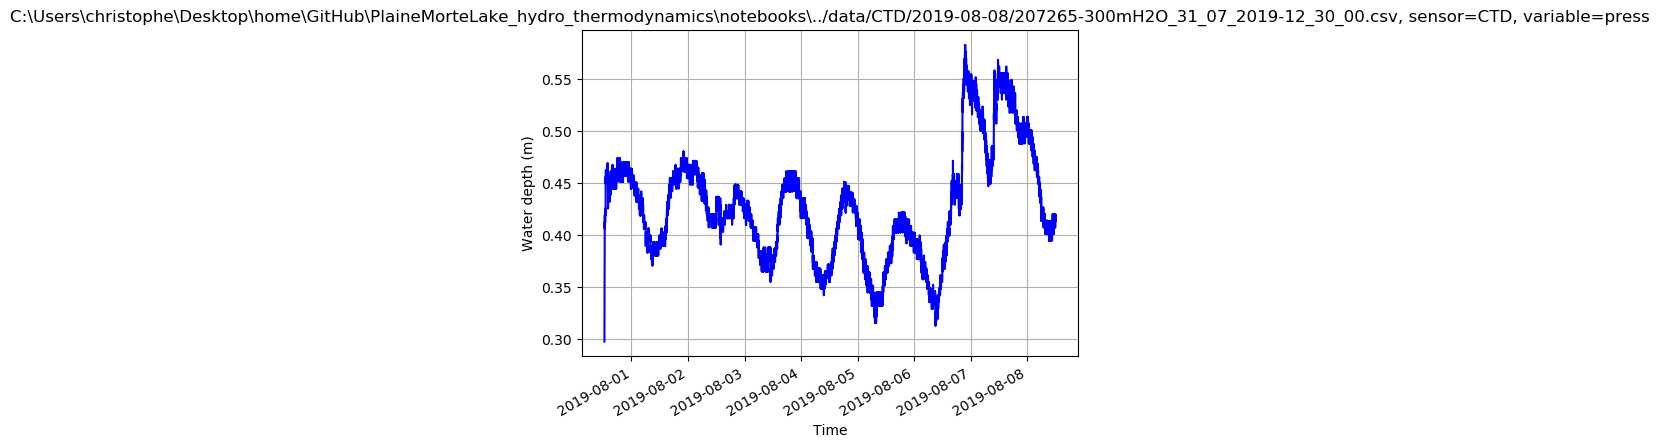

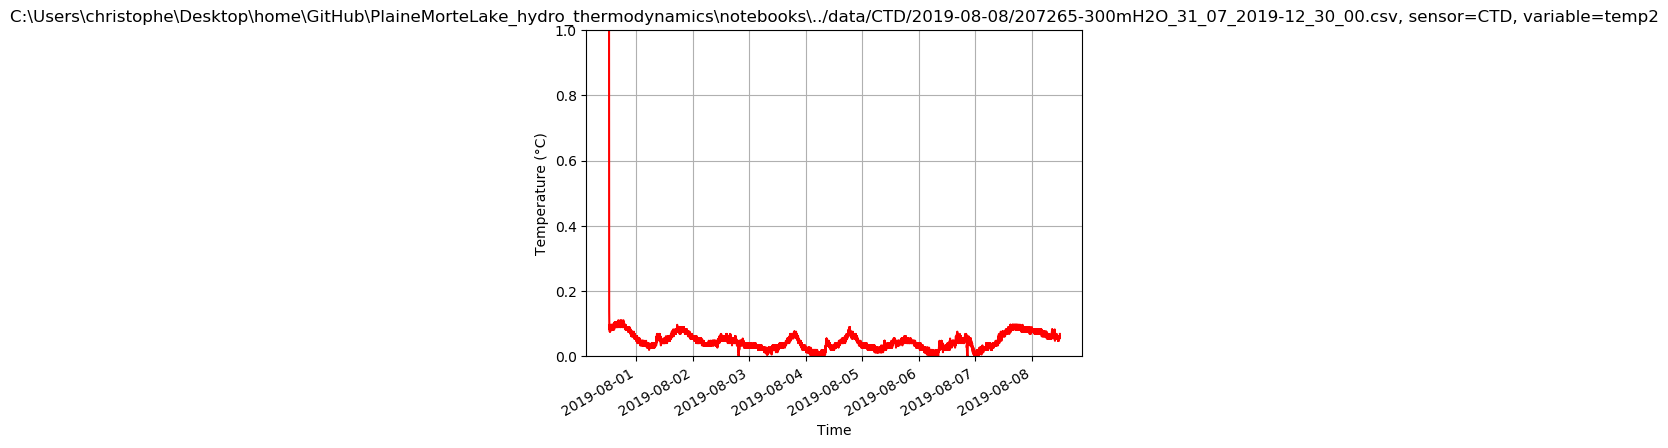

(0, 1)

In [51]:
i=10
    plotit(path_CTD*filename_P3[i], :CTD, :press)
   plotit(path_CTD*filename_P3[i], :CTD, :temp2)
ylim(0,1)


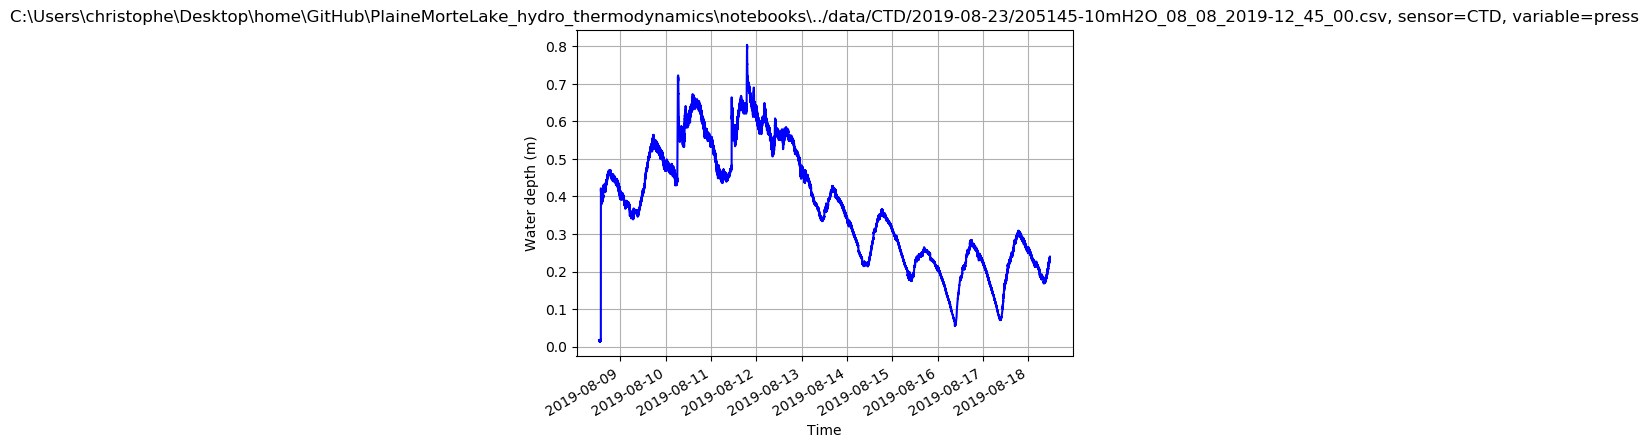

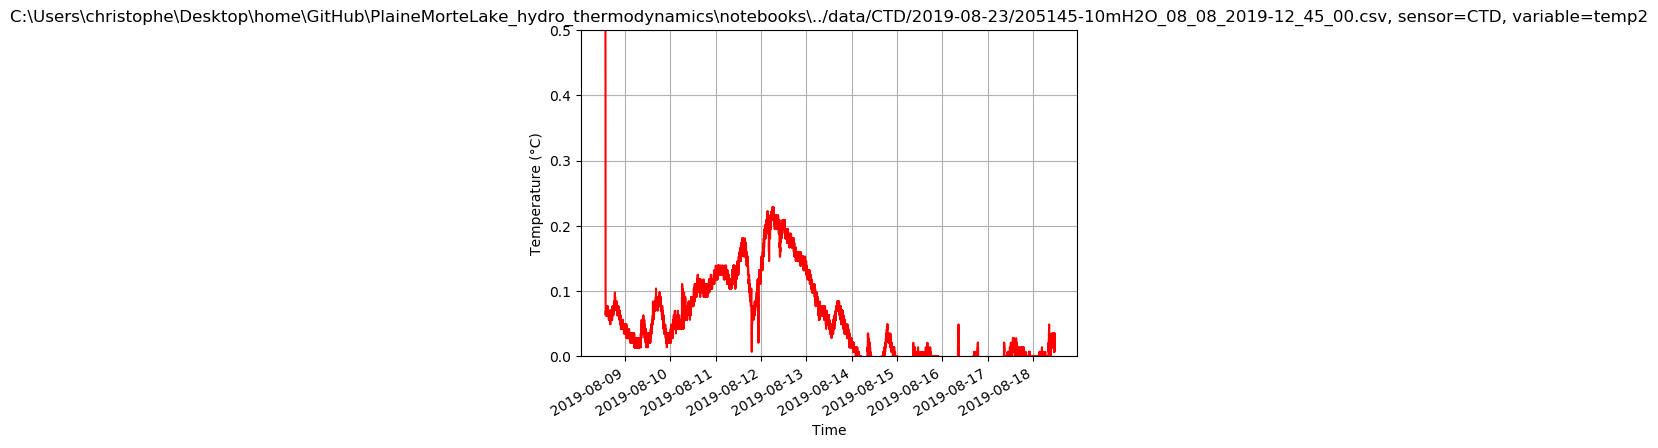

(0, 0.5)

In [52]:
i=11
    plotit(path_CTD*filename_P3[i], :CTD, :press)
plotit(path_CTD*filename_P3[i], :CTD, :temp2)
ylim(0,0.5)
  

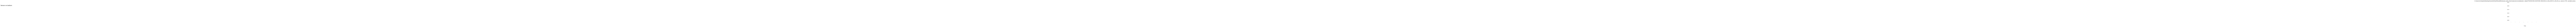

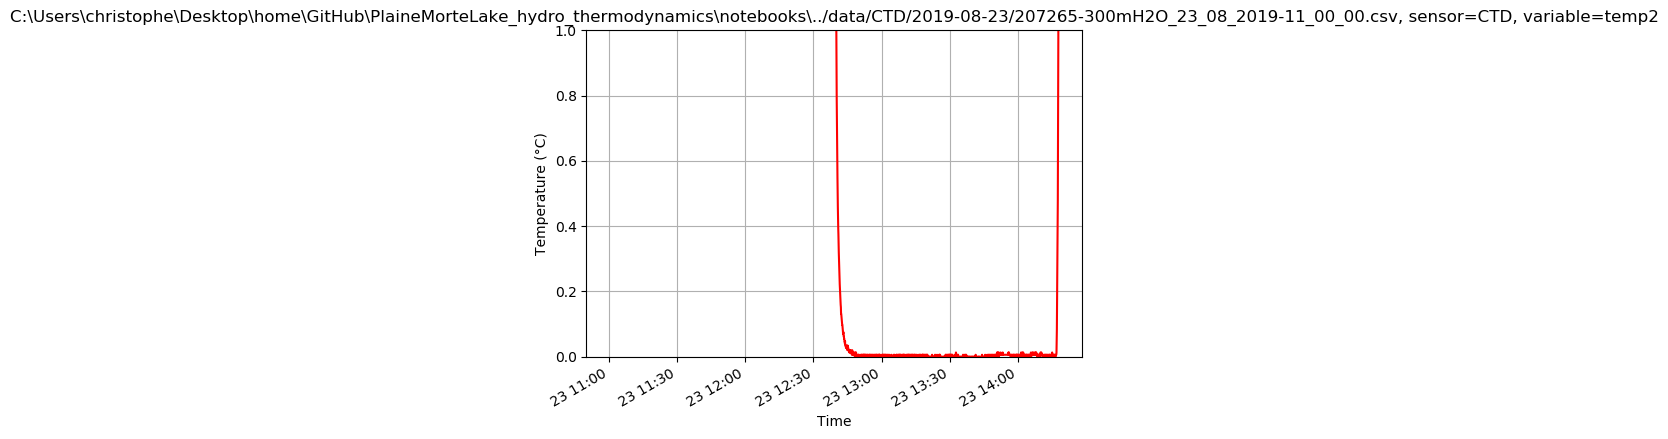

(0, 1)

In [53]:
i=12
    plotit(path_CTD*filename_P3[i], :CTD, :press)
text(DateTime(2019,8,11),0.2,"Sensor on bottom", fontsize=15)
plotit(path_CTD*filename_P3[i], :CTD, :temp2)
ylim(0,1)
 

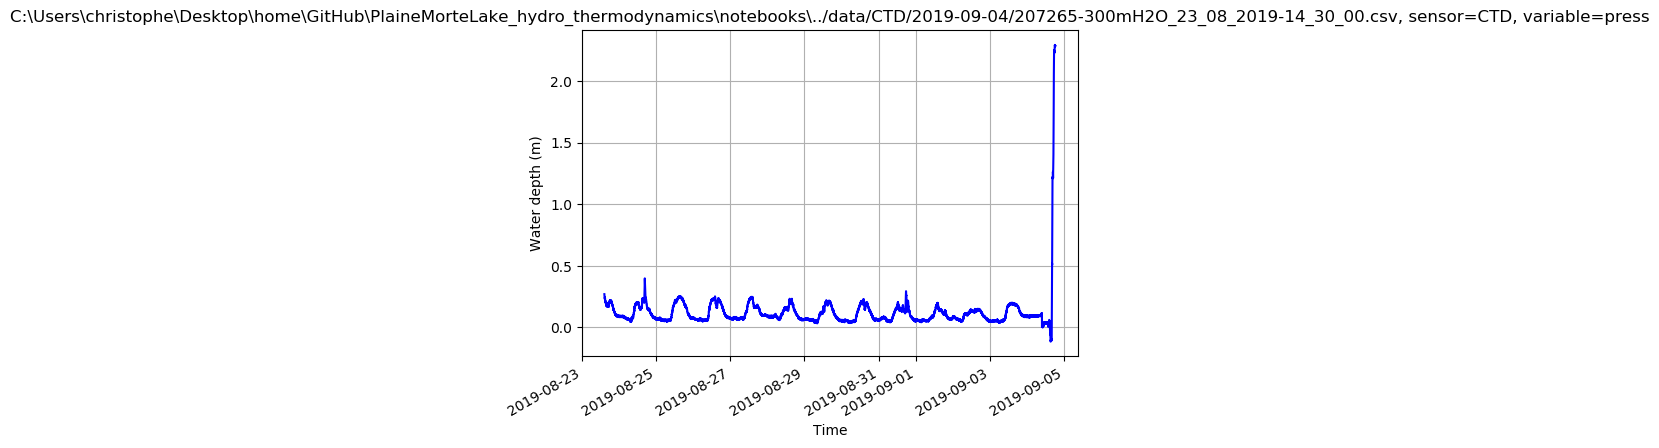

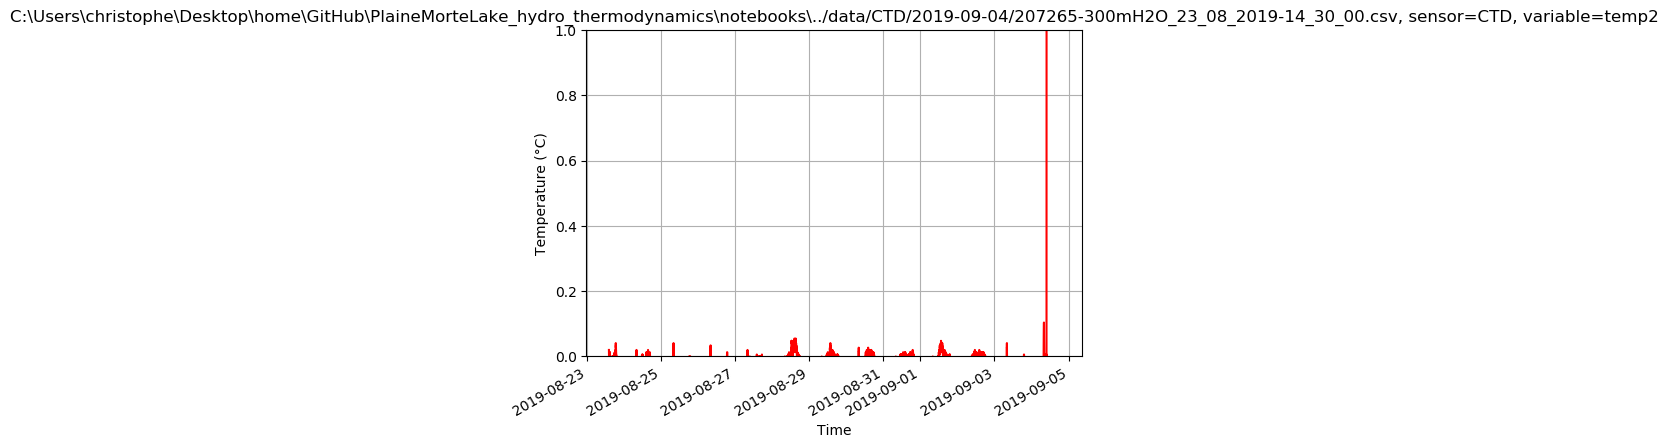

(0, 1)

In [54]:
i=13
    plotit(path_CTD*filename_P3[i], :CTD, :press)
plotit(path_CTD*filename_P3[i], :CTD, :temp2)
ylim(0,1)
 

## Reconstructed temperature and water stage at P3

### Water stage field measurements 

In [55]:
#Validation Points from field measurements
x3=[DateTime(2019,7,8,12,30),DateTime(2019,7,8,14,40),DateTime(2019,7,9,14,35),
    DateTime(2019,7,10,14,5),DateTime(2019,7,11,10,10),DateTime(2019,7,11,12,35), DateTime(2019,7,16,13,17),DateTime(2019,7,25,9,48),
    DateTime(2019,7,30,13,20),DateTime(2019,8,8,12),DateTime(2019,8,14,9,45),DateTime(2019,8,23,12,46),DateTime(2019,9,4,9,54)]
y3=[0.09,0.08,0.18,0.23,0.23,0.3,0.35,0.55,0.5,0.4,0.3,0.33,0.1];
yerr3=[0.05,0.05,0.05,0.05,0.05,0.05,0.1,0.05,0.05,0.05,0.05,0.1,0.05];

### To gather and plot Temperature and Pressure time series at P3

In [56]:
press3=[]
temp3=[]
t3=[]
for i in 2:length(filename_P3)  #8th july not interesting
    local d = read_Keller_DCX22_CTD(path_CTD*filename_P3[i]);
    local ds = smooth_d(d)
    append!(press3,ds[:press]);
    append!(t3,d[:t]);
    append!(temp3,ds[:temp2]);
end

### Automatically and manually deletion values when sensors was out of water (Temperature  >-0.05°C and < 0.35°C)

In [57]:
#Delete values when sensors was out of water
purge=[]

for i in 51:length(t3)-50
    
    if temp3[i] > 0.35 || temp3[i] < -0.05  #treschold for air temperature detection
        append!(purge,collect(i-50:i+50))
    end
    
end

purge=sort(unique(purge))
[press3[i] = NaN for i = purge]
[temp3[i] = NaN for i = purge];

#Delete manually

indice = vcat(37848:37946,87563:90000,106032:106824,125045:125250);
[press3[i] = NaN for i = indice]
[temp3[i] = NaN for i = indice];

### More stage data cleaning manually (when sensor was not on bottom of cannal)

In [58]:
# Delete valueswhen sensor was not lying on the ground (manual)

period = [DateTime(2019,7,11,11) DateTime(2019,7,11,13,5)
        DateTime(2019,7,13,12) DateTime(2019,7,24,8)
        DateTime(2019,7,25,11,30) DateTime(2019,7,25,13)
    DateTime(2019,7,30,13,1)  DateTime(2019,7,30,18,20)]
        

for i in eachindex(t3)
    for j in 1:3  #3 first periods
        if t3[i] > period[j,1] && t3[i] < period[j,2]
        press3[i] = NaN
        end
    end
end

# The 30th between 13. and 18:, water height is over estimated. It matters because it is during salt dilution,
#so it is relevant data for stage/discharge relationship. We then correct this by a shift of 7 cm
for i in eachindex(t3)  #4 periods
        if t3[i] > period[4,1] && t3[i] < period[4,2]
        press3[i] = press3[i] - 0.05  #7 cm
        end
end


#Manual

[press3[i] = NaN for i = collect(21620:21650)];
[press3[i] = NaN for i = collect(54800:55000)];
[press3[i] = NaN for i = collect(72900:72952)];



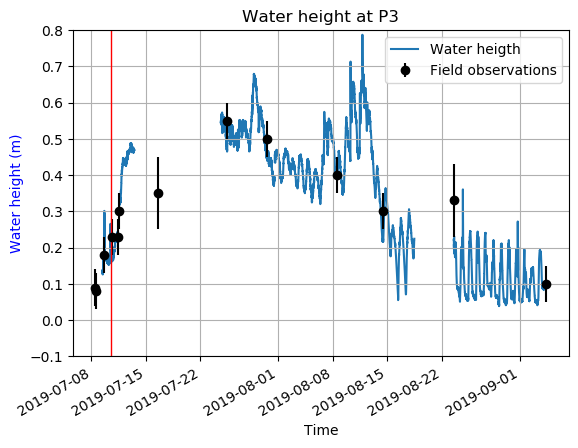

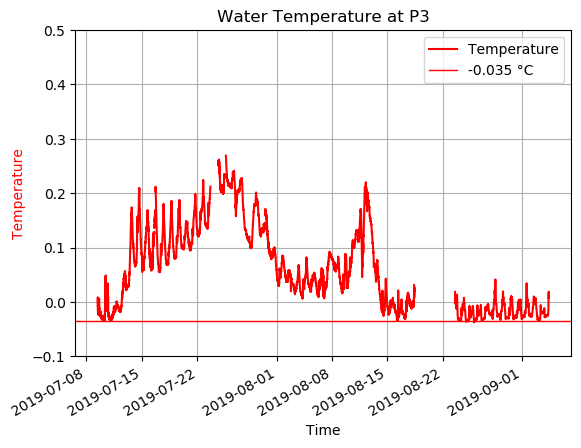

PyObject <matplotlib.legend.Legend object at 0x000000005D532E80>

In [59]:
pygui(false)
#Pressure
fig=figure()
plot(t3,press3,linestyle="-",label="Water heigth",zorder=-1)
fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right")
ylim(-0.1,0.8)
title("Water height at P3")
xlabel("Time")
ylabel("Water height (m)",color="blue")
errorbar(x3,y3,yerr3,linestyle="",marker="o",color="black",label="Field observations")
axvline(x=DateTime(2019,7,10,12),linewidth=1,color="r")
legend()
grid(true)

#temperature
fig=figure()
plot(t3,temp3,color="red",linestyle="-",label="Temperature") 
fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right")
ylim(-0.1,0.5)
title("Water Temperature at P3")
xlabel("Time")
ylabel("Temperature",color="red")

grid(true)

#Temperature correction (manual) (water temperature cannot be negative)
temp_corr_P3 = 0.035
axhline(y = -temp_corr_P3,linewidth=1,color="r", label="-$temp_corr_P3 °C")
legend()

### Up-scale time series

In [60]:
(t3_hour,temp3_hour) = (upscale_timeseries(temp3, t3,"hour")[1],upscale_timeseries(temp3, t3,"hour")[2]);
(t3_daily,temp3_daily) = (upscale_timeseries(temp3, t3,"day")[1],upscale_timeseries(temp3, t3,"day")[2]);
(t3_hour,stage3_hour) = (upscale_timeseries(press3, t3,"hour")[1],upscale_timeseries(press3, t3,"hour")[2]);
(t3_daily,stage3_daily) = (upscale_timeseries(press3, t3,"day")[1],upscale_timeseries(press3, t3,"day")[2]);

### To store (corrected) time series in CSV file

In [61]:
using DataFrames
using CSV

#Temperature in °C (raw, daily + corr, hourly + corr)

df=DataFrame(Date_Time = t3, Temperature = round.(temp3, digits=3) )
CSV.write(path_products*"temp3_corr_raw.csv",df ; dateformat = "yyyy-mm-ddTH:M:S")

df=DataFrame(Date_Time = t3_daily, Temperature_daily = round.(temp3_daily, digits=3) .+ temp_corr_P3)
CSV.write(path_products*"temp3_daily.csv",df ; dateformat = "yyyy-mm-ddTH:M:S")

df=DataFrame(Date_Time = t3_hour, Temperature_hourly = round.(temp3_hour, digits=3) .+ temp_corr_P3)
CSV.write(path_products*"temp3_hour.csv",df ; dateformat = "yyyy-mm-ddTH:M:S");

#Water height (stage) in m

df=DataFrame(Date_Time = t3, Water_height = round.(press3,digits=3))
CSV.write(path_products*"stage3_corr_raw.csv",df ; dateformat = "yyyy-mm-ddTH:M:S")

df=DataFrame(Date_Time = t3_daily, Water_height = round.(stage3_daily, digits = 3) )
CSV.write(path_products*"stage3_daily.csv",df ; dateformat = "yyyy-mm-ddTH:M:S")

df=DataFrame(Date_Time = t3_hour, Temperature_hourly = round.(stage3_hour, digits=3) )
CSV.write(path_products*"stage3_hour.csv",df ; dateformat = "yyyy-mm-ddTH:M:S");


# @P5

In [62]:
filename_P5=Dict();
filename_P5[1]="2019-07-11/205309-100mH2O_09_07_2019-08_00_00-0.csv";
filename_P5[2]="2019-07-15/205309-100mH2O_11_07_2019-10_30_00.csv";
filename_P5[3]="2019-07-16/205309-100mH2O_15_07_2019-16_24_00.csv";
filename_P5[4]="2019-07-24/205309-100mH2O_16_07_2019-16_15_00.csv";
filename_P5[5]="2019-07-25/205309-100mH2O_24_07_2019-13_00_00.csv";
filename_P5[6]="2019-07-30/205309-100mH2O_25_07_2019-14_00_00.csv";
filename_P5[7]="2019-07-31/205309-100mH2O_30_07_2019-14_45_00.csv";
filename_P5[8]="2019-08-08/205309-100mH2O_31_07_2019-13_00_00.csv";
filename_P5[9]="2019-08-23/205309-100mH2O_23_08_2019-11_00_00.csv";
filename_P5[10]="2019-09-04/205309-100mH2O_23_08_2019-14_15_00.csv";



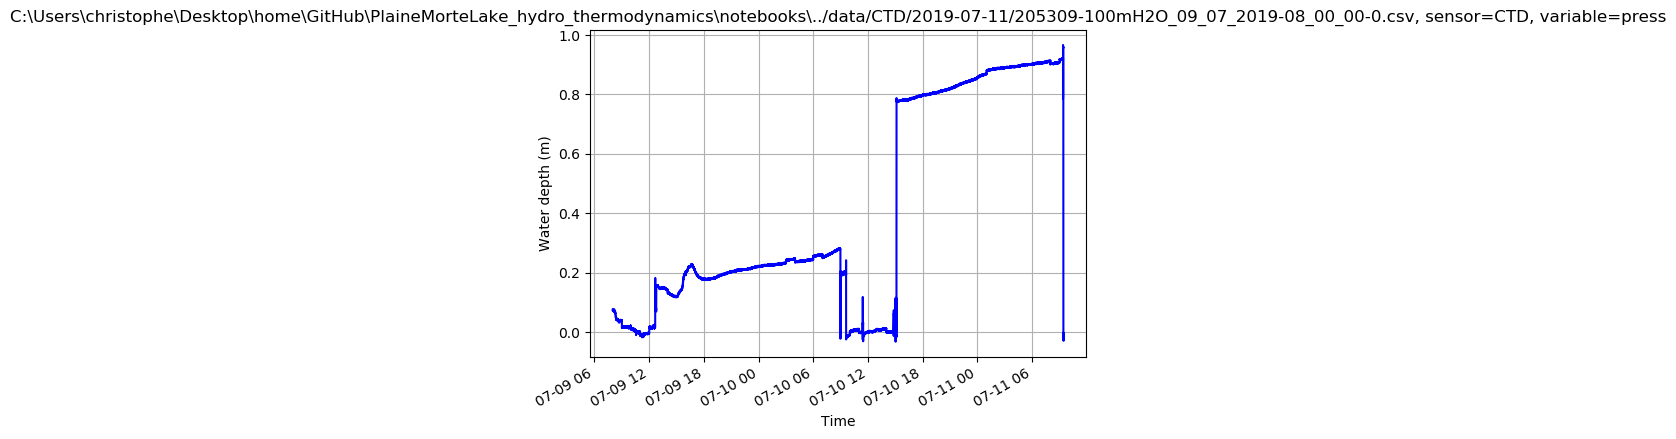

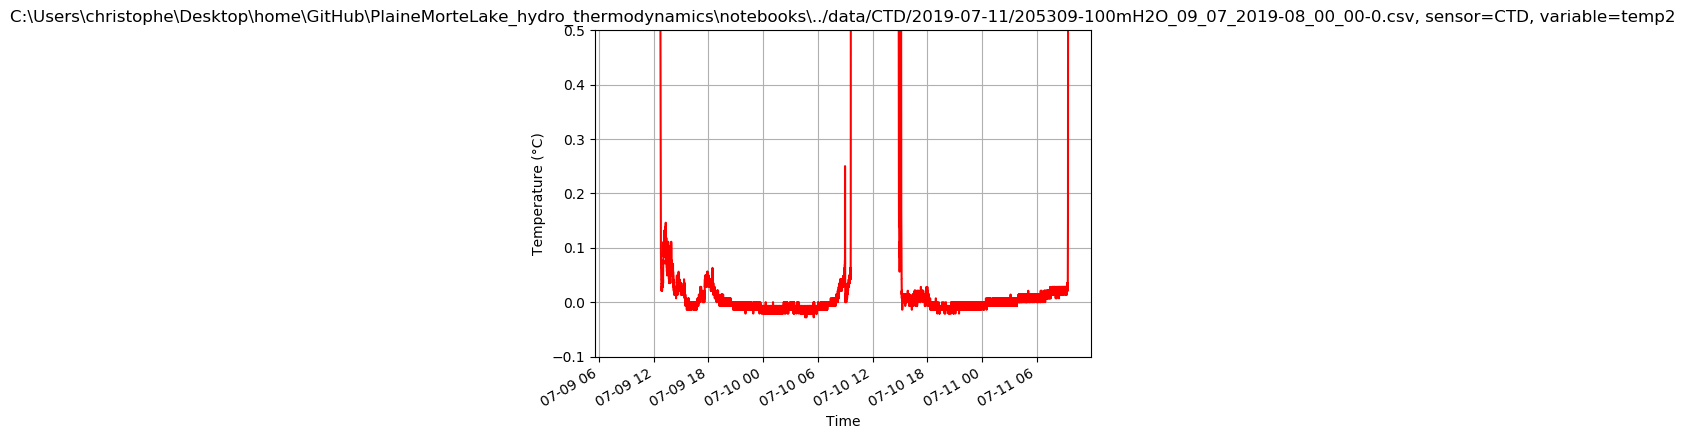

(-0.1, 0.5)

In [63]:
i=1
    plotit(path_CTD*filename_P5[i], :CTD, :press)
plotit(path_CTD*filename_P5[i], :CTD, :temp2)
ylim(-0.1,0.5)
 

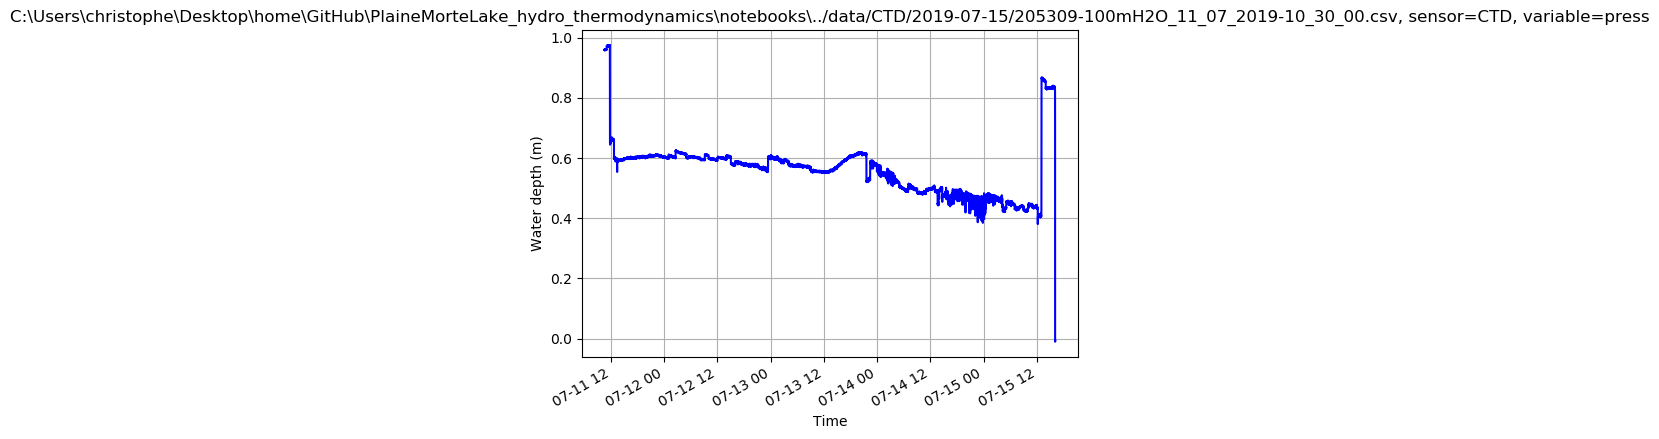

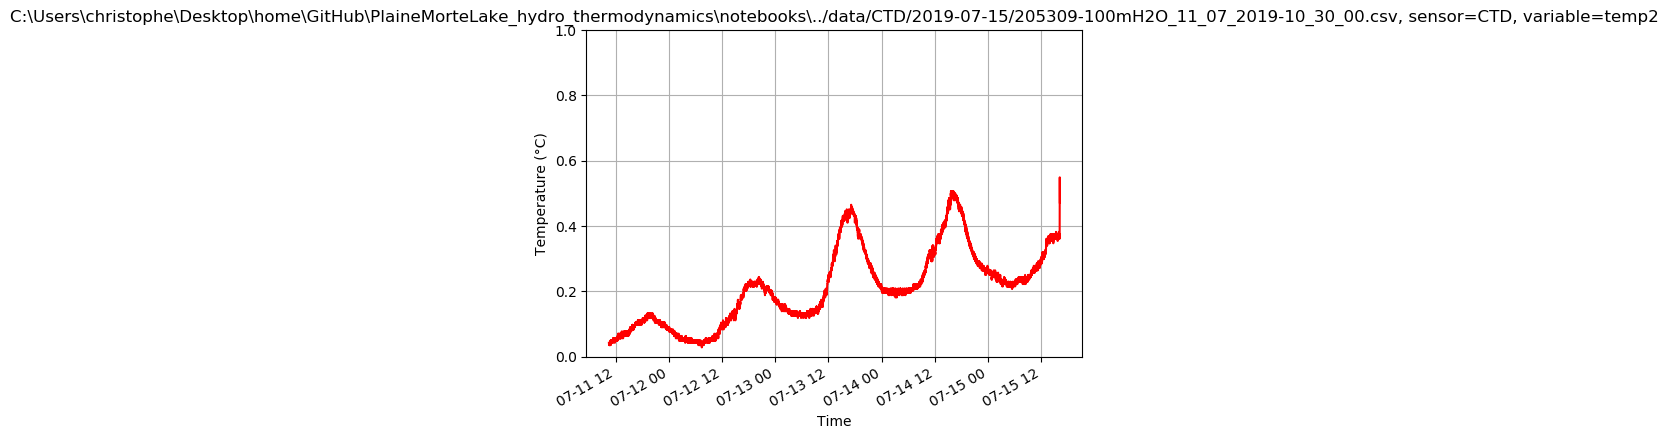

(0, 1)

In [64]:
i=2
    plotit(path_CTD*filename_P5[i], :CTD, :press)
plotit(path_CTD*filename_P5[i], :CTD, :temp2)
ylim(0,1)
 

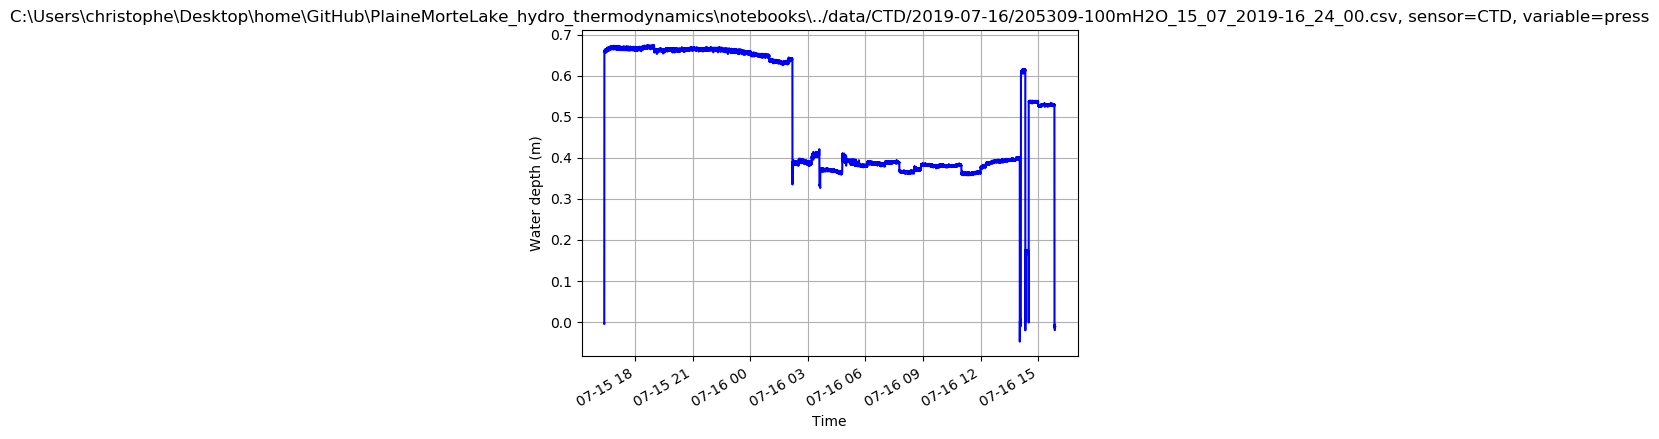

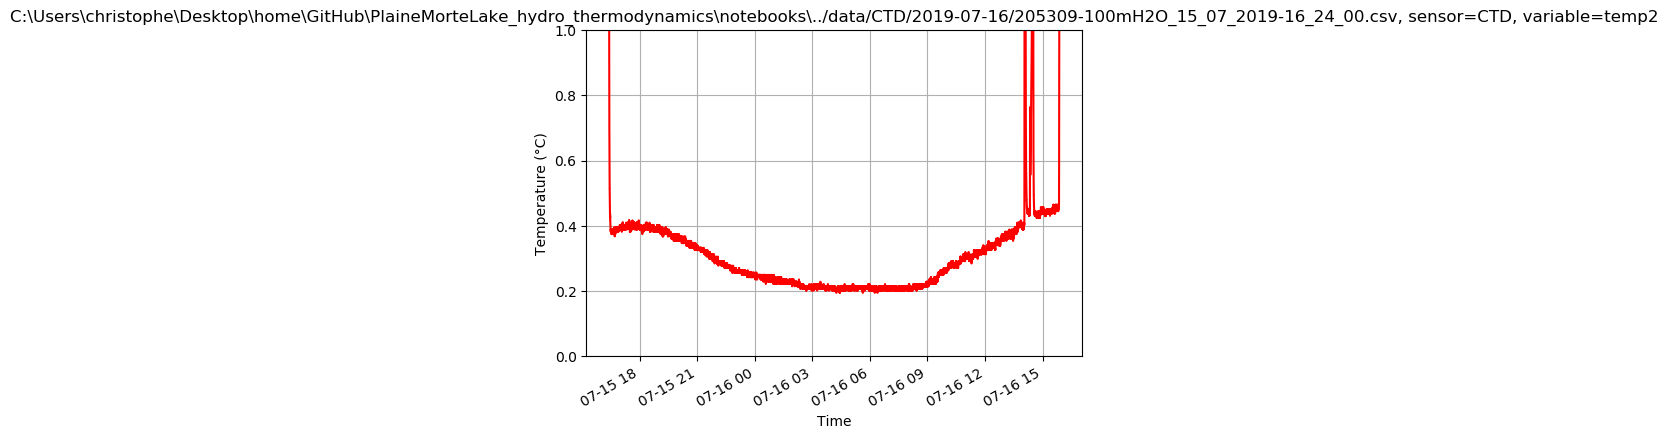

(0, 1)

In [65]:
i=3
    plotit(path_CTD*filename_P5[i], :CTD, :press)
plotit(path_CTD*filename_P5[i], :CTD, :temp2)
ylim(0,1)
 

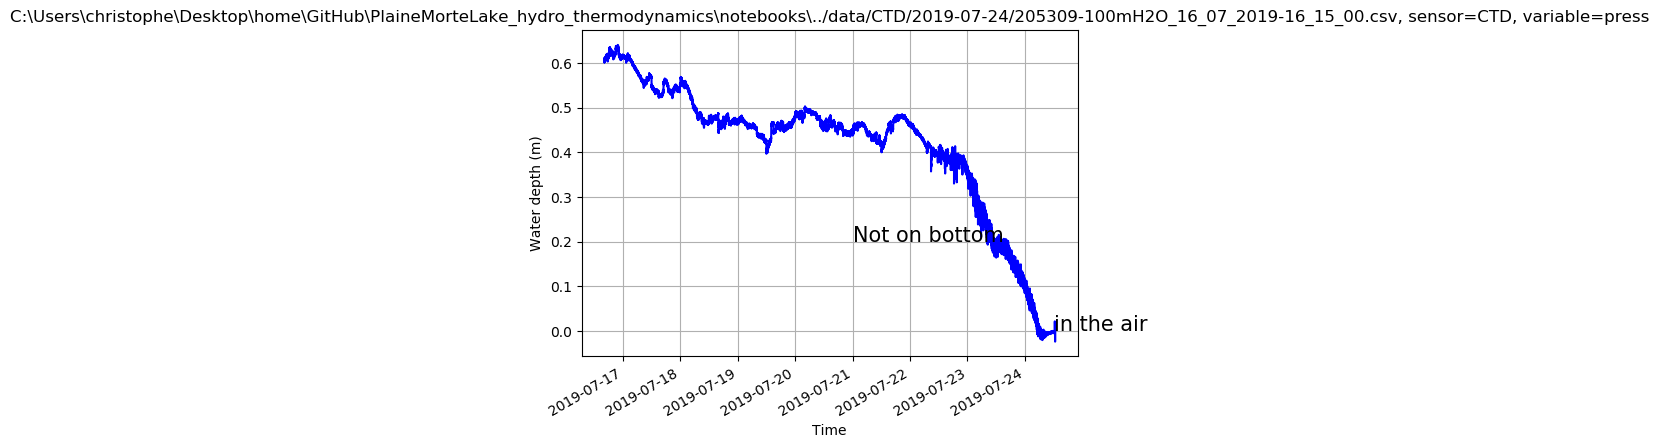

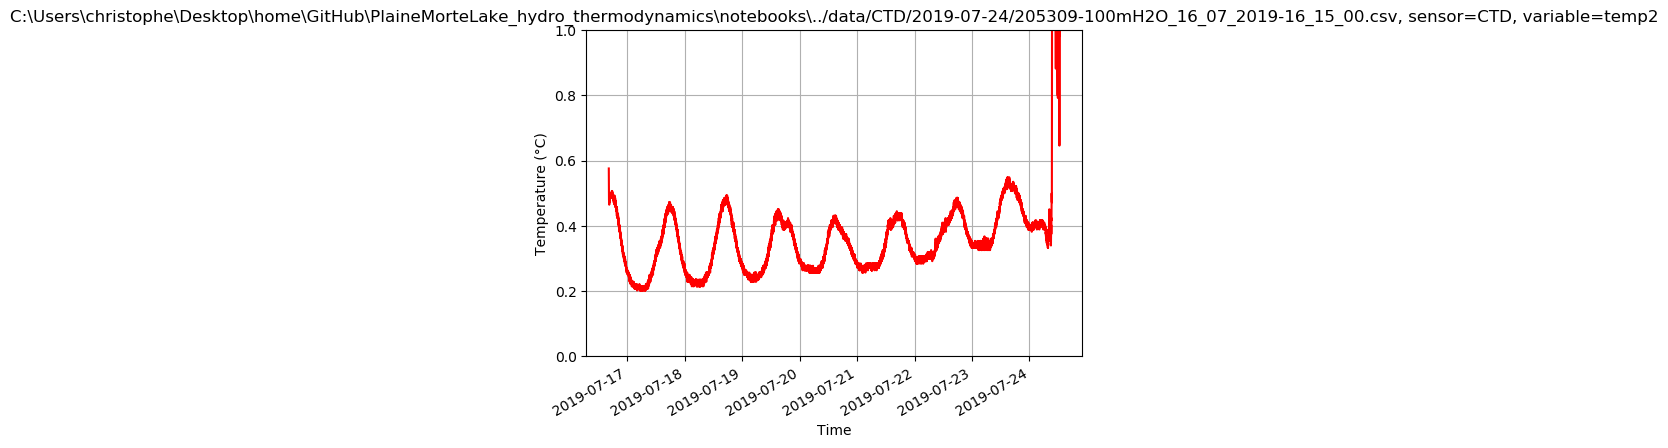

(0, 1)

In [66]:
i=4
    plotit(path_CTD*filename_P5[i], :CTD, :press)
text(Date(2019,7,21),0.2,"Not on bottom",fontsize=15)
text(DateTime(2019,7,24,12),0,"in the air",fontsize=15)
 plotit(path_CTD*filename_P5[i], :CTD, :temp2)
ylim(0,1)
 

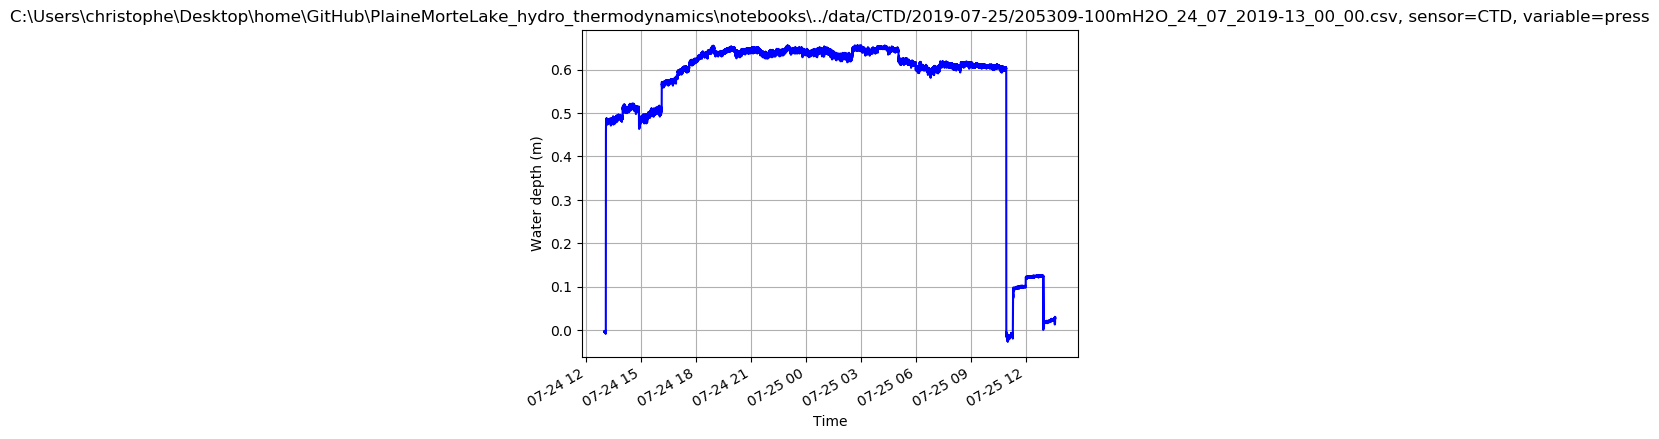

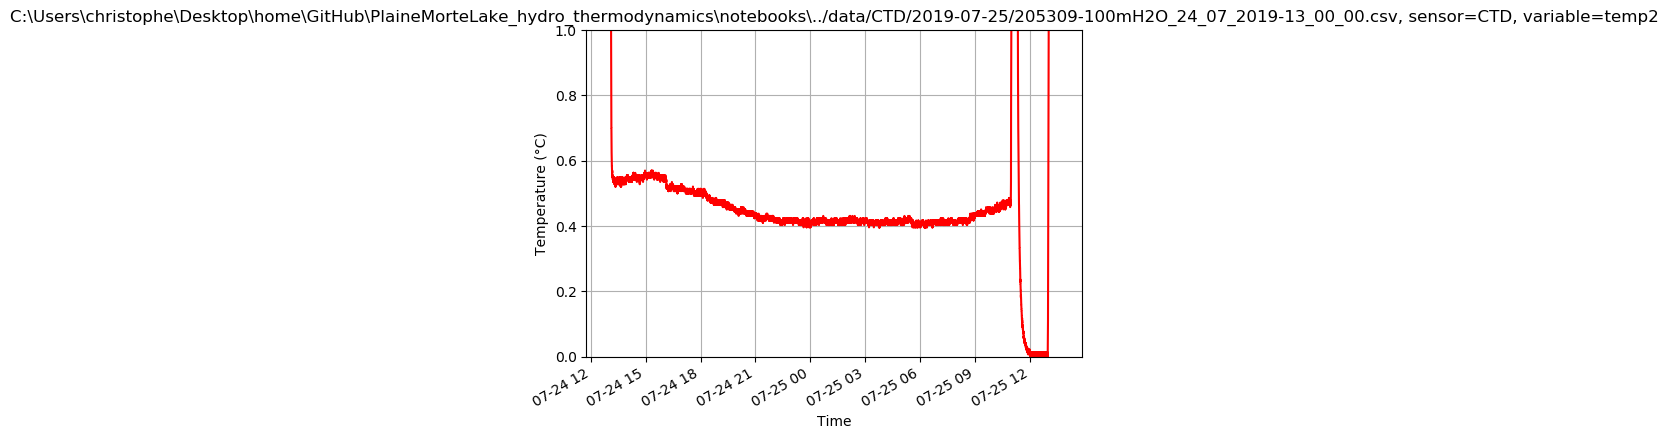

(0, 1)

In [67]:
i=5
    plotit(path_CTD*filename_P5[i], :CTD, :press)
plotit(path_CTD*filename_P5[i], :CTD, :temp2)
ylim(0,1)
  

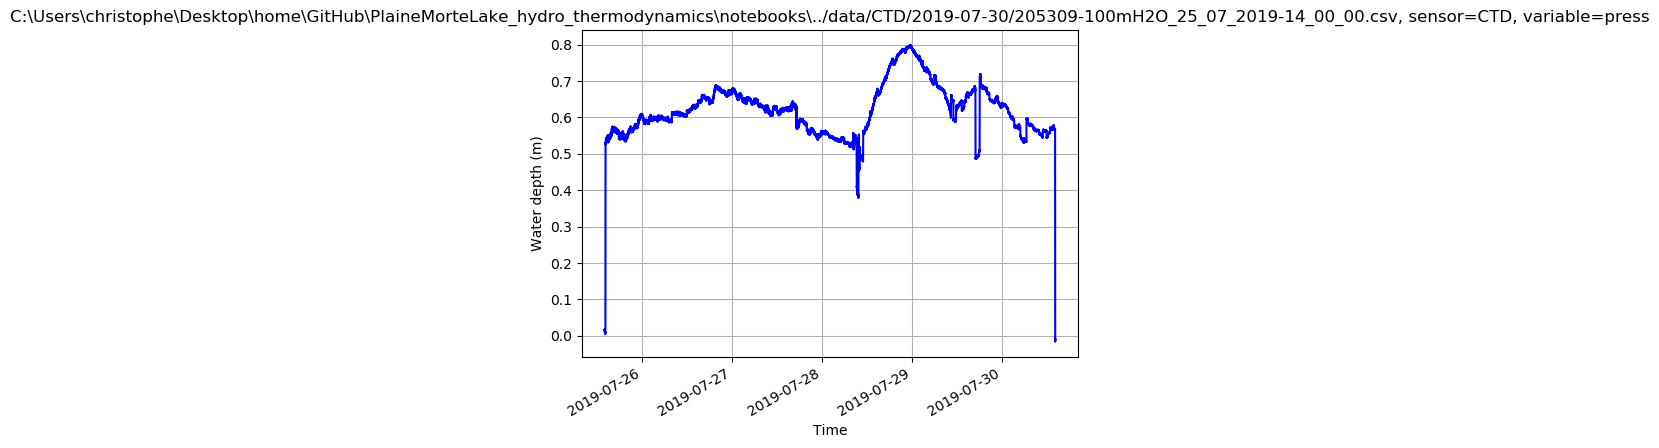

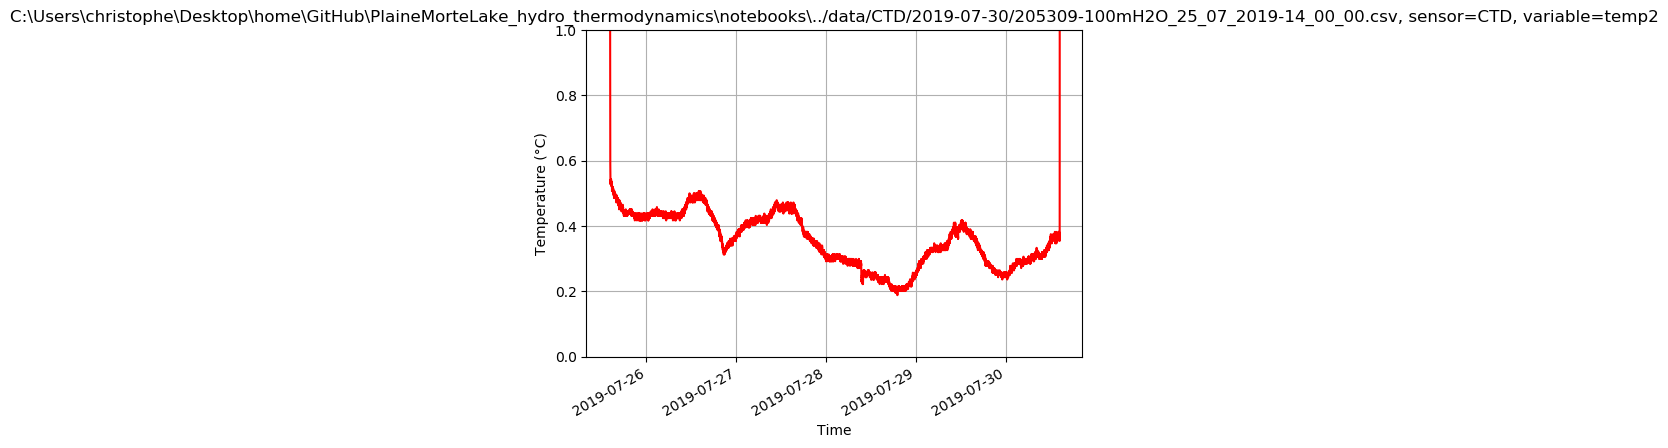

(0, 1)

In [68]:
i=6
    plotit(path_CTD*filename_P5[i], :CTD, :press)
plotit(path_CTD*filename_P5[i], :CTD, :temp2)
ylim(0,1)
 

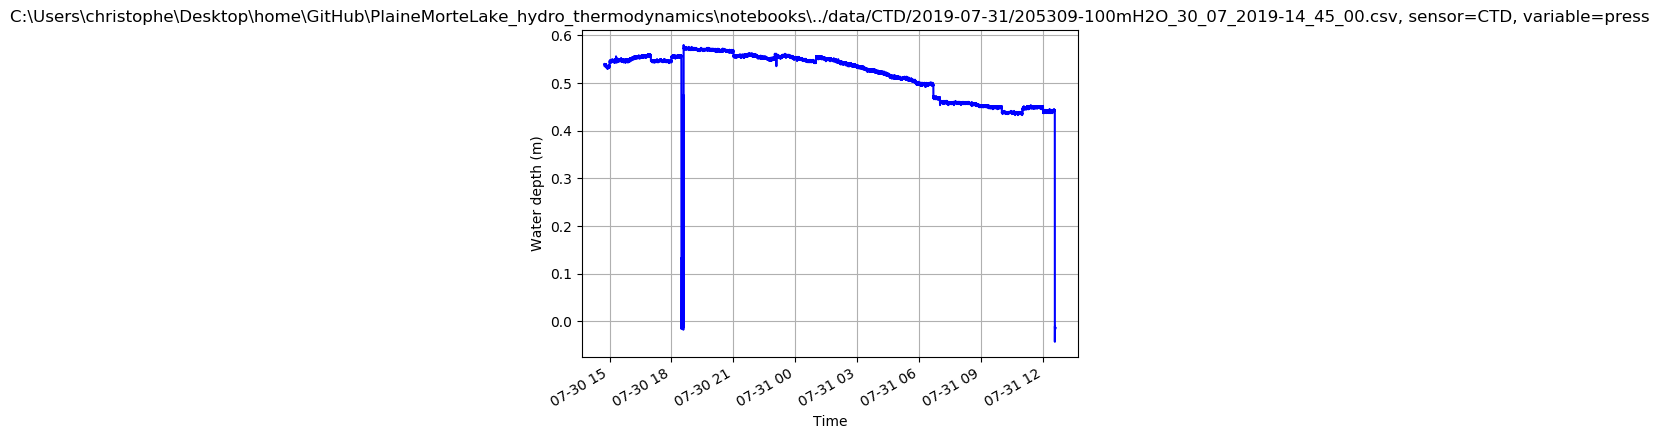

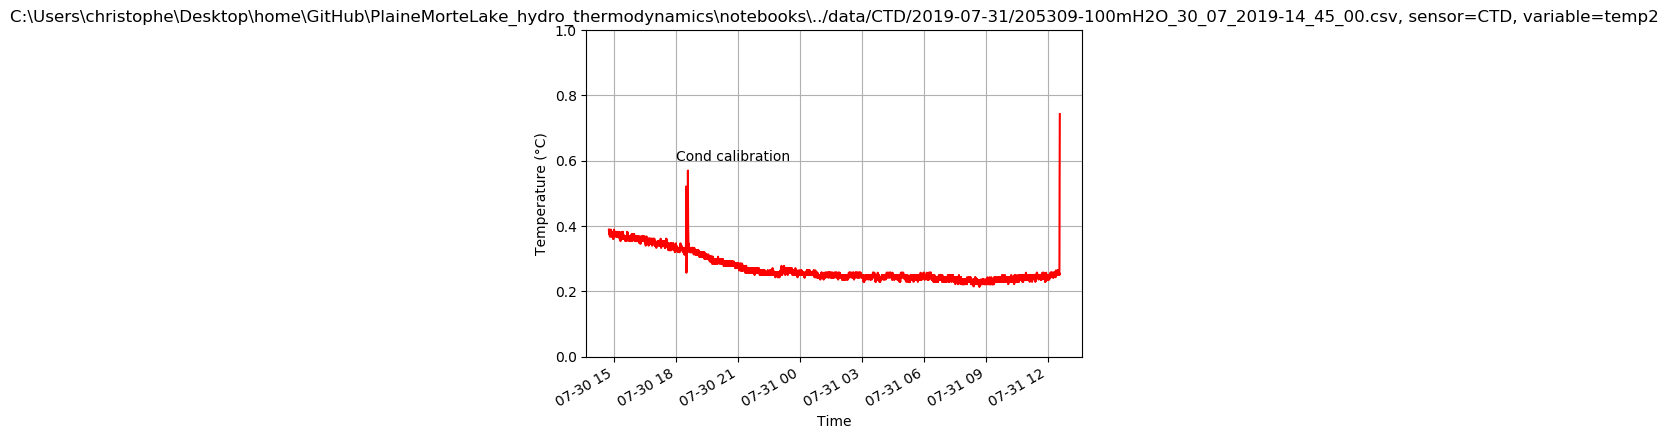

(0, 1)

In [69]:
i=7
    plotit(path_CTD*filename_P5[i], :CTD, :press)
plotit(path_CTD*filename_P5[i], :CTD, :temp2)
text(DateTime(2019,7,30,18),0.6,"Cond calibration")
ylim(0,1)
  

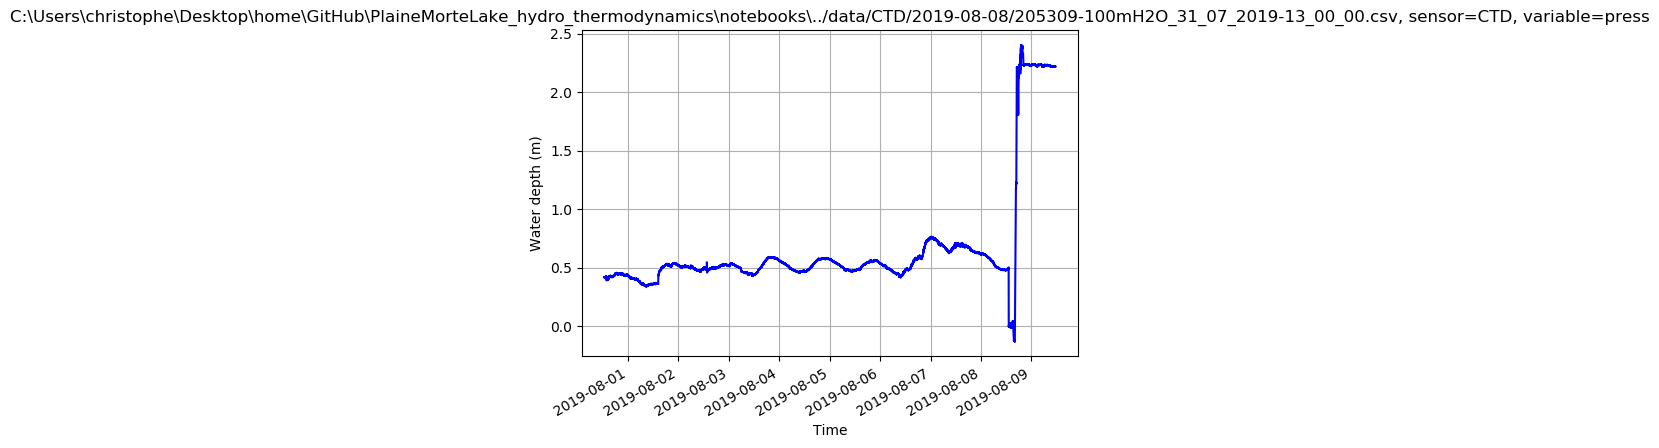

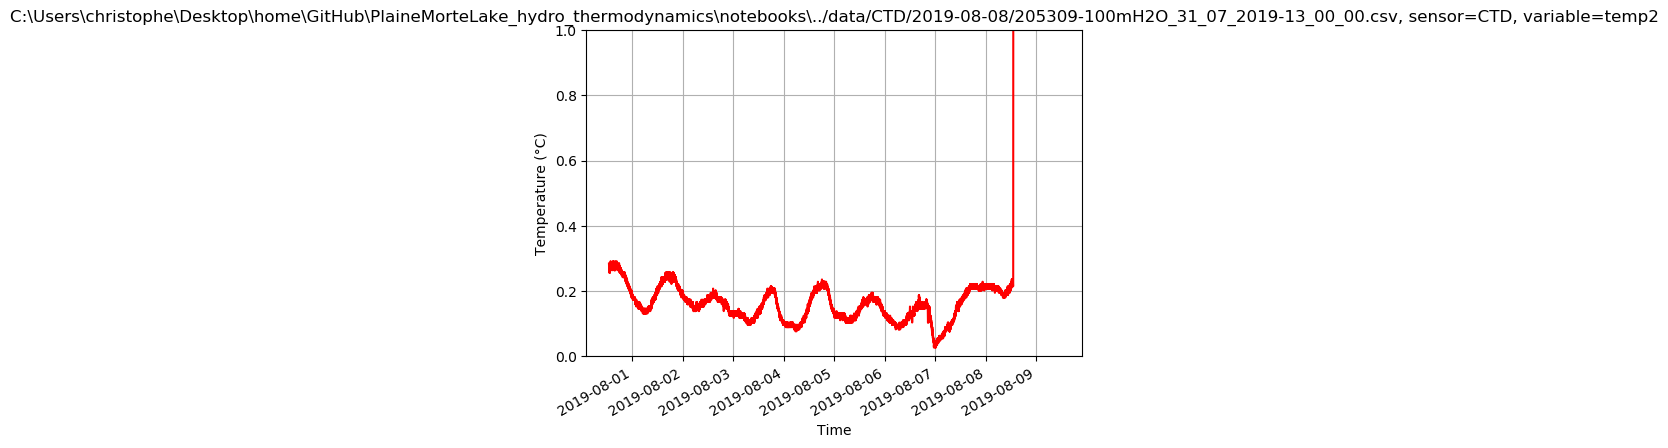

(0, 1)

In [70]:
i=8
    plotit(path_CTD*filename_P5[i], :CTD, :press)
plotit(path_CTD*filename_P5[i], :CTD, :temp2)
ylim(0,1)


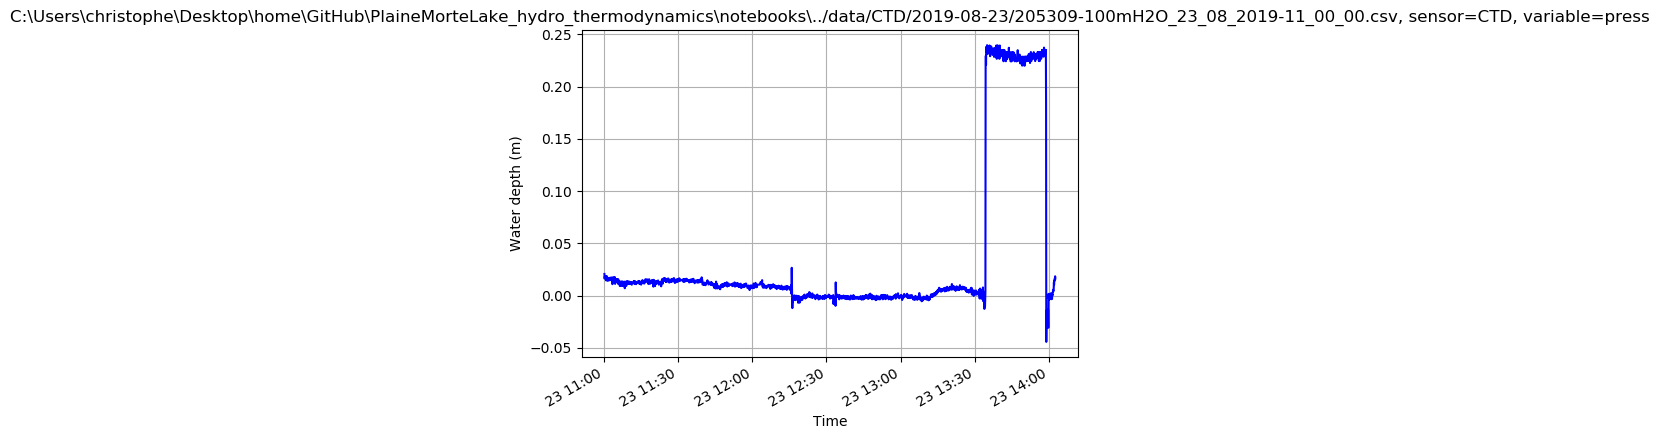

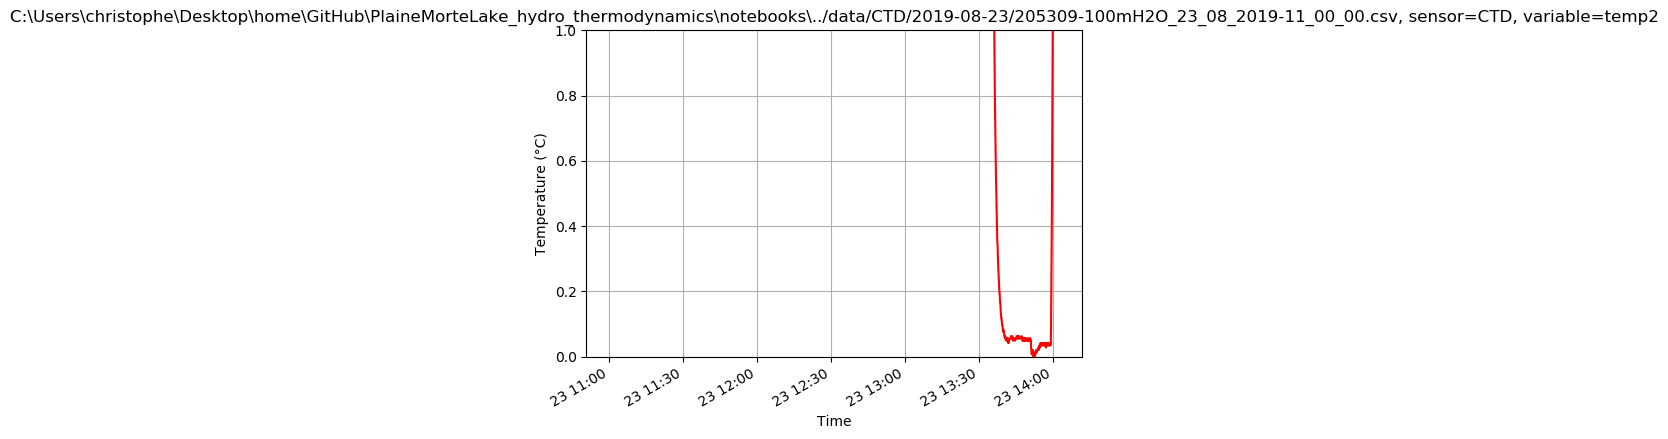

(0, 1)

In [71]:
i=9
    plotit(path_CTD*filename_P5[i], :CTD, :press)
   plotit(path_CTD*filename_P5[i], :CTD, :temp2)
ylim(0,1)
  

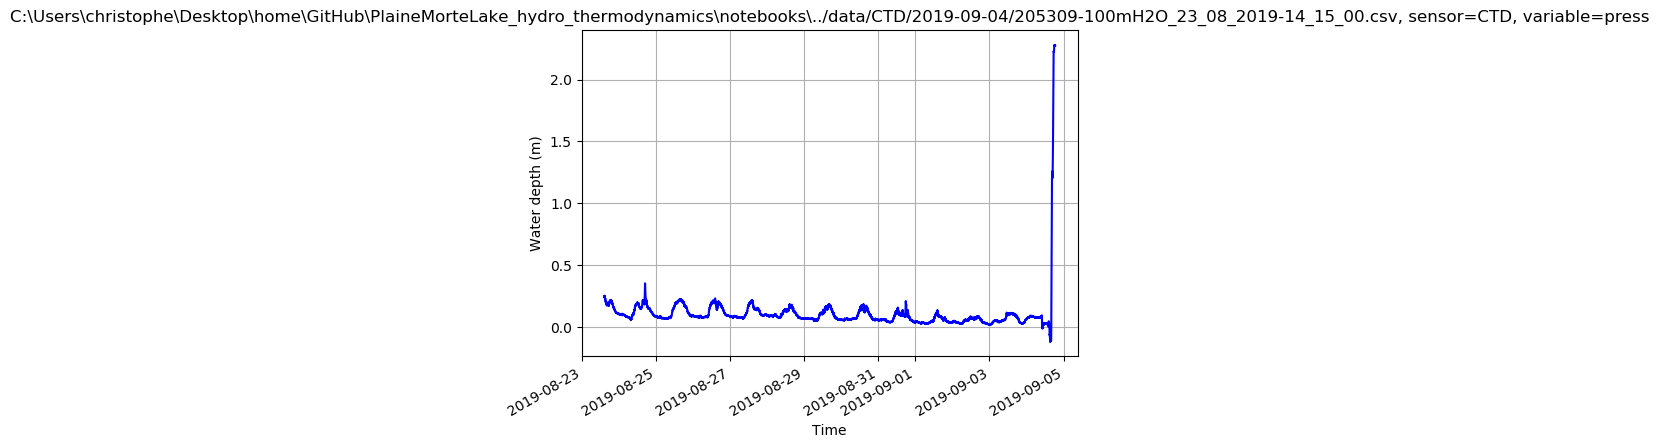

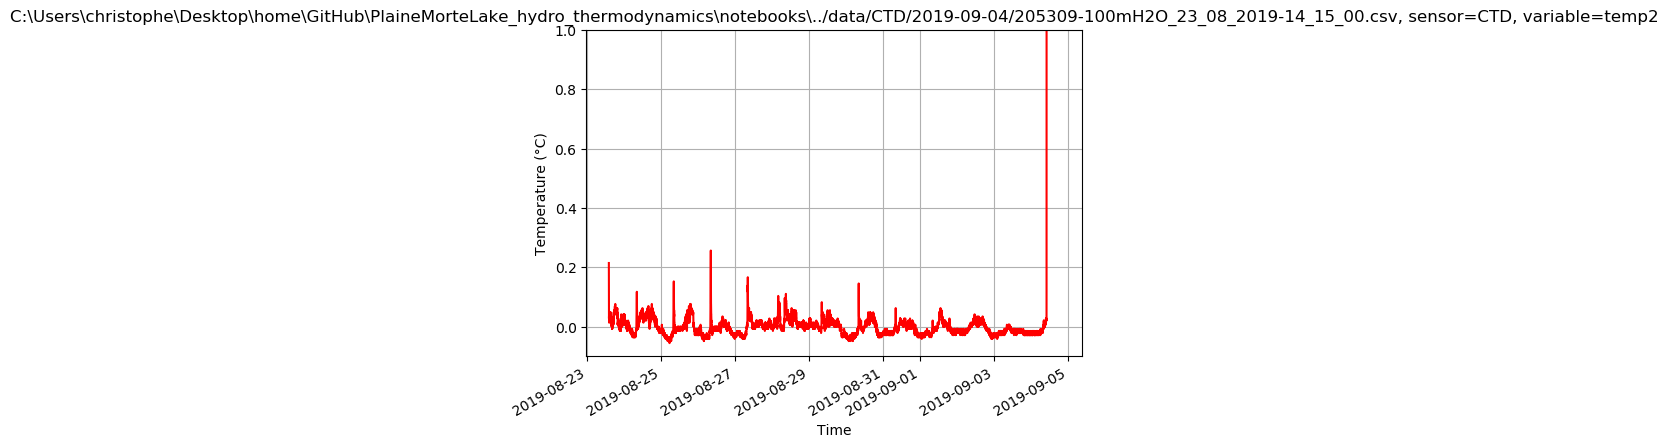

(-0.1, 1)

In [72]:
i=10
    plotit(path_CTD*filename_P5[i], :CTD, :press)
plotit(path_CTD*filename_P5[i], :CTD, :temp2)
ylim(-0.1,1)


## Reconstruct P5 time series

### Water stage observations from field

In [73]:
#Validation Points from field measurements
x5=[DateTime(2019,7,10,14,57),DateTime(2019,7,10,12,42),DateTime(2019,7,16,14),
    DateTime(2019,7,25,10,28),DateTime(2019,7,30,14,31),
DateTime(2019,7,31,10,26),DateTime(2019,8,8,12,57),DateTime(2019,8,14,10,14),
    DateTime(2019,8,23,13,50)]
y5=[1,1,0.6,0.65,0.6,0.45,0.5,0.3,0.2];
yerr5=[0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05];

### Assembling time series

In [74]:
press5=[]
temp5=[]
t5=[]
for i in 1:length(filename_P5)
    local d = read_Keller_DCX22_CTD(path_CTD*filename_P5[i]);
    local ds = smooth_d(d)
    append!(press5,ds[:press]);
    append!(t5,d[:t]);
    append!(temp5,ds[:temp2]);
end

### Automatic and manual deletion when temperature is >0.56°C and <0.05 °C 

In [75]:
#Delete values when sensors was out of water
purge=[]

for i in 101:length(t5)-100
    
    if temp5[i] > 0.56 || temp5[i] < -0.05  #treschold for air temperature detection
        append!(purge,collect(i-100:i+100))
    end
    
end

purge=sort(unique(purge))
[press5[i] = NaN for i = purge]
[temp5[i] = NaN for i = purge];

#Delete manually

indice = vcat(103500:104650,119457:119500,122151:122353,135160:135265);
indice_press=vcat(17940:18420,79520:87000,35600:35800,47390:47750,54800:54900,35719:47470,54850:64800)
[press5[i] = NaN for i = vcat(indice,indice_press)]
[temp5[i] = NaN for i = indice];

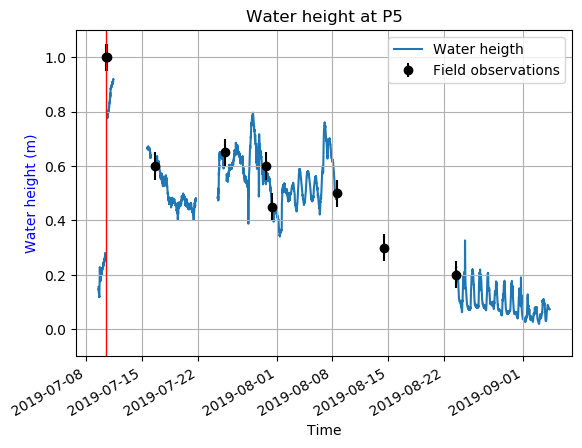

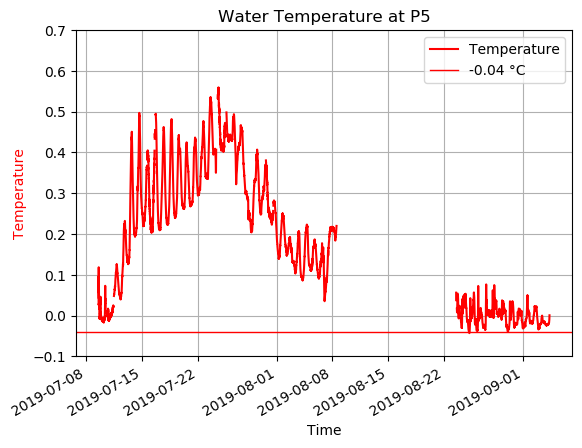

PyObject <matplotlib.legend.Legend object at 0x000000005589E7F0>

In [76]:
pygui(false)
#Pressure
fig=figure()
plot(t5,press5,linestyle="-",label="Water heigth",zorder=-1)
fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right")
ylim(-0.1,1.1)
title("Water height at P5")
xlabel("Time")
ylabel("Water height (m)",color="blue")
errorbar(x5,y5,yerr5,linestyle="",marker="o",color="black",label="Field observations")
axvline(x=DateTime(2019,7,10,12),linewidth=1,color="r")
legend()
grid(true)

#temperature
fig=figure()
plot(t5,temp5,color="red",linestyle="-",label="Temperature") 
fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right")
ylim(-0.1,0.7)
title("Water Temperature at P5")
xlabel("Time")
ylabel("Temperature",color="red")
grid(true)

#Temperature correction (manual) (water temperature cannot be negative)
temp_corr_P5 = 0.04
axhline(y = -temp_corr_P5,linewidth=1,color="r", label="-$temp_corr_P5 °C")
legend()

### Up-scale times series

In [77]:
(t5_hour,temp5_hour) = (upscale_timeseries(temp5, t5,"hour")[1],upscale_timeseries(temp5, t5,"hour")[2]);
(t5_daily,temp5_daily) = (upscale_timeseries(temp5, t5,"day")[1],upscale_timeseries(temp5, t5,"day")[2]);
(t5_hour,stage5_hour) = (upscale_timeseries(press5, t5,"hour")[1],upscale_timeseries(press5, t5,"hour")[2]);
(t5_daily,stage5_daily) = (upscale_timeseries(press5, t5,"day")[1],upscale_timeseries(press5, t5,"day")[2]);

### To store in CSV files (+ temperature corrections)

In [78]:
using DataFrames
using CSV

#Temperature in °C (raw, daily + corr, hourly + corr)

df=DataFrame(Date_Time = t5, Temperature = round.(temp5, digits=3) )
CSV.write(path_products*"temp5_corr_raw.csv",df ; dateformat = "yyyy-mm-ddTH:M:S")

df=DataFrame(Date_Time = t5_daily, Temperature_daily = round.(temp5_daily, digits=3) .+ temp_corr_P5)
CSV.write(path_products*"temp5_daily.csv",df ; dateformat = "yyyy-mm-ddTH:M:S")

df=DataFrame(Date_Time = t5_hour, Temperature_hourly = round.(temp5_hour, digits=3) .+ temp_corr_P5)
CSV.write(path_products*"temp5_hour.csv",df ; dateformat = "yyyy-mm-ddTH:M:S");

#Water height (stage) in m

df=DataFrame(Date_Time = t5, Water_height = round.(press5,digits=3))
CSV.write(path_products*"stage5_corr_raw.csv",df ; dateformat = "yyyy-mm-ddTH:M:S")

df=DataFrame(Date_Time = t5_daily, Water_height = round.(stage5_daily, digits = 3) )
CSV.write(path_products*"stage5_daily.csv",df ; dateformat = "yyyy-mm-ddTH:M:S")

df=DataFrame(Date_Time = t5_hour, Temperature_hourly = round.(stage5_hour, digits=3) )
CSV.write(path_products*"stage5_hour.csv",df ; dateformat = "yyyy-mm-ddTH:M:S");

# Plot Water Stage at P3 & P5 (Fig. 5)

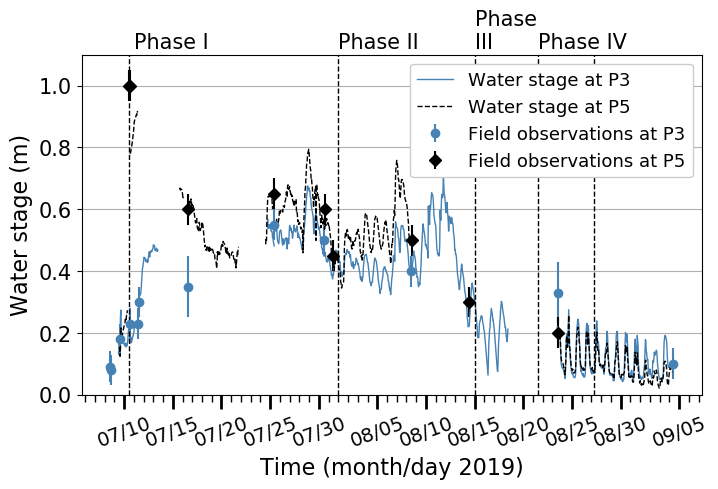

In [79]:
pygui(false)

rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
font0 = Dict(
        "font.size" => 14,
        "axes.labelsize" => 16,
        "xtick.labelsize" => 14,
        "ytick.labelsize" => 15,
        "legend.fontsize" => 13,
)
merge!(rcParams, font0)

fig = figure(figsize=(8,5))
ax = gca()
#plot(t1,press1, label="P1")
#plot(t2,press2, label="P2")
plot(t3_hour,stage3_hour, label="Water stage at P3", linewidth=1,color="steelblue")
plot(t5_hour,stage5_hour,linestyle="--", label="Water stage at P5",  linewidth=1,color="black")
#errorbar(x1,y1,yerr1,linestyle="",marker="o",color="r")
#errorbar(x2,y2,yerr2,linestyle="",marker="o",color="green")
errorbar(x3,y3,yerr3,linestyle="",marker="o",color="steelblue",label="Field observations at P3")
errorbar(x5,y5,yerr5,linestyle="",marker="D",color="black",label="Field observations at P5")
ylabel("Water stage (m)")
ylim(0,1.1)
xlabel("Time (month/day 2019)")
legend(loc="upper right",framealpha=1)
ax.yaxis.grid(true)



majorformatter = matplotlib.dates.DateFormatter("%m/%d")
majorlocator   = matplotlib.dates.DayLocator(bymonthday=(5,10,15,20,25,30))
minorlocator   = matplotlib.dates.DayLocator(interval=1)
fig[:autofmt_xdate](bottom=0.2,rotation=20,ha="center")

ax.xaxis.set_major_formatter(majorformatter)
ax.xaxis.set_major_locator(majorlocator)
ax.xaxis.set_minor_locator(minorlocator)
ax.xaxis.set_tick_params(which="major",length=10,width=2)
ax.xaxis.set_tick_params(which="minor",length=5,width=1)

#Phase
axvline(x=DateTime(2019,7,10,12),linestyle="--",linewidth=1,color="black")
axvline(x=DateTime(2019,8,1),linestyle="--",linewidth=1,color="black")
axvline(x=DateTime(2019,8,15),linestyle="--",linewidth=1,color="black")
axvline(x=DateTime(2019,8,21,12),linestyle="--",linewidth=1,color="black")
axvline(x=DateTime(2019,8,27,6),linestyle="--",linewidth=1,color="black")

#text
text(DateTime(2019,7,11), 1.12,"Phase I", fontsize = 15)
text(DateTime(2019,8,1), 1.12,"Phase II", fontsize = 15)
text(DateTime(2019,8,15), 1.12,"Phase 
III", fontsize = 15)
text(DateTime(2019,8,21,12), 1.12,"Phase IV", fontsize = 15)



savefig(path_plots*"fig05.pdf",bbox_inches="tight") 

matplotlib.rcdefaults()